### **PARTE 1: Análisis Exploratorio de Datos (EDA)** - 15 puntos

#### Objetivos
Comprender en profundidad el dataset y el problema de desbalance.

#### Tareas Requeridas

**1.1. Exploración Básica**
- Cargar el dataset y mostrar información general (shape, tipos de datos, valores faltantes)
- Calcular estadísticas descriptivas de variables numéricas
- Identificar y cuantificar el desbalance de clases
- Visualizar la distribución de la variable objetivo

**1.2. Análisis de Variables**
- Analizar distribución de variables numéricas (histogramas, boxplots)
- Analizar variables categóricas (frecuencias, top valores)
- Identificar outliers en variables numéricas
- Analizar correlaciones entre variables numéricas

**1.3. Análisis del Fraude**
- Comparar características de transacciones fraudulentas vs normales
- Identificar variables con mayor diferencia entre clases
- Analizar patrones temporales (hora del día, día de semana)
- Analizar distribución geográfica del fraude

**Entregable**: Notebook con visualizaciones y conclusiones del EDA.

---

### Exploración Básica

Carga de datos

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fraud_df = pd.read_csv('../data/raw/fraud_dataset_v2.csv')


Resumen descriptivo

In [2]:
# Tamaño del dataset
print("Tamaño del dataset:", fraud_df.shape)

# Tipos de datos
print("\nTipos de datos por columna:")
print(fraud_df.dtypes)

# Valores faltantes por columna
print("\nValores faltantes por columna:")
faltantes = fraud_df.isnull().sum()
porcentaje_faltantes = (fraud_df.isnull().sum() / fraud_df.shape[0]) * 100
faltantes_df = pd.DataFrame({
    'Valores Faltantes': faltantes,
    'Porcentaje (%)': porcentaje_faltantes.round(2)
})
print(faltantes_df)

Tamaño del dataset: (250000, 24)

Tipos de datos por columna:
Unnamed: 0      int64
a               int64
b             float64
c             float64
d             float64
e             float64
f             float64
g              object
h               int64
i              object
j              object
k             float64
l             float64
m             float64
n               int64
o              object
p              object
q             float64
r               int64
s               int64
fecha          object
monto         float64
score         float64
fraude          int64
dtype: object

Valores faltantes por columna:
            Valores Faltantes  Porcentaje (%)
Unnamed: 0                  0            0.00
a                           0            0.00
b                       21474            8.59
c                       21474            8.59
d                         594            0.24
e                           0            0.00
f                          15            0

| Variable      | Tipo de Dato | Valores Faltantes | Porcentaje Faltantes (%) |
|---------------|:------------:|:-----------------:|:-----------------------:|
| Unnamed: 0    |    int64     |         0         |          0.00           |
| a             |    int64     |         0         |          0.00           |
| b             |   float64    |      21474        |          8.59           |
| c             |   float64    |      21474        |          8.59           |
| d             |   float64    |       594         |          0.24           |
| e             |   float64    |         0         |          0.00           |
| f             |   float64    |        15         |          0.01           |
| g             |    object    |       324         |          0.13           |
| h             |    int64     |         0         |          0.00           |
| i             |    object    |         0         |          0.00           |
| j             |    object    |         0         |          0.00           |
| k             |   float64    |         0         |          0.00           |
| l             |   float64    |        15         |          0.01           |
| m             |   float64    |       594         |          0.24           |
| n             |    int64     |         0         |          0.00           |
| o             |    object    |     183628        |         73.45           |
| p             |    object    |         0         |          0.00           |
| q             |   float64    |       594         |          0.24           |
| r             |    int64     |         0         |          0.00           |
| s             |    int64     |         0         |          0.00           |
| fecha         |    object    |         0         |          0.00           |
| monto         |   float64    |         0         |          0.00           |
| score         |   float64    |         0         |          0.00           |
| fraude        |    int64     |         0         |          0.00           |

**Tamaño del dataset:** (250000, 24)

In [3]:
# Estadísticas descriptivas de las variables numéricas
print("\nEstadísticas descriptivas de las variables numéricas:")
numericas = fraud_df.select_dtypes(include=['int64', 'float64'])
desc_stats = numericas.describe().T
display(desc_stats)



Estadísticas descriptivas de las variables numéricas:


count           mean            std       min          25%  \
Unnamed: 0  250000.0   64999.500000   40104.111592  0.000000  31249.75000   
a           250000.0       3.710736       0.908846  0.000000      3.00000   
b           228526.0       0.727647       0.132455  0.000000      0.67780   
c           228526.0  257801.060924  840623.502209  0.160000   9714.78500   
d           249406.0      21.828208      20.088081 -1.000000      3.00000   
e           250000.0       0.222844       2.650651  0.000000      0.00000   
f           249985.0      51.288385     681.830910 -5.000000      1.00000   
h           250000.0      14.259116      14.196752 -1.000000      3.00000   
k           250000.0       0.497599       0.288246  0.000004      0.24691   
l           249985.0    2325.054195    1711.840924 -1.000000    931.00000   
m           249406.0     302.817615     321.876881 -1.000000     44.00000   
n           250000.0       0.907152       0.290220  0.000000      1.00000   
q           249406.0       0.426529       0.401747 -0.020000      0.04000   
r           250000.0  258027.713156  803710.116875  0.000000  11585.00000   
s           250000.0      55.942400      49.645722  0.000000      0.00000   
monto       250000.0      43.638780      88.564504  0.020000     10.13000   
score       250000.0      47.225239      28.730558  0.000000     22.28000   
fraude      250000.0       0.030008       0.170610  0.000000      0.00000   

                     50%            75%           max  
Unnamed: 0  62499.500000   93749.250000  1.499990e+05  
a               4.000000       4.000000  5.000000e+00  
b               0.755200       0.806100  1.000000e+00  
c           43578.310000  144911.600000  1.387874e+07  
d              15.000000      49.000000  5.100000e+01  
e               0.106154       0.283668  8.333333e+02  
f               9.000000      33.000000  1.452740e+05  
h               9.000000      21.000000  5.900000e+01  
k               0.495780       0.746415  9.999948e-01  
l            1960.000000    3469.000000  7.544000e+03  
m             197.000000     463.000000  2.225000e+03  
n               1.000000       1.000000  1.000000e+00  
q               0.280000       0.980000  1.000000e+00  
r           54604.000000  216227.000000  1.387874e+07  
s             100.000000     100.000000  1.000000e+02  
monto          21.360000      41.380000  3.696350e+03  
score          47.000000      72.000000  1.000000e+02  
fraude          0.000000       0.000000  1.000000e+00

Desbalance de clases

/tmp/ipykernel_29721/133503693.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='fraude', data=fraud_df, palette='pastel')


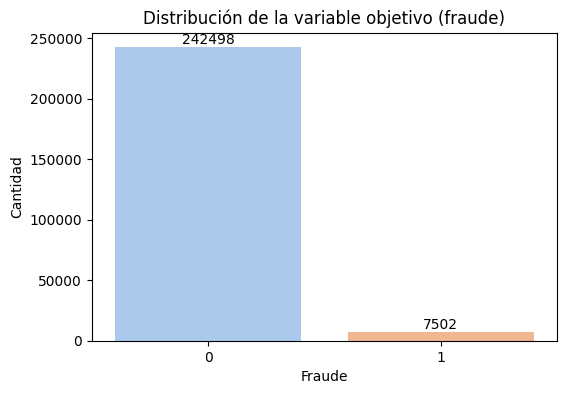

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar bar chart con los valores que toma la columna 'fraude'
plt.figure(figsize=(6,4))
ax = sns.countplot(x='fraude', data=fraud_df, palette='pastel')
plt.title('Distribución de la variable objetivo (fraude)')
plt.xlabel('Fraude')
plt.ylabel('Cantidad')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [5]:
# Calcular el porcentaje de transacciones fraudulentas
porcentaje_fraude = fraud_df['fraude'].mean() * 100
print(f"El fraude representa el {porcentaje_fraude:.2f}% del dataset")

El fraude representa el 3.00% del dataset


Análisis de Variables

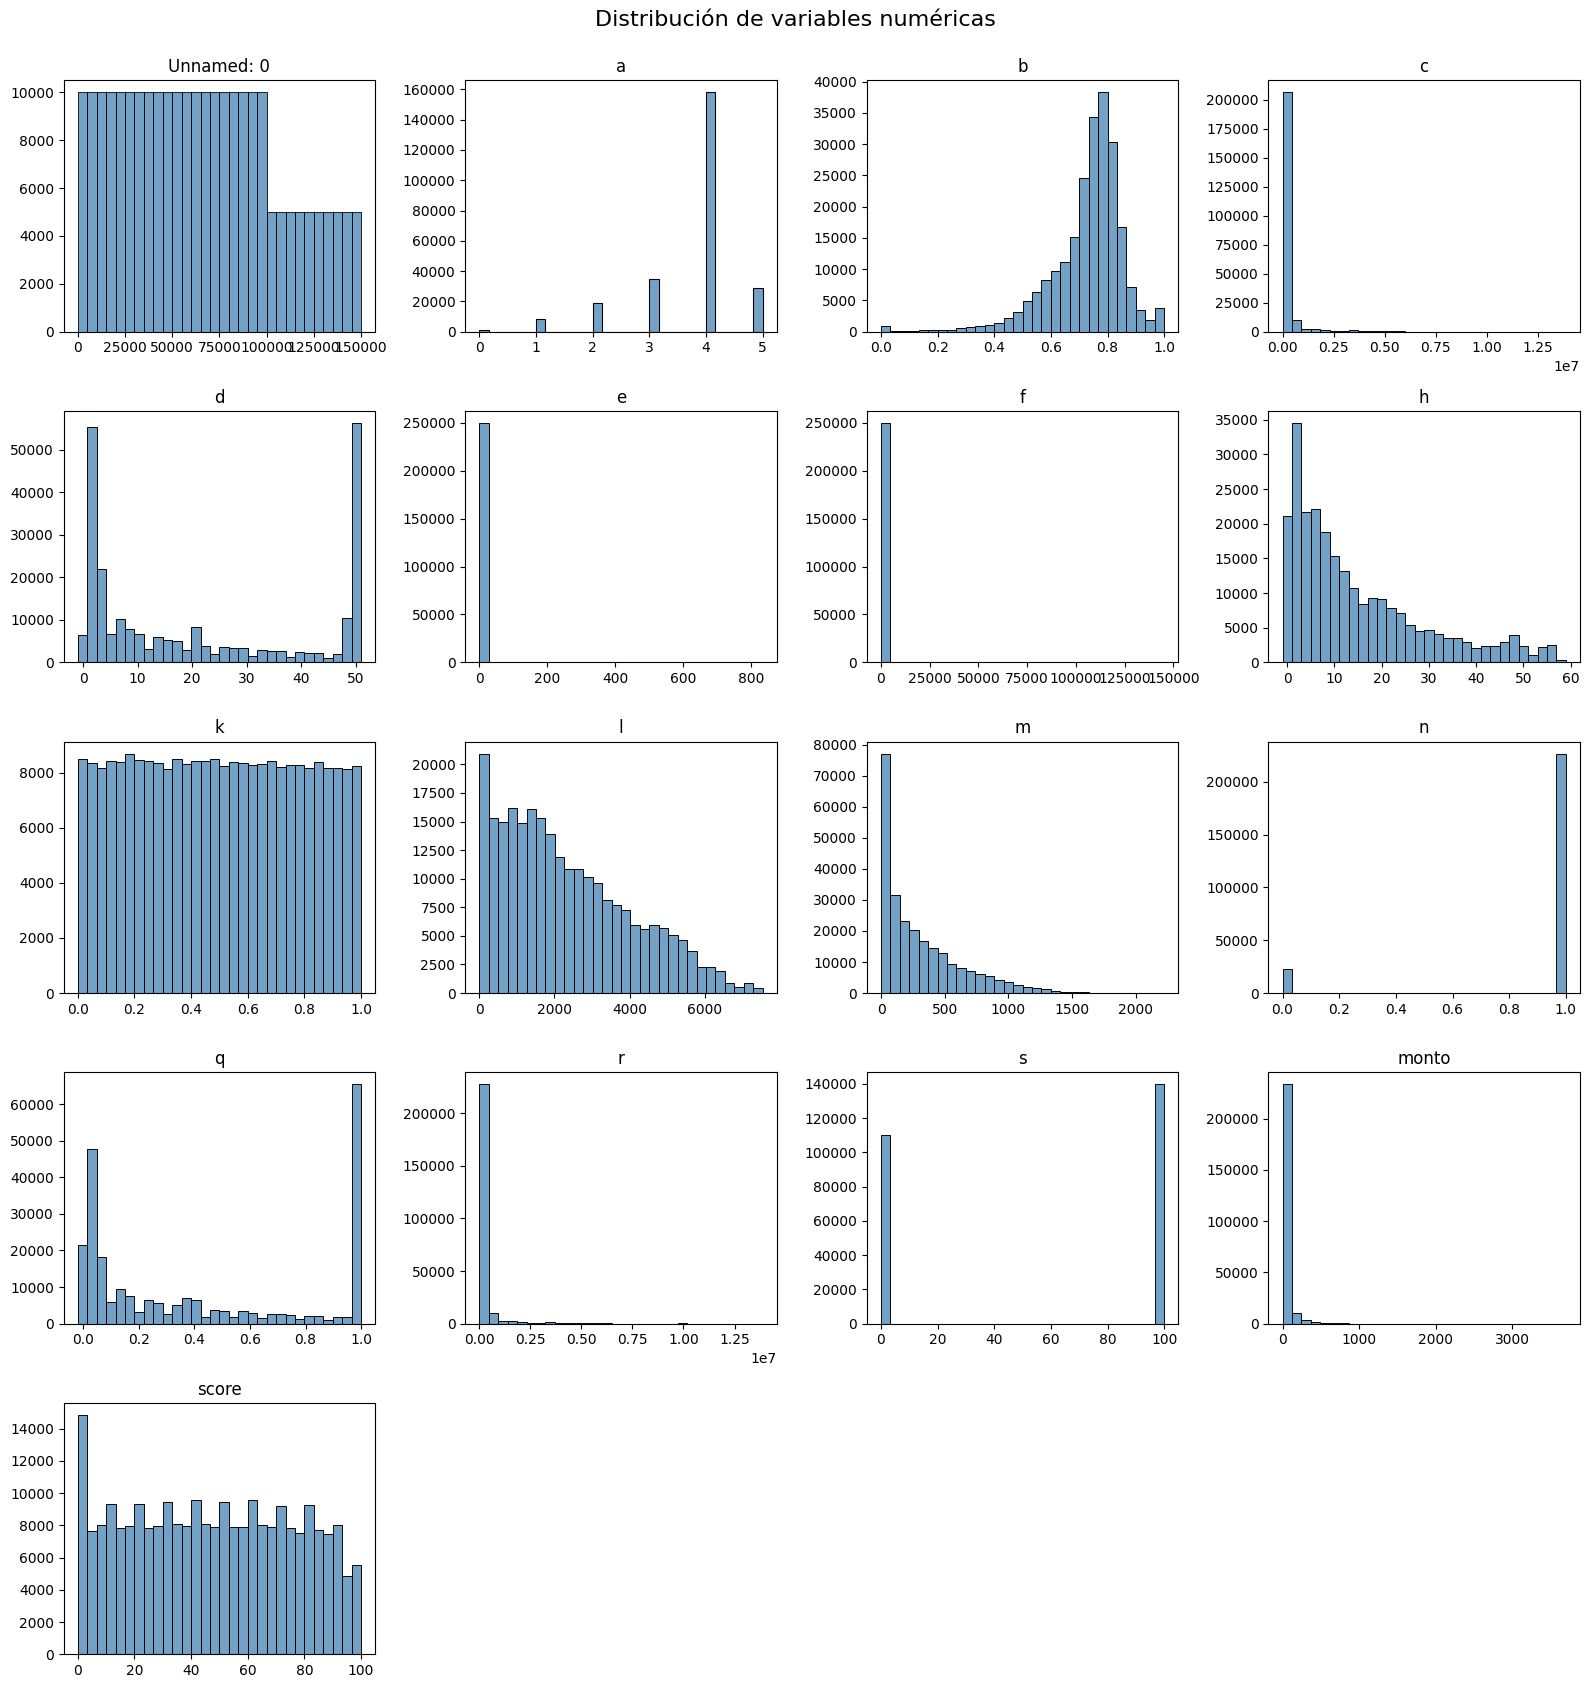

In [6]:
# Histograma de todas las variables numéricas en un grid

numericas_cols = [col for col in fraud_df.select_dtypes(include=['int64', 'float64']).columns if col != 'fraude']

n_cols = 4
n_rows = -(-len(numericas_cols) // n_cols)  # techo de la división para cubrir todas las columnas

plt.figure(figsize=(4 * n_cols, 3.3 * n_rows))
for idx, col in enumerate(numericas_cols):
    plt.subplot(n_rows, n_cols, idx+1)
    sns.histplot(fraud_df[col].dropna(), bins=30, color='steelblue', kde=False)
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("")
    plt.tight_layout()

plt.suptitle('Distribución de variables numéricas', y=1.02, fontsize=16)
plt.show()

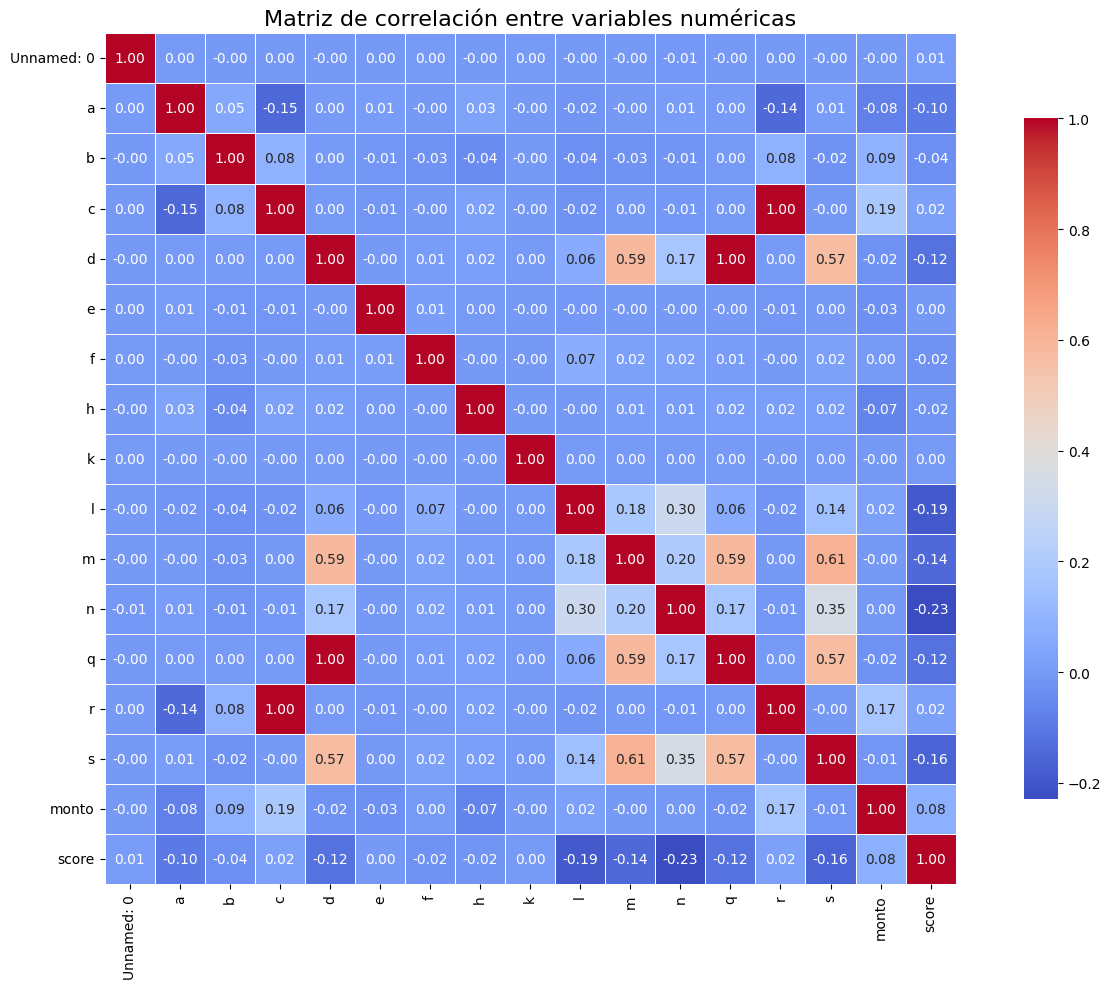

In [7]:
# Matriz de correlación entre variables numéricas

# Calcular la matriz de correlación de las variables numéricas
corr_matrix = fraud_df[numericas_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    square=True,
    cbar_kws={'shrink': 0.8}
)
plt.title('Matriz de correlación entre variables numéricas', fontsize=16)
plt.tight_layout()
plt.show()

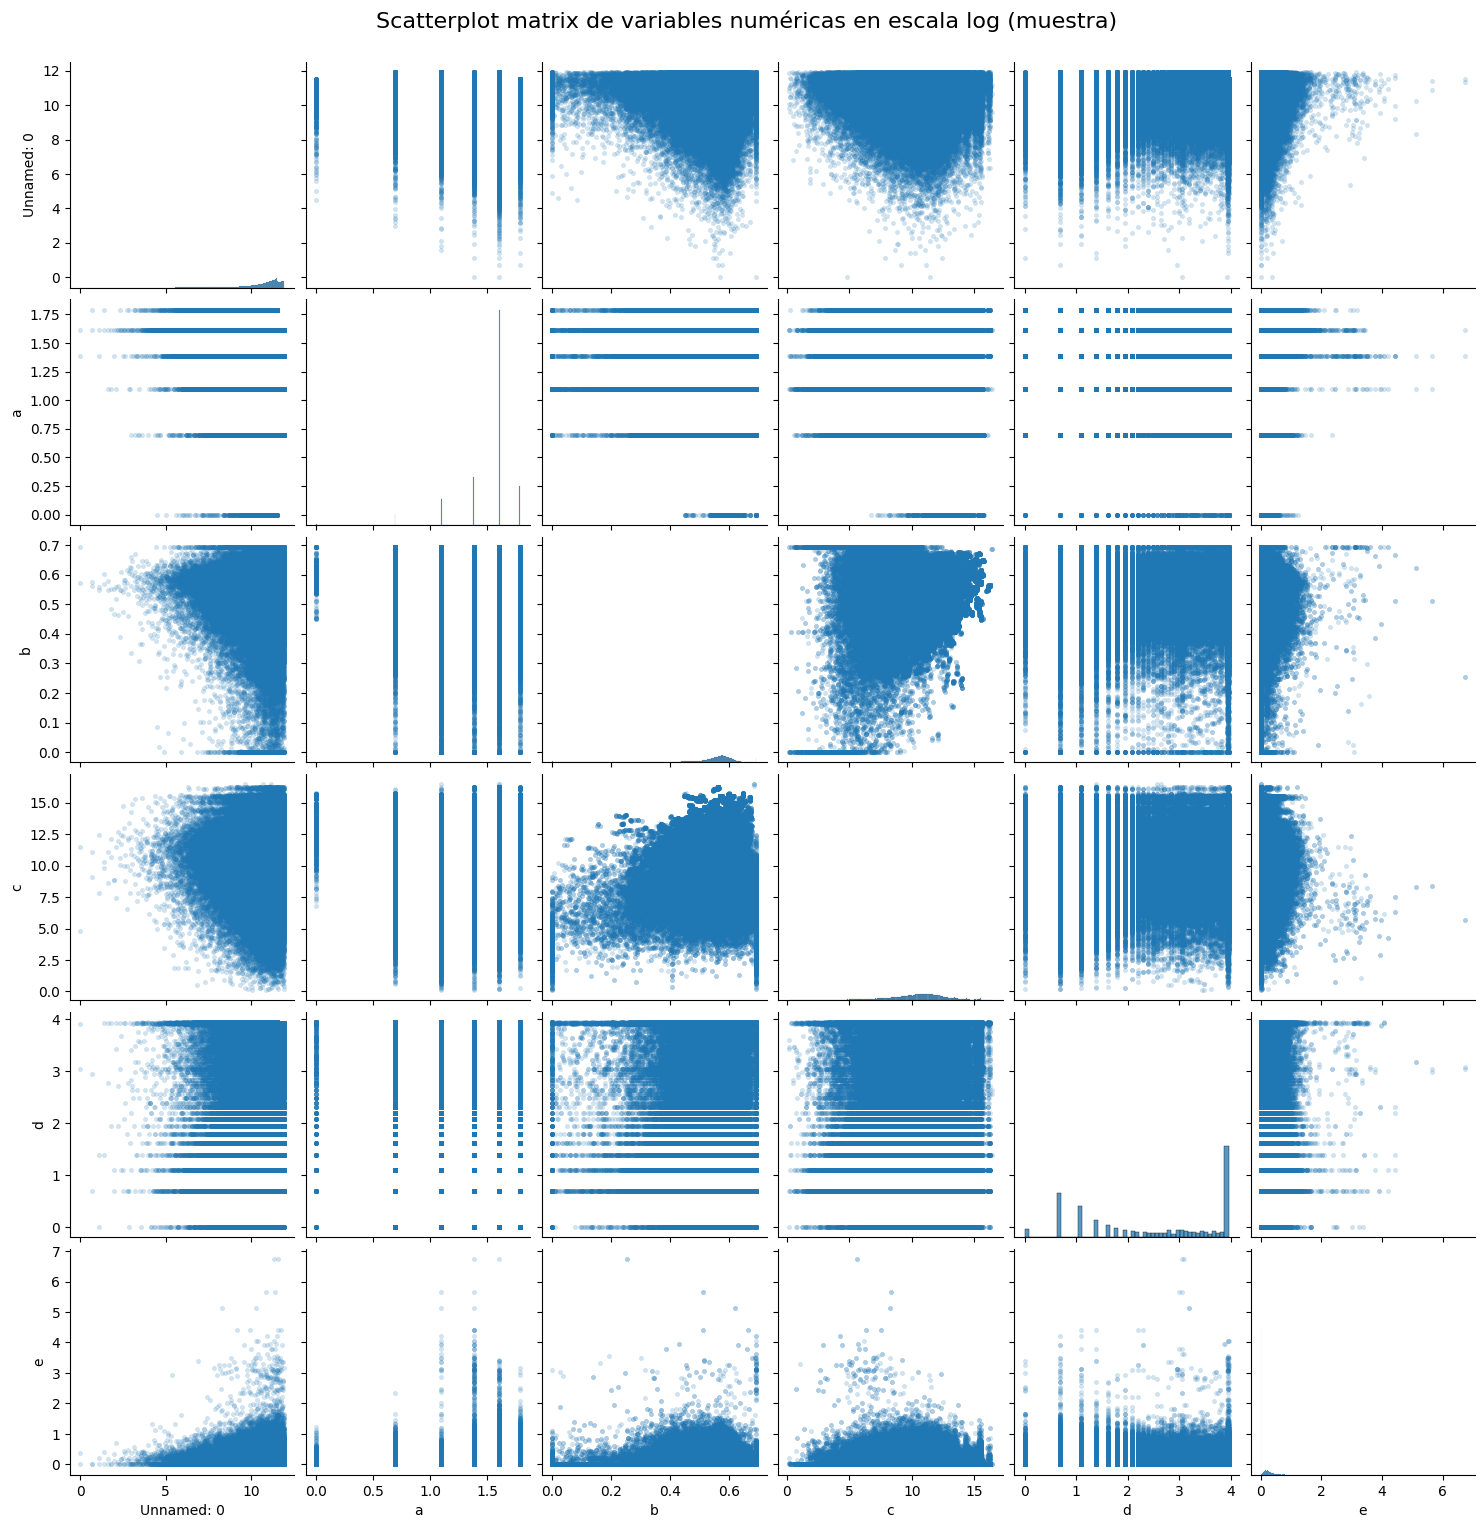

In [8]:
# Grid de scatterplots para cada par de variables numéricas

# Debido a la gran cantidad de variables numéricas, mostraremos sólo las más importantes para la visualización.
# Vamos a usar pairplot de Seaborn, limitando a las primeras 6 variables para claridad.
# Si quieres ver más, cambia la lista en pairplot.

# Seleccionamos las primeras 6 variables numéricas (sin contar 'fraude')
vars_para_scatter = numericas_cols[:6]

# Convertimos a logaritmo las variables (sumamos un pequeño valor para evitar log(0))
fraud_log = fraud_df[vars_para_scatter].apply(lambda x: np.log1p(x.clip(lower=0)))

sns.pairplot(
    fraud_log,
    diag_kind='hist',
    plot_kws={'alpha': 0.2, 's': 10, 'edgecolor': None}
)
plt.suptitle("Scatterplot matrix de variables numéricas en escala log (muestra)", y=1.02, fontsize=16)
plt.show()

## Separación de Variables por Fraude usando Kolmogorov-Smirnov (KS)

Este gráfico muestra, para cada variable numérica, **cuán diferente es su distribución entre transacciones fraudulentas y legítimas**, usando la métrica de Kolmogorov-Smirnov (KS).

---

### ¿Cómo leer este gráfico?

- **Eje Y:** Variables numéricas (`a`, `b`, `c`, … `score`, `monto`, etc.)
- **Eje X:** Valor del estadístico KS

| KS Statistic      | Interpretación                                         |
|-------------------|-------------------------------------------------------|
| ~0.00             | Distribuciones casi idénticas → NO separa fraude      |
| 0.05 – 0.15       | Poco poder discriminante                              |
| 0.15 – 0.25       | Poder moderado                                        |
| > 0.25            | Buena separación (útil para detectar fraude)          |
| > 0.40            | Señal muy fuerte                                      |

---

### Lo que muestra el gráfico:

- **`score ≈ 0.45`**: Señal muy fuerte. Separa fuertemente fraude vs no-fraude.  
  > :warning: *Probablemente es un score de un modelo existente. ¡OJO con **data leakage** si lo usás como feature!*

- **Variables `f`, `l`, `s`, `m`, `n`, `q`, `d`, ...**  
  Valores entre **0.15–0.30**: buenas variables, aportan señal útil.

- **Variables `a`, `b`, `monto`, `h`, `e`, `r`, `c`**  
  Valores ~0.05–0.12: aportan algo, pero mucho menos.

- **`k ≈ 0.01`**:  
  Irrelevante para distinguir fraude según esta métrica.

---

Comparación Kolmogorov-Smirnov (KS) para variables numéricas:


variable  KS_statistic        p_value
16       score      0.437732   0.000000e+00
6            f      0.279276   0.000000e+00
9            l      0.253152   0.000000e+00
14           s      0.243896   0.000000e+00
10           m      0.230764   0.000000e+00
11           n      0.228594   0.000000e+00
12           q      0.167072  2.508575e-177
4            d      0.166407  6.502238e-176
0   Unnamed: 0      0.128234  8.839363e-105
1            a      0.118653   1.006858e-89
2            b      0.103441   8.385607e-61
15       monto      0.095157   8.426738e-58
7            h      0.086453   9.042924e-48
5            e      0.084144   2.849702e-45
13           r      0.064381   1.149200e-26
3            c      0.050593   7.515433e-15
8            k      0.011942   2.484969e-01

/tmp/ipykernel_29721/458546614.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ks_df, x='KS_statistic', y='variable', palette='crest')


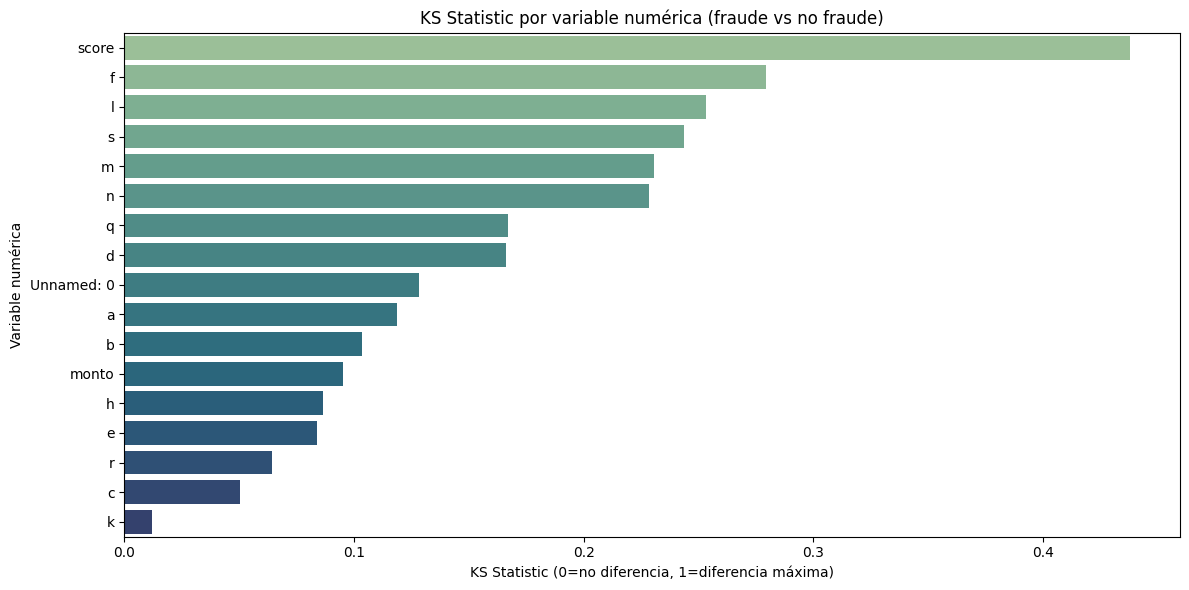

In [9]:
# Comparar la distribución de cada variable numérica entre clases usando la estadística de Kolmogorov-Smirnov (KS)

from scipy.stats import ks_2samp

# Lista para guardar resultados
ks_results = []

# Para cada variable numérica excepto la clase
for col in numericas_cols:
    vals0 = fraud_df[fraud_df['fraude'] == 0][col].dropna()
    vals1 = fraud_df[fraud_df['fraude'] == 1][col].dropna()
    ks_stat, ks_p = ks_2samp(vals0, vals1)
    ks_results.append({
        'variable': col,
        'KS_statistic': ks_stat,
        'p_value': ks_p
    })

# Mostrar ordenado por mayor diferencia KS
ks_df = pd.DataFrame(ks_results).sort_values('KS_statistic', ascending=False)
print("Comparación Kolmogorov-Smirnov (KS) para variables numéricas:")
display(ks_df)

# Visualización sencilla: KS statistic por variable
plt.figure(figsize=(12,6))
sns.barplot(data=ks_df, x='KS_statistic', y='variable', palette='crest')
plt.title("KS Statistic por variable numérica (fraude vs no fraude)")
plt.xlabel("KS Statistic (0=no diferencia, 1=diferencia máxima)")
plt.ylabel("Variable numérica")
plt.tight_layout()
plt.show()

In [10]:
# Filtrar y mostrar columnas con KS_statistic > 0.15
ks_mayor_015 = ks_df[ks_df['KS_statistic'] > 0.15]
print("Columnas con KS_statistic mayor a 0.15:")
display(ks_mayor_015)

Columnas con KS_statistic mayor a 0.15:


variable  KS_statistic        p_value
16    score      0.437732   0.000000e+00
6         f      0.279276   0.000000e+00
9         l      0.253152   0.000000e+00
14        s      0.243896   0.000000e+00
10        m      0.230764   0.000000e+00
11        n      0.228594   0.000000e+00
12        q      0.167072  2.508575e-177
4         d      0.166407  6.502238e-176

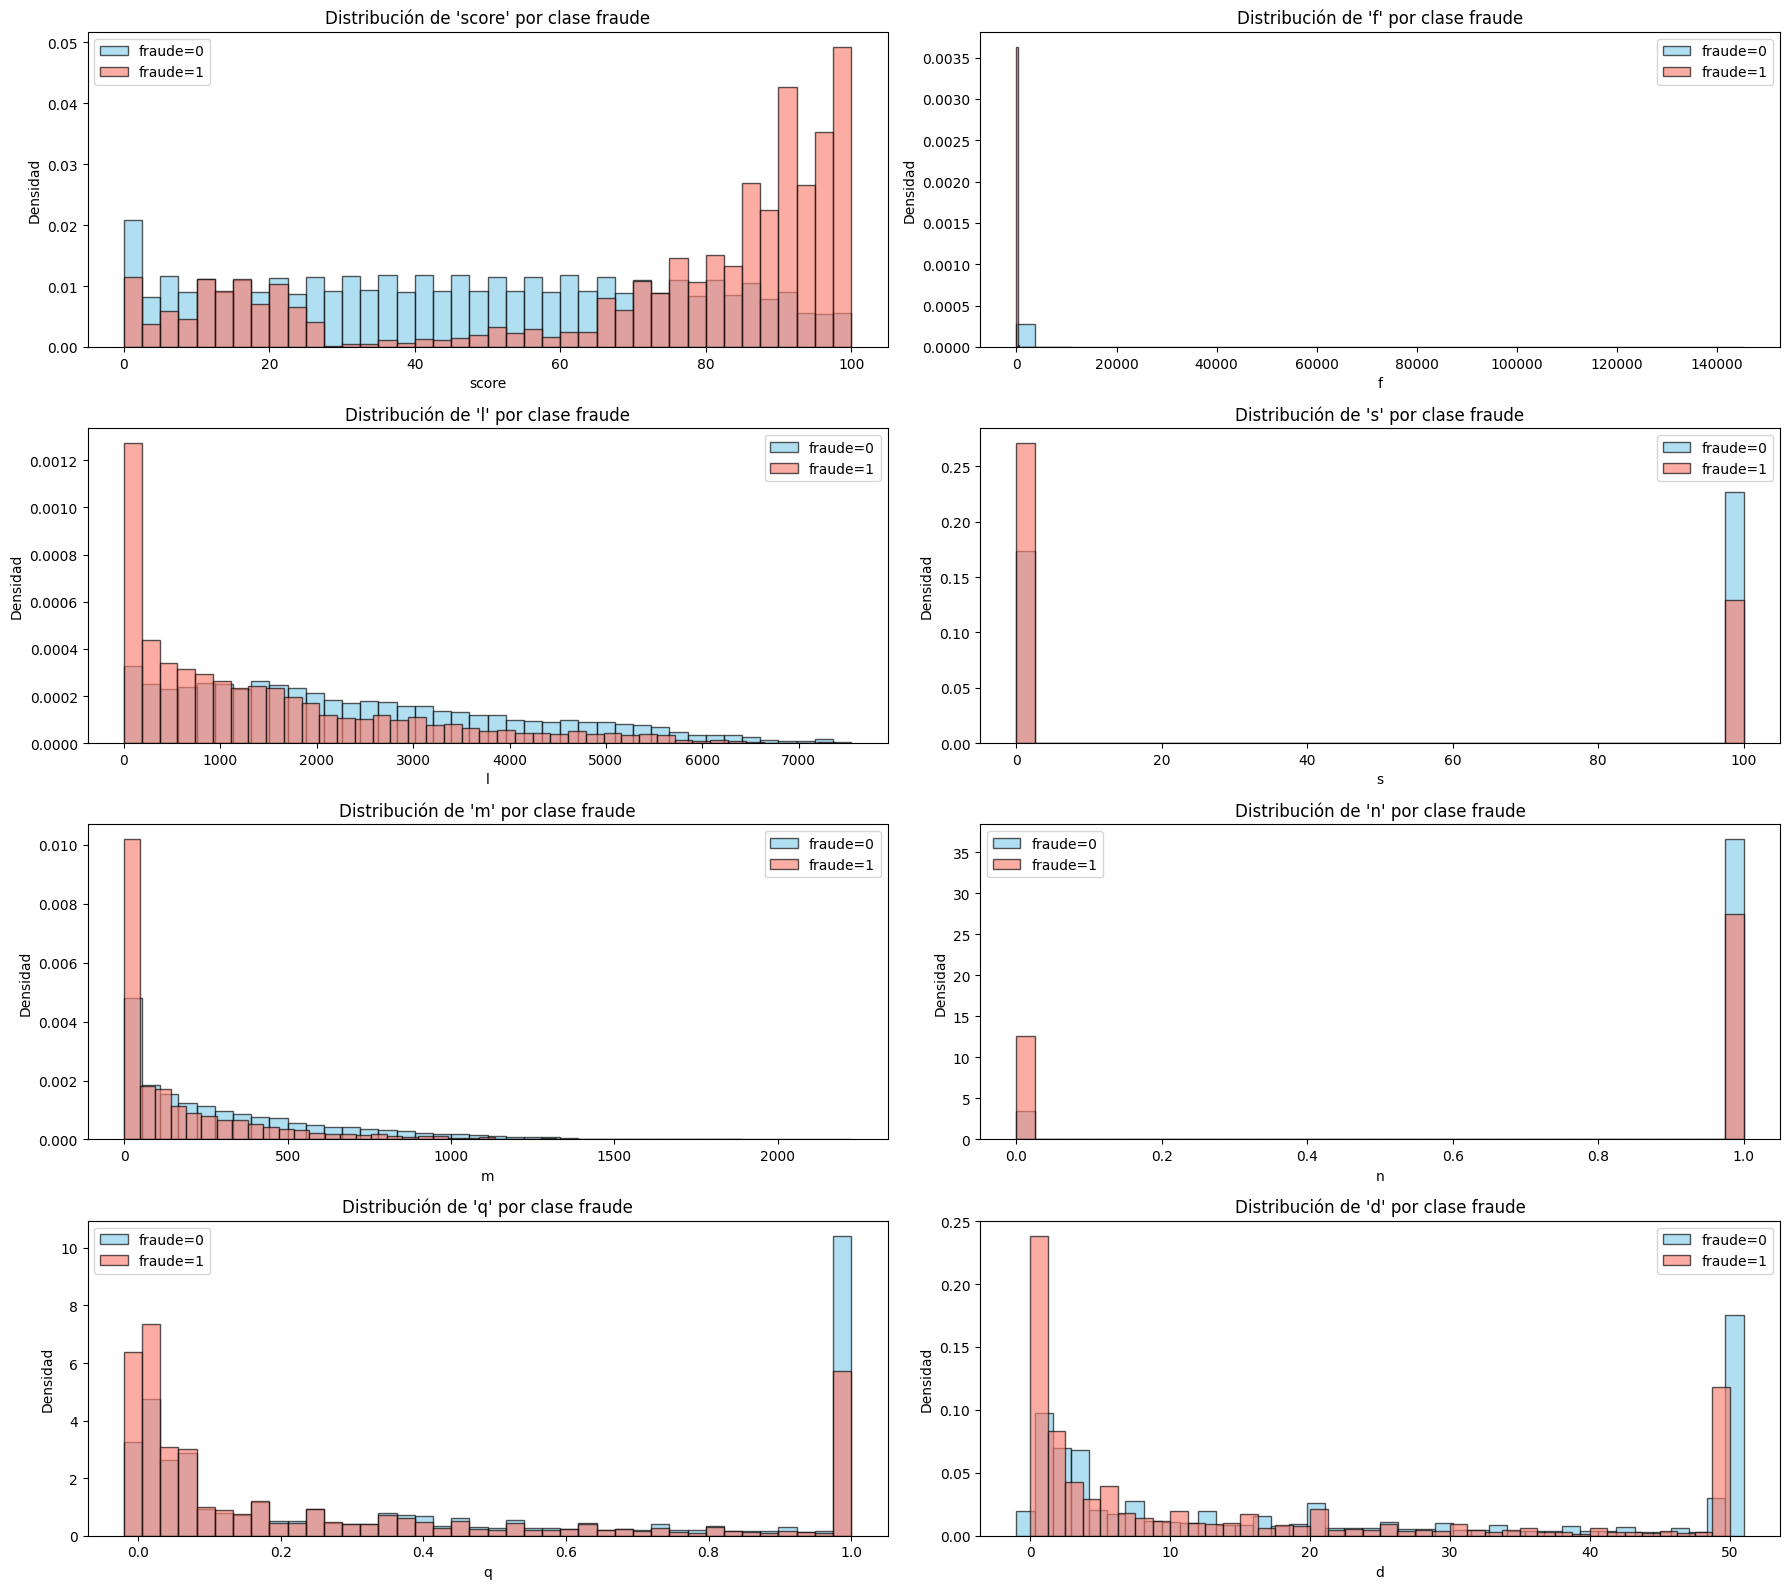

In [11]:
# Mostrar la distribución de variables con KS_statistic > 0.15 (histogramas por clase)
# Para cada variable con KS_statistic > 0.15, mostremos histogramas separados por clase "fraude"

import matplotlib.pyplot as plt

vars_ks = ks_mayor_015['variable'].tolist()
n_vars = len(vars_ks)
n_rows = (n_vars + 1) // 2

plt.figure(figsize=(18, 4 * n_rows))

for i, var in enumerate(vars_ks, 1):
    plt.subplot(n_rows, 2, i)
    # Histogramas para cada clase
    for clase, color in zip([0, 1], ['skyblue', 'salmon']):
        vals = fraud_df[fraud_df['fraude'] == clase][var].dropna()
        plt.hist(vals, bins=40, alpha=0.65, label=f"fraude={clase}", color=color, density=True, edgecolor='black')
    plt.title(f"Distribución de '{var}' por clase fraude")
    plt.xlabel(var)
    plt.ylabel("Densidad")
    plt.legend()

plt.tight_layout()
plt.show()


Top 10 correlaciones absolutas (Spearman) entre variables numéricas:


Var1   Var2  abs(Spearman)
41     c      r       1.000000
168    q      d       0.979507
147    m      s       0.754668
53     d      m       0.722381
174    q      m       0.721486
125    l      f       0.664564
73     e  monto       0.653307
198    s      d       0.601297
206    s      q       0.600431
84     f      n       0.381638

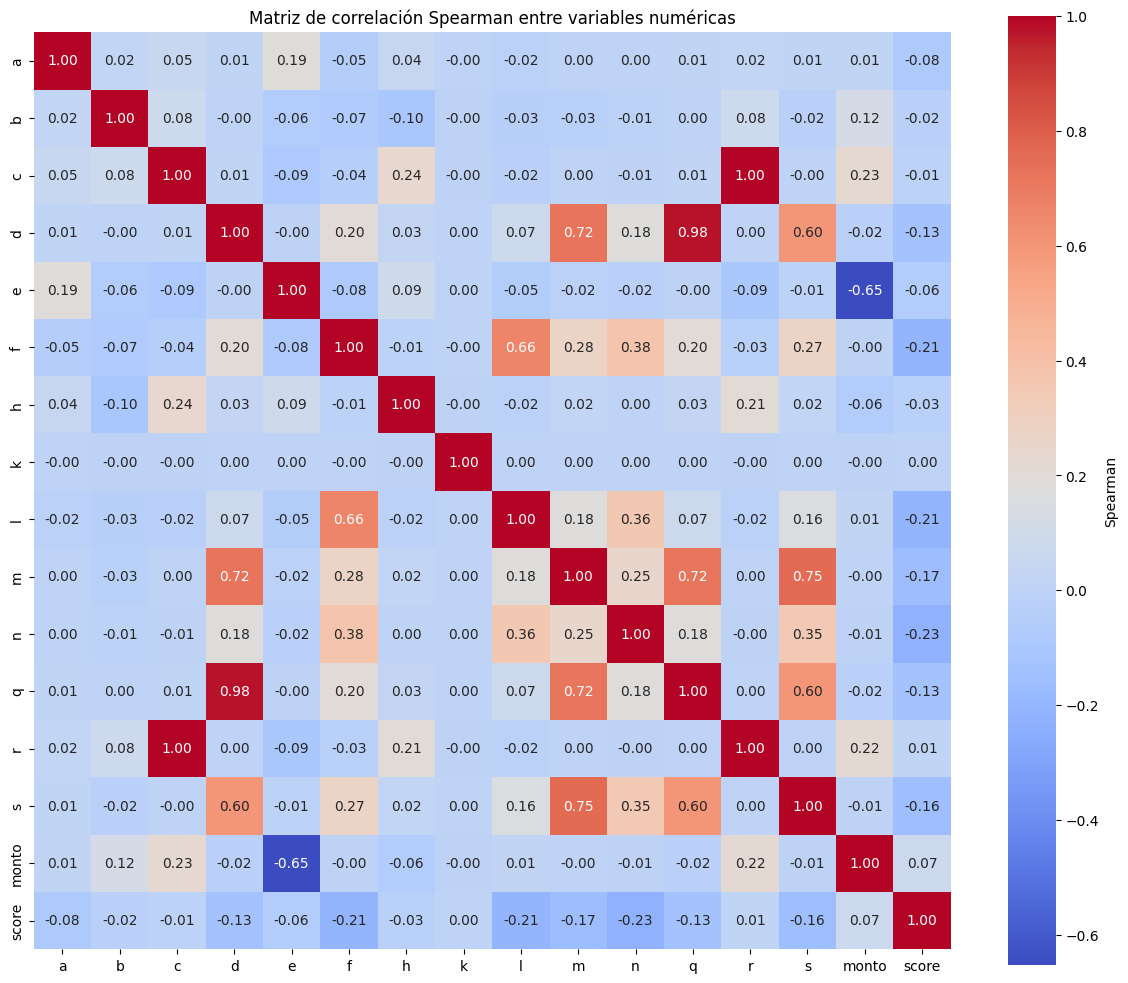

In [12]:
# Calcular la matriz de correlación Spearman solo para variables numéricas
numericas = ['a', 'b', 'c', 'd', 'e', 'f', 'h', 'k', 'l', 'm', 'n', 'q', 'r', 's', 'monto', 'score']
spearman_corr = fraud_df[numericas].corr(method='spearman')

# Para visualizar, mostramos las principales correlaciones absolutas entre variables
# Sacar la diagonal y obtener los pares de variables más correlacionados
import numpy as np
corr_pairs = (
    spearman_corr.abs()
    .where(~np.eye(spearman_corr.shape[0], dtype=bool))
    .stack()
    .reset_index()
)
corr_pairs.columns = ['Var1', 'Var2', 'abs(Spearman)']
# Eliminar duplicados (correlación es simétrica)
top_corr = corr_pairs.sort_values(by='abs(Spearman)', ascending=False).drop_duplicates(subset=['abs(Spearman)']).head(10)

print("Top 10 correlaciones absolutas (Spearman) entre variables numéricas:")
display(top_corr)

# Visualización: heatmap de correlación
plt.figure(figsize=(12,10))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'label': 'Spearman'})
plt.title("Matriz de correlación Spearman entre variables numéricas")
plt.tight_layout()
plt.show()



Wasserstein/JSD para comparar fraude vs no-fraude (discriminación)

JSD alto = variable útil para distinguir fraude
JSD bajo = variable irrelevante por sí sola

a 0.268	buena señal	
l 0.229	buena señal	
n 0.207	señal moderada	
m 0.193	señal moderada	
d 0.177	algo de señal

variable    wasserstein  jensen_shannon
15    score      23.373377        0.396288
0         a       0.248775        0.267501
8         l     920.363420        0.229334
10        n       0.228594        0.207028
9         m     137.882020        0.192717
3         d       7.186115        0.177991
13        s      24.389558        0.174457
11        q       0.143543        0.145611
1         b       0.028301        0.123588
14    monto      30.227333        0.097193
6         h       2.311055        0.093957
2         c  132112.861538        0.042474
12        r  117827.418774        0.036504
7         k       0.004053        0.028823
5         f      33.576994        0.010345
4         e       0.046108        0.006312

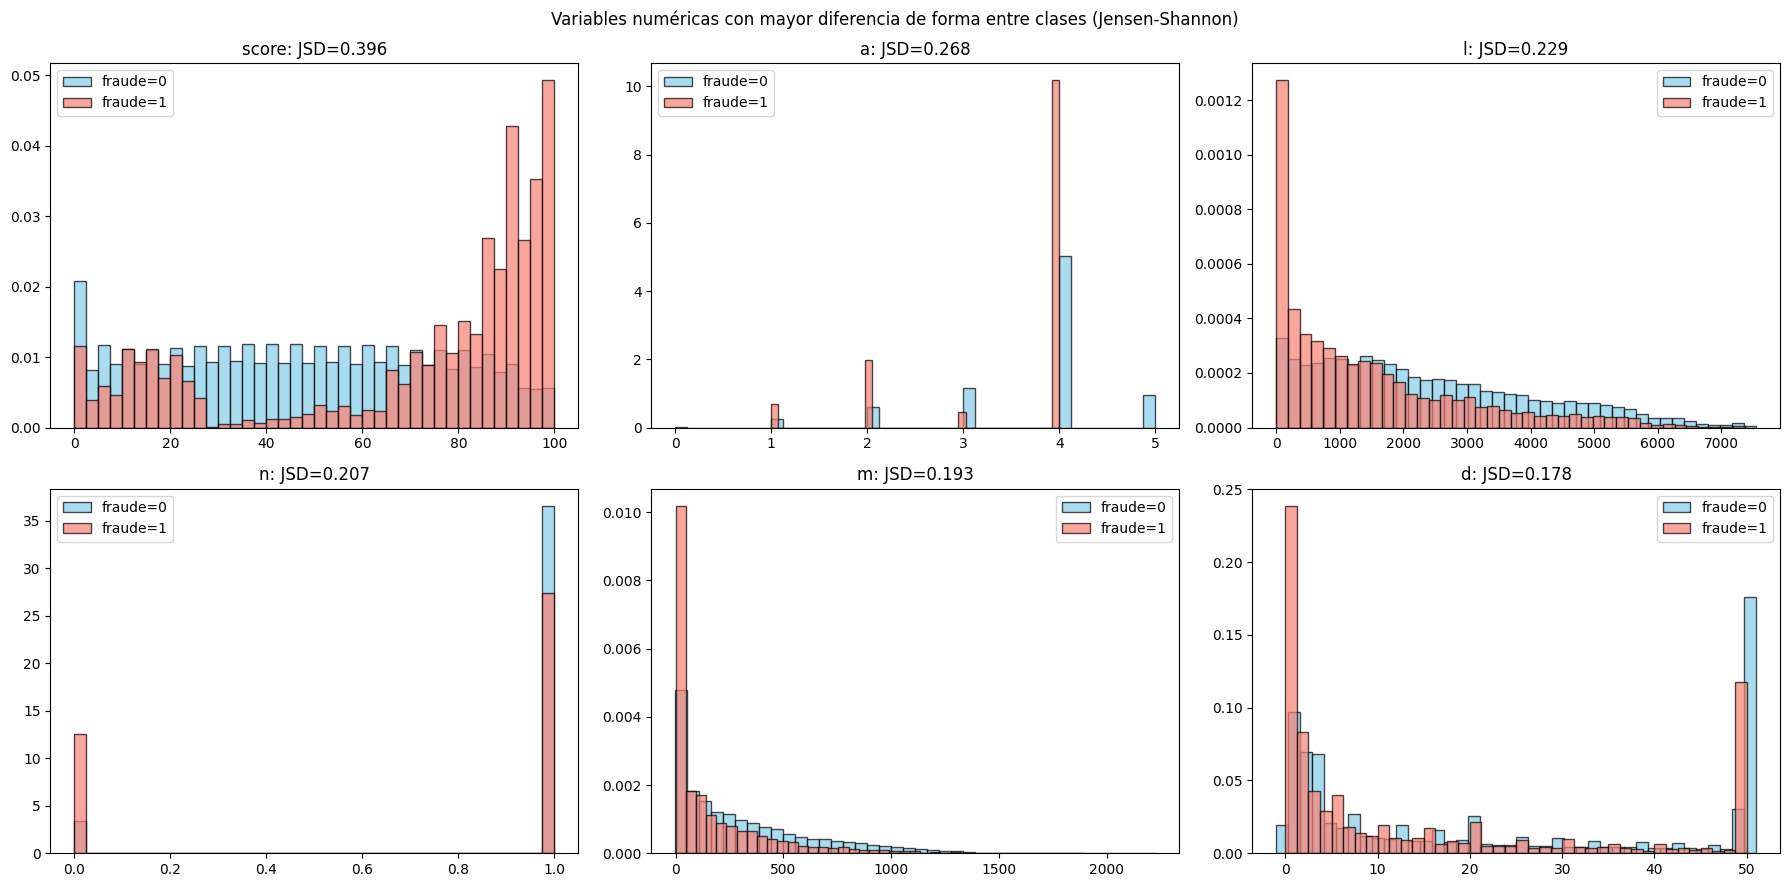

In [13]:
# Análisis de similitud de forma entre variables usando la distancia de Wasserstein y Jensen-Shannon
from scipy.stats import wasserstein_distance, entropy
from scipy.spatial.distance import jensenshannon

def variable_similarity_stats(df, variables, clase_col="fraude", bins=50):
    """
    Calcula distancia de Wasserstein y Jensen-Shannon entre las distribuciones
    de variables numéricas según la clase (fraude=0 vs fraude=1).
    
    Devuelve un DataFrame con las distancias para cada variable.
    """
    results = []
    for var in variables:
        valores_0 = df[df[clase_col]==0][var].dropna()
        valores_1 = df[df[clase_col]==1][var].dropna()
        
        # Definir bins comunes para histogramas normalizados
        data_min = min(valores_0.min(), valores_1.min())
        data_max = max(valores_0.max(), valores_1.max())
        bins_edges = np.linspace(data_min, data_max, bins+1)
        
        hist_0, _ = np.histogram(valores_0, bins=bins_edges, density=True)
        hist_1, _ = np.histogram(valores_1, bins=bins_edges, density=True)
        
        # Sumar una pequeña constante para evitar log(0) en JSD
        eps = 1e-8
        hist_0 = hist_0 + eps
        hist_1 = hist_1 + eps
        
        hist_0 /= hist_0.sum()
        hist_1 /= hist_1.sum()
        
        # Wasserstein (Earth Mover's Distance)
        wd = wasserstein_distance(valores_0, valores_1)
        # Jensen-Shannon (simetrizada, raíz cuadrada)
        jsd = jensenshannon(hist_0, hist_1)
        
        results.append({
            "variable": var,
            "wasserstein": wd,
            "jensen_shannon": jsd
        })
    res_df = pd.DataFrame(results).sort_values("jensen_shannon", ascending=False)
    return res_df

# Calcular similitud de forma para variables numéricas principales
shape_sim_df = variable_similarity_stats(fraud_df, numericas)
display(shape_sim_df)

# Visualización de las variables más "diferentes" en forma
top_jsd_vars = shape_sim_df.sort_values("jensen_shannon", ascending=False).head(6)["variable"]
fig, axs = plt.subplots(2, 3, figsize=(18,9))
for ax, var in zip(axs.flat, top_jsd_vars):
    for clase, color, alpha in zip([0, 1], ['skyblue', 'salmon'], [0.7, 0.7]):
        datos = fraud_df[fraud_df['fraude']==clase][var].dropna()
        ax.hist(datos, bins=40, alpha=alpha, color=color, label=f'fraude={clase}', density=True, edgecolor='black')
    ax.set_title(f"{var}: JSD={shape_sim_df.loc[shape_sim_df['variable']==var, 'jensen_shannon'].values[0]:.3f}")
    ax.legend()
plt.suptitle("Variables numéricas con mayor diferencia de forma entre clases (Jensen-Shannon)")
plt.tight_layout()
plt.show()


Analisis de variables categoricas

In [14]:
# Imprimir columnas categóricas y cantidad de valores únicos por cada una

# Seleccionar columnas categóricas (tipo object o category)
cat_cols = fraud_df.select_dtypes(include=['object', 'category']).columns

# Mostrar el nombre de la columna y la cantidad de valores únicos
for col in cat_cols:
    print(f"{col}: {fraud_df[col].nunique()} valores únicos")

g: 51 valores únicos
i: 127804 valores únicos
j: 8324 valores únicos
o: 2 valores únicos
p: 2 valores únicos
fecha: 145813 valores únicos


In [15]:
print("Valores que toma 'o':", fraud_df['o'].unique())
print("Valores que toma 'p':", fraud_df['p'].unique())
print("Valores que toma 'g':", fraud_df['g'].unique())

Valores que toma 'o': [nan 'Y' 'N']
Valores que toma 'p': ['N' 'Y']
Valores que toma 'g': ['BR' 'AR' 'UY' 'US' 'GB' nan 'SE' 'FR' 'MX' 'RU' 'CL' 'CO' 'AU' 'ES' 'IT'
 'PT' 'AD' 'CA' 'GE' 'EC' 'DE' 'CR' 'PY' 'BE' 'KR' 'HN' 'NI' 'GR' 'CH'
 'NZ' 'AE' 'IN' 'PR' 'BO' 'NL' 'CN' 'PE' 'TR' 'BS' 'PA' 'DO' 'EG' 'GH'
 'PH' 'UA' 'FI' 'TW' 'NO' 'LB' 'IL' 'JP' 'ZA']


In [16]:
# Mostrar tabla con los 10 valores únicos más frecuentes de 'g' y la cantidad de resultados en cada fila
g_counts_top10 = fraud_df['g'].value_counts().head(10).reset_index()
g_counts_top10.columns = ['g', 'cantidad']
display(g_counts_top10)


g  cantidad
0  BR    185579
1  AR     53634
2  UY      5044
3  US      3794
4  SE       608
5  MX       402
6  RU       116
7  ES       114
8  CO       109
9  GB        68

In [17]:
# Imprimir los 10 valores más frecuentes de la columna 'i'
top10_i = fraud_df['i'].value_counts().head(10)
print("10 valores más frecuentes de 'i':")
print(top10_i)

10 valores más frecuentes de 'i':
i
Fone De Ouvido Sem Fio Xiaomi Airdots Preto                                                     137
Xiaomi Redmi Note 8 Dual Sim 64 Gb Azul-netuno 4 Gb Ram                                          81
Clean Sept - Álcool Em Gel 70% 500 Ml                                                            81
Máscara Descartável Tripla Com Elástico Proteção Anvisa 50un                                     77
Bebedouro Bomba Elétrica P Garrafão Galão Água Recarregável                                      68
Kit 10 Cuecas Box Boxer Microfibra Estampadas Originais                                          65
Streaming Media Player Google Chromecast 2nd Generation 256mb Preto Com Memória Ram De 512mb     63
Xiaomi Redmi Note 8 Dual Sim 64 Gb Preto-espacial 4 Gb Ram                                       59
Samsung Galaxy A30s Dual Sim 64 Gb Prism Crush Black 4 Gb Ram                                    56
Streaming Media Player Google Chromecast 3rd Generation Carbón C

In [18]:
# Imprimir los 10 valores más frecuentes de la columna 'i'
top10_i = fraud_df['j'].value_counts().head(10)
print("10 valores más frecuentes de 'j':")
print(top10_i)

10 valores más frecuentes de 'j':
j
cat_43b9c10    3697
cat_604df77    2987
cat_d69bed9    2978
cat_6c4cfdc    2418
cat_4249bd8    1984
cat_3203c7c    1870
cat_be0af8e    1739
cat_0820fab    1577
cat_8ef7164    1477
cat_d5975ae    1446
Name: count, dtype: int64


Variables numericos que tomen pocos valores

In [19]:
# Obtener columnas numéricas (int o float)
num_cols = fraud_df.select_dtypes(include=['number']).columns

# Imprimir la cantidad de valores únicos para cada variable numérica
for col in num_cols:
    print(f"{col}: {fraud_df[col].nunique()} valores únicos")

Unnamed: 0: 150000 valores únicos
a: 6 valores únicos
b: 7672 valores únicos
c: 135090 valores únicos
d: 53 valores únicos
e: 43208 valores únicos
f: 1559 valores únicos
h: 61 valores únicos
k: 150000 valores únicos
l: 7389 valores únicos
m: 1882 valores únicos
n: 2 valores únicos
q: 52 valores únicos
r: 91391 valores únicos
s: 2 valores únicos
monto: 26333 valores únicos
score: 10142 valores únicos
fraude: 2 valores únicos


Los que tienen pocos valores unicos (menos de 100), los imprimí a continuacion para verlos bien

In [20]:
# Mostrar los valores únicos ordenados por frecuencia para las columnas a, b, s, d, q, h

import pandas as pd
from IPython.display import display

cols_to_check = ['a','n', 's', 'd', 'q', 'h']

for col in cols_to_check:
    val_counts = fraud_df[col].value_counts().reset_index()
    val_counts.columns = [col, 'frecuencia']
    print(f"\nValores únicos más frecuentes de '{col}':")
    display(val_counts)



Valores únicos más frecuentes de 'a':


a  frecuencia
0  4      158087
1  3       35121
2  5       28773
3  2       18988
4  1        8132
5  0         899


Valores únicos más frecuentes de 'n':


n  frecuencia
0  1      226788
1  0       23212


Valores únicos más frecuentes de 's':


s  frecuencia
0  100      139856
1    0      110144


Valores únicos más frecuentes de 'd':


d  frecuencia
0   50.0       47464
1    1.0       32642
2    2.0       22650
3    3.0       13074
4   49.0        9567
5    4.0        8935
6   51.0        8869
7    5.0        6751
8    0.0        6236
9   20.0        5570
10   6.0        5567
11   7.0        4712
12   8.0        4161
13   9.0        3752
14  10.0        3417
15  11.0        3256
16  12.0        3242
17  13.0        3064
18  19.0        2995
19  14.0        2794
20  21.0        2691
21  15.0        2676
22  16.0        2656
23  18.0        2547
24  17.0        2476
25  22.0        1990
26  24.0        1918
27  23.0        1907
28  25.0        1839
29  26.0        1754
30  28.0        1708
31  29.0        1701
32  27.0        1683
33  30.0        1580
34  31.0        1507
35  32.0        1451
36  34.0        1362
37  33.0        1354
38  36.0        1305
39  35.0        1302
40  37.0        1301
41  38.0        1273
42  40.0        1170
43  39.0        1155
44  43.0        1138
45  41.0        1103
46  42.0        1099
47  44.0        1069
48  45.0         989
49  48.0         962
50  46.0         950
51  47.0         948
52  -1.0         124


Valores únicos más frecuentes de 'q':


q  frecuencia
0   0.98       32990
1   1.00       32440
2   0.02       30763
3   0.00       20749
4   0.04       16843
5   0.06       10578
6   0.08        7759
7   0.10        5985
8   0.12        5053
9   0.38        4587
10  0.14        4515
11  0.40        4343
12  0.16        3834
13  0.18        3619
14  0.22        3323
15  0.20        3263
16  0.24        3129
17  0.26        2873
18  0.28        2820
19  0.32        2629
20  0.30        2602
21  0.36        2527
22  0.34        2503
23  0.42        2046
24  0.46        1942
25  0.44        1926
26  0.48        1867
27  0.50        1799
28  0.54        1744
29  0.56        1719
30  0.52        1701
31  0.58        1634
32  0.60        1544
33  0.64        1440
34  0.68        1423
35  0.62        1395
36  0.66        1321
37  0.72        1314
38  0.70        1272
39  0.74        1260
40  0.76        1217
41  0.78        1176
42  0.80        1116
43  0.86        1113
44  0.84        1103
45  0.82        1093
46  0.88        1049
47  0.92         972
48  0.96         968
49  0.90         955
50  0.94         922
51 -0.02         648


Valores únicos más frecuentes de 'h':


h  frecuencia
0    1       19956
1    0       18378
2    2       14585
3    5       11313
4    3       10994
..  ..         ...
56  52         561
57  51         542
58  57         349
59  58          56
60  59           2

[61 rows x 2 columns]

Identificar outliers en variables numericas

In [21]:
# Identificaremos outliers en las variables numéricas usando el método del IQR

import numpy as np

outliers_dict = {}

for col in num_cols:
    # Excluir columnas poco informativas, si aplica (como Unnamed: 0, fraude, etc.)
    if col in ['Unnamed: 0', 'fraude']:
        continue
    data = fraud_df[col].dropna()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # Buscar índices/filas donde la variable sea un outlier
    outliers = fraud_df[(fraud_df[col] < lower_bound) | (fraud_df[col] > upper_bound)]
    outliers_count = outliers.shape[0]
    total_count = data.shape[0]
    outliers_dict[col] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers_count': outliers_count,
        'porcentaje': 100 * outliers_count / total_count if total_count > 0 else 0
    }
    print(f"{col}: {outliers_count} outliers ({outliers_dict[col]['porcentaje']:.2f}% de los datos)")

# Puedes mostrar un resumen en un DataFrame para mayor claridad
outliers_df = pd.DataFrame([
    {'variable': col, 
     'lower_bound': outliers_dict[col]['lower_bound'], 
     'upper_bound': outliers_dict[col]['upper_bound'],
     'outliers_count': outliers_dict[col]['outliers_count'],
     'porcentaje': outliers_dict[col]['porcentaje']}
    for col in outliers_dict
]).sort_values(by='porcentaje', ascending=False)

display(outliers_df)


a: 9031 outliers (3.61% de los datos)
b: 13981 outliers (6.12% de los datos)
c: 28154 outliers (12.32% de los datos)
d: 0 outliers (0.00% de los datos)
e: 12603 outliers (5.04% de los datos)
f: 28924 outliers (11.57% de los datos)
h: 8594 outliers (3.44% de los datos)
k: 0 outliers (0.00% de los datos)
l: 549 outliers (0.22% de los datos)
m: 7409 outliers (2.97% de los datos)
n: 23212 outliers (9.28% de los datos)
q: 0 outliers (0.00% de los datos)
r: 20545 outliers (8.22% de los datos)
s: 0 outliers (0.00% de los datos)
monto: 24336 outliers (9.73% de los datos)
score: 0 outliers (0.00% de los datos)


variable    lower_bound    upper_bound  outliers_count  porcentaje
2         c -193080.437500  347706.822500           28154   12.319824
5         f     -47.000000      81.000000           28924   11.570294
14    monto     -36.745000      88.255000           24336    9.734400
10        n       1.000000       1.000000           23212    9.284800
12        r -295378.000000  523190.000000           20545    8.218000
1         b       0.485350       0.998550           13981    6.117903
4         e      -0.425501       0.709169           12603    5.041200
0         a       1.500000       5.500000            9031    3.612400
6         h     -24.000000      48.000000            8594    3.437600
9         m    -584.500000    1091.500000            7409    2.970658
8         l   -2876.000000    7276.000000             549    0.219613
3         d     -66.000000     118.000000               0    0.000000
7         k      -0.502347       1.495672               0    0.000000
11        q      -1.370000       2.390000               0    0.000000
13        s    -150.000000     250.000000               0    0.000000
15    score     -52.300000     146.580000               0    0.000000

### Analisis del Fraude

mean_fraud     std_fraud  mean_no_fraud   std_no_fraud
a           3.509331  9.296582e-01       3.716967       0.907484
b           0.750961  1.516226e-01       0.726945       0.131772
c      384679.135844  1.089741e+06  253984.761870  831679.025633
d          14.866586  1.796004e+01      22.043243      20.111939
e           0.196602  6.723822e-01       0.223656       2.688736
f          18.745934  2.008662e+02      52.295192     691.371499
h          12.038923  1.343223e+01      14.327801      14.214245
k           0.500575  2.888231e-01       0.497507       0.288229
l        1432.313650  1.496984e+03    2352.674027    1710.648538
m         169.093403  2.491394e+02     306.948184     322.983757
n           0.685417  4.643804e-01       0.914012       0.280347
q           0.287288  3.594816e-01       0.430830       0.402215
r      370950.336710  1.028498e+06  254534.300749  795491.151420
s          32.284724  4.675960e+01      56.674282      49.552640
monto      72.953943  1.648242e+02      42.731876      84.962220
score      69.897227  3.208088e+01      46.523851      28.332886

/tmp/ipykernel_29721/1593380688.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fraude', y=col, data=fraud_df, ax=ax, palette='Set2', showfliers=False)
/tmp/ipykernel_29721/1593380688.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No Fraude', 'Fraude'])
/tmp/ipykernel_29721/1593380688.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fraude', y=col, data=fraud_df, ax=ax, palette='Set2', showfliers=False)
/tmp/ipykernel_29721/1593380688.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator

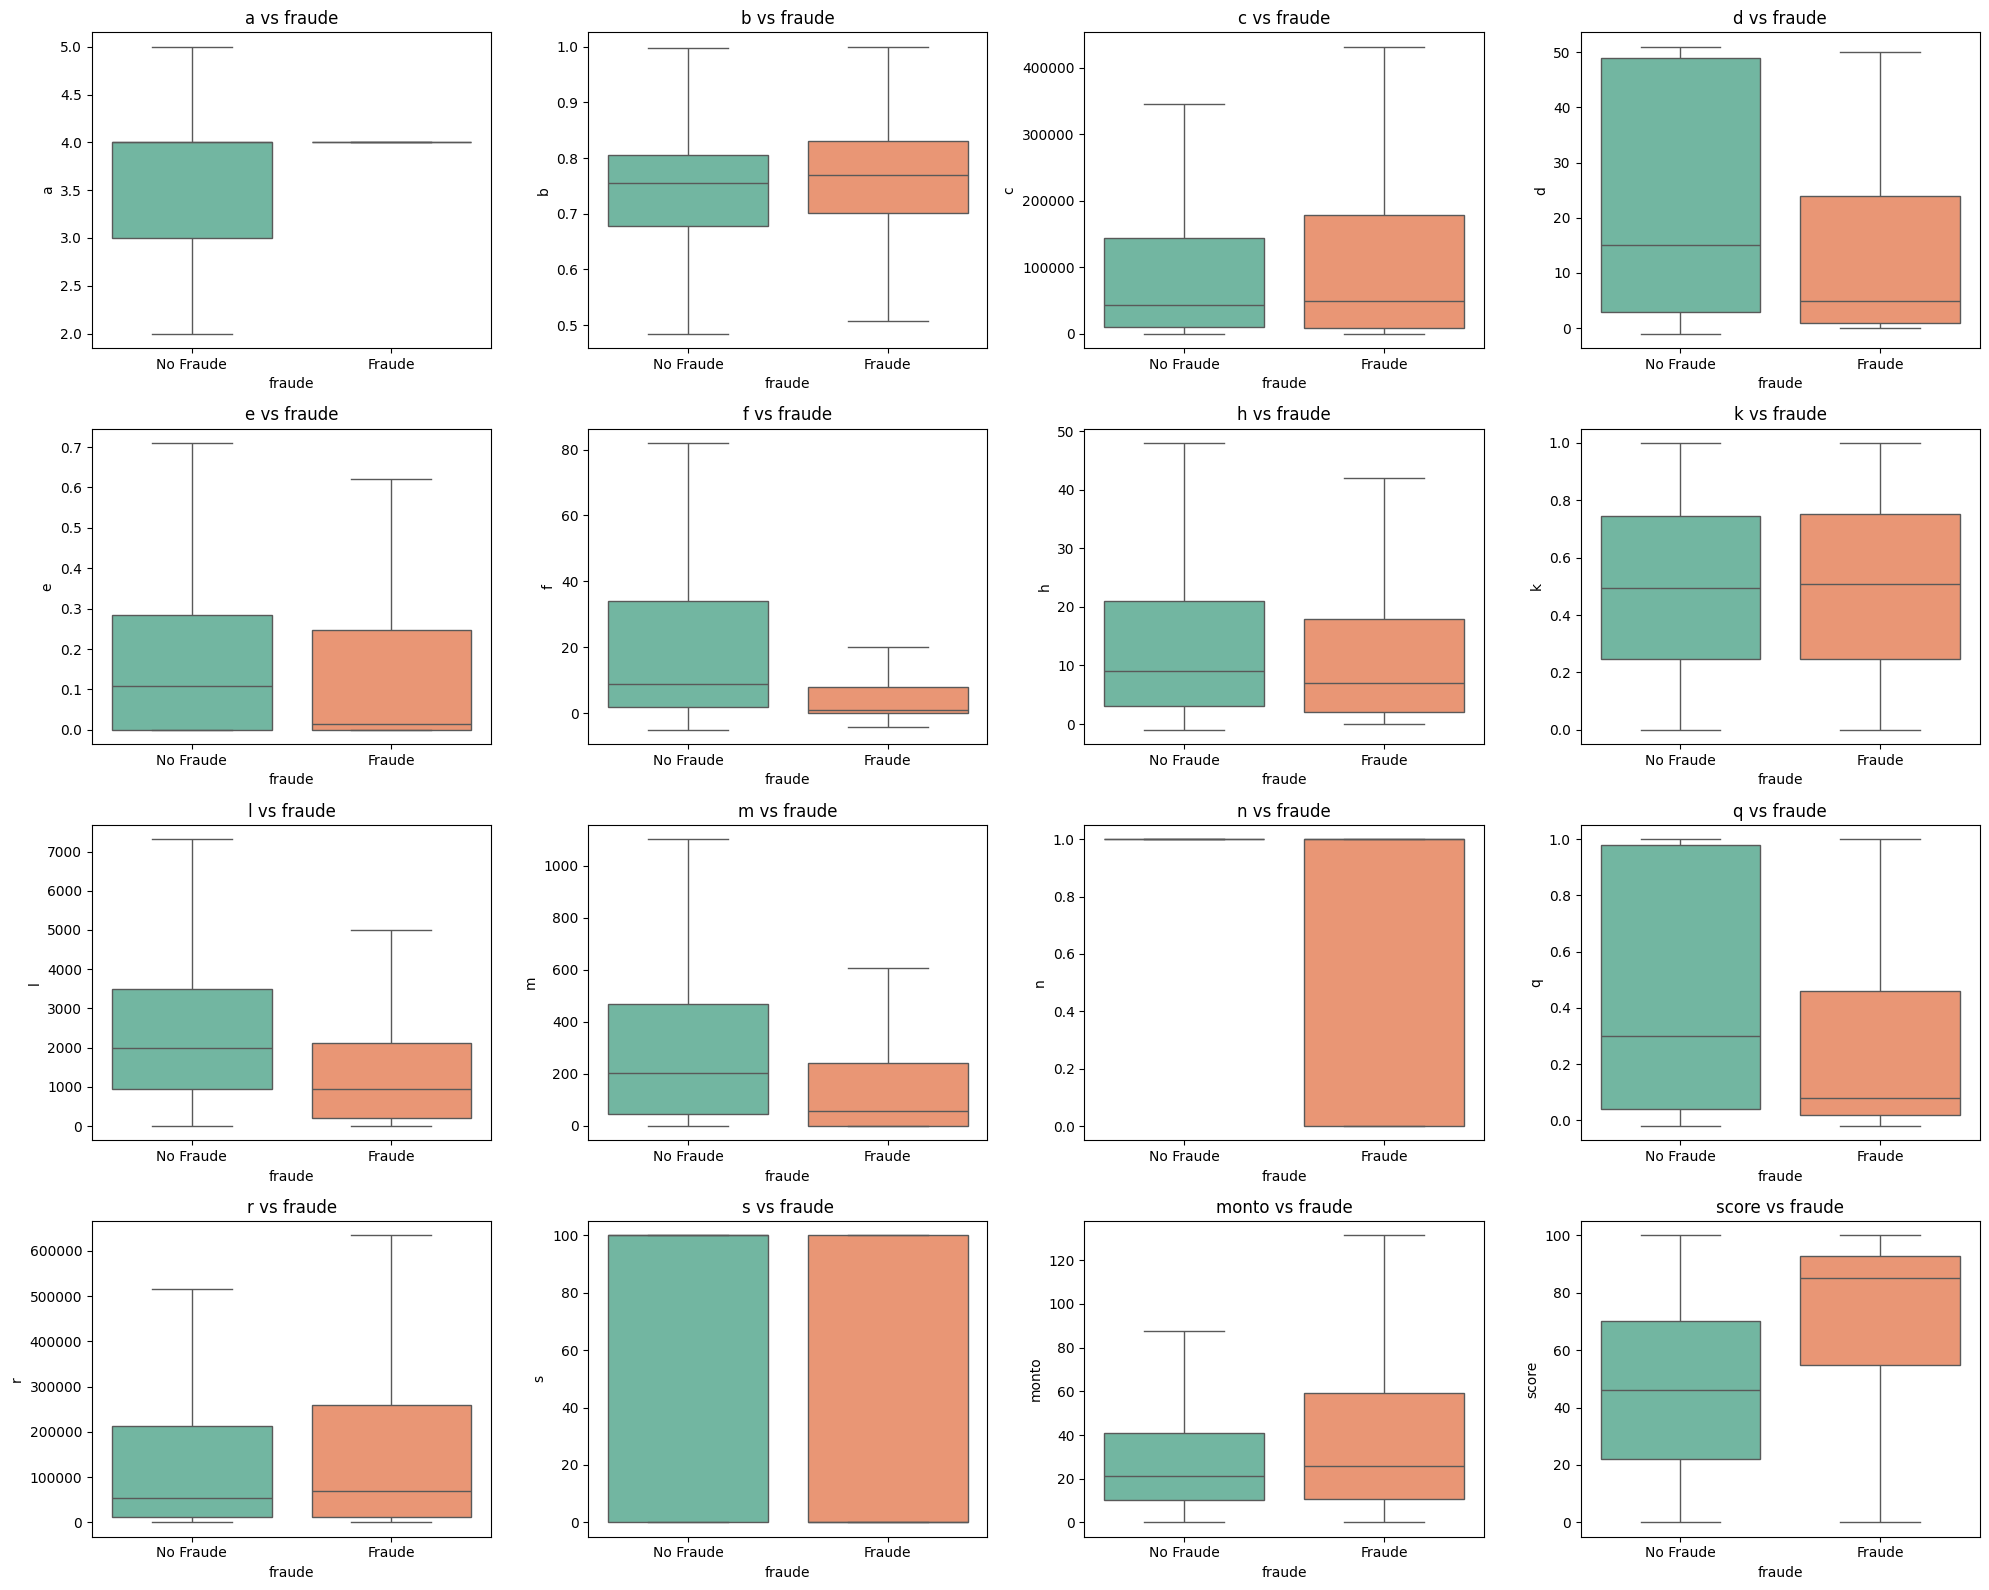

Variables con mayor diferencia relativa de medias (%):


mean_fraud     std_fraud  mean_no_fraud   std_no_fraud  \
monto      72.953943  1.648242e+02      42.731876      84.962220   
f          18.745934  2.008662e+02      52.295192     691.371499   
c      384679.135844  1.089741e+06  253984.761870  831679.025633   
score      69.897227  3.208088e+01      46.523851      28.332886   
r      370950.336710  1.028498e+06  254534.300749  795491.151420   
m         169.093403  2.491394e+02     306.948184     322.983757   
s          32.284724  4.675960e+01      56.674282      49.552640   
l        1432.313650  1.496984e+03    2352.674027    1710.648538   
q           0.287288  3.594816e-01       0.430830       0.402215   
d          14.866586  1.796004e+01      22.043243      20.111939   
n           0.685417  4.643804e-01       0.914012       0.280347   
h          12.038923  1.343223e+01      14.327801      14.214245   
e           0.196602  6.723822e-01       0.223656       2.688736   
a           3.509331  9.296582e-01       3.716967       0.907484   
b           0.750961  1.516226e-01       0.726945       0.131772   
k           0.500575  2.888231e-01       0.497507       0.288229   

       rel_diff_mean  
monto      70.724878  
f         -64.153618  
c          51.457565  
score      50.239557  
r          45.736875  
m         -44.911418  
s         -43.034613  
l         -39.119758  
q         -33.317692  
d         -32.557174  
n         -25.010013  
h         -15.975081  
e         -12.096224  
a          -5.586165  
b           3.303642  
k           0.616676

In [22]:
# Comparación de características entre transacciones fraudulentas y normales

# Primero, identificamos cuáles son las variables más relevantes para comparar
cols_to_compare = [col for col in num_cols if col not in ['Unnamed: 0', 'fraude']]

import matplotlib.pyplot as plt
import seaborn as sns

fraud = fraud_df[fraud_df['fraude'] == 1]
no_fraud = fraud_df[fraud_df['fraude'] == 0]

# Creamos un resumen estadístico por grupo
summary_fraud = fraud[cols_to_compare].describe().T
summary_no_fraud = no_fraud[cols_to_compare].describe().T

# Unimos los resúmenes para fácil comparación
comparison_df = summary_fraud[['mean', 'std']].rename(columns={'mean':'mean_fraud', 'std':'std_fraud'})
comparison_df['mean_no_fraud'] = summary_no_fraud['mean']
comparison_df['std_no_fraud'] = summary_no_fraud['std']

display(comparison_df)

# Visualización: Boxplots lado a lado por variable
fig, axes = plt.subplots(nrows=int(np.ceil(len(cols_to_compare)/4)), ncols=4, figsize=(20, 4 * int(np.ceil(len(cols_to_compare)/4))))
axes = axes.flatten()

for i, col in enumerate(cols_to_compare):
    ax = axes[i]
    sns.boxplot(x='fraude', y=col, data=fraud_df, ax=ax, palette='Set2', showfliers=False)
    ax.set_title(f"{col} vs fraude")
    ax.set_xticklabels(['No Fraude', 'Fraude'])
plt.tight_layout()
plt.show()

# También podemos ver la diferencia relativa promedio entre los dos grupos
comparison_df['rel_diff_mean'] = 100 * (comparison_df['mean_fraud'] - comparison_df['mean_no_fraud']) / (comparison_df['mean_no_fraud'].replace(0, np.nan)).abs()
print("Variables con mayor diferencia relativa de medias (%):")
display(comparison_df.sort_values('rel_diff_mean', key=abs, ascending=False))



Revisando el grid de boxplots anterior me llama la atencion la columna "n", sea lo que sea eso solo los fraude toman valores de 0.
* Tal vez es verificacion en 2 pasos? Autenticacion de cuenta? Es algun tipo de flag

In [23]:
fraud_df['n']


0         1
1         1
2         1
3         1
4         1
         ..
249995    1
249996    1
249997    1
249998    1
249999    1
Name: n, Length: 250000, dtype: int64

Propociones diferentes de fraude por pais?

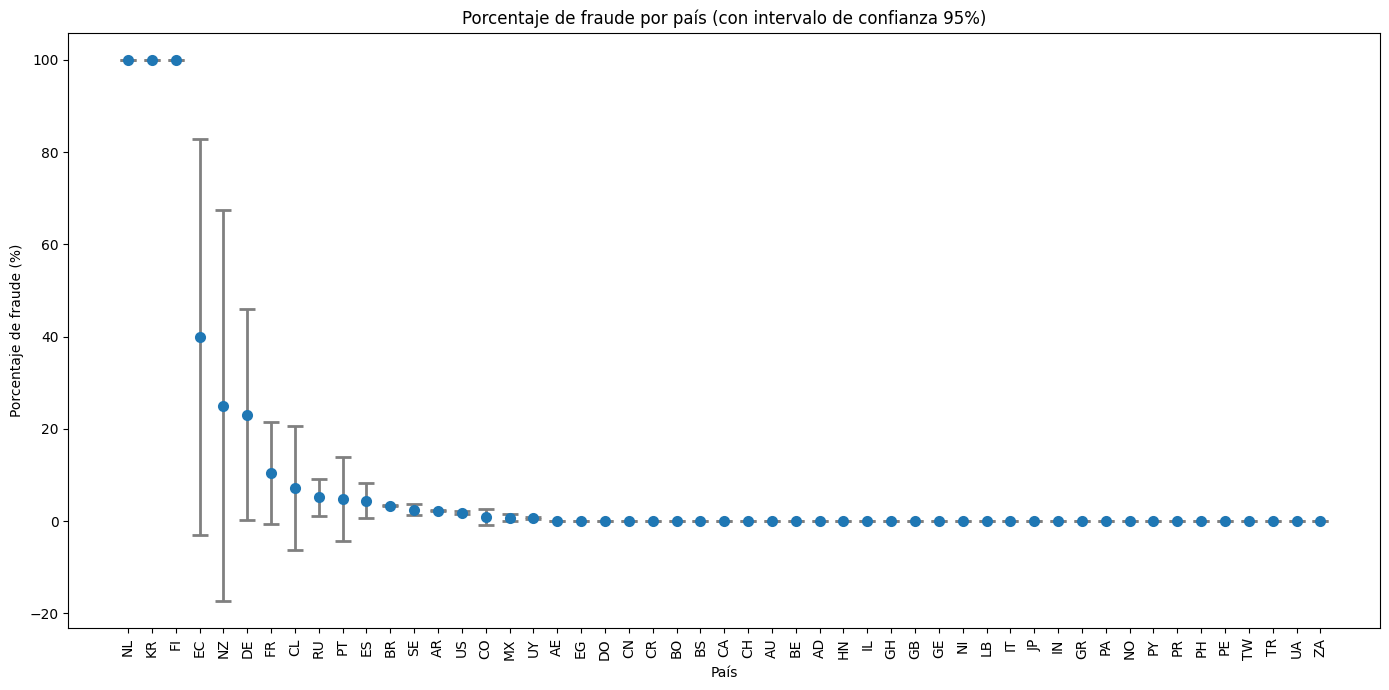

In [24]:
# Calcular el porcentaje de fraude por país y el número de muestras por país
fraude_pais_stats = fraud_df.groupby('g').agg(
    porcentaje_fraude=('fraude', lambda x: 100 * x.mean()),
    cantidad_muestras=('fraude', 'size')
).reset_index()

# Calcular intervalo de confianza para porcentaje usando aproximación normal
from scipy.stats import norm

z = norm.ppf(0.975)
fraude_pais_stats['fraude_frac'] = fraude_pais_stats['porcentaje_fraude'] / 100
n = fraude_pais_stats['cantidad_muestras']
p = fraude_pais_stats['fraude_frac']
stderr = np.sqrt(p * (1 - p) / n)
err = z * stderr * 100  # convertir a porcentaje

fraude_pais_stats['ci_lower'] = fraude_pais_stats['porcentaje_fraude'] - err
fraude_pais_stats['ci_upper'] = fraude_pais_stats['porcentaje_fraude'] + err

# Ordenar de mayor a menor
fraude_pais_stats = fraude_pais_stats.sort_values('porcentaje_fraude', ascending=False)

# Plot: puntos con barras de error en lugar de barras
plt.figure(figsize=(14, 7))
plt.errorbar(
    fraude_pais_stats['g'],
    fraude_pais_stats['porcentaje_fraude'],
    yerr=[fraude_pais_stats['porcentaje_fraude'] - fraude_pais_stats['ci_lower'], 
          fraude_pais_stats['ci_upper'] - fraude_pais_stats['porcentaje_fraude']],
    fmt='o',
    capsize=6,
    color='tab:blue',
    ecolor='gray',
    elinewidth=2,
    markeredgewidth=2
)
plt.ylabel('Porcentaje de fraude (%)')
plt.xlabel('País')
plt.title('Porcentaje de fraude por país (con intervalo de confianza 95%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Recortado el anterior grafico para ver mejor

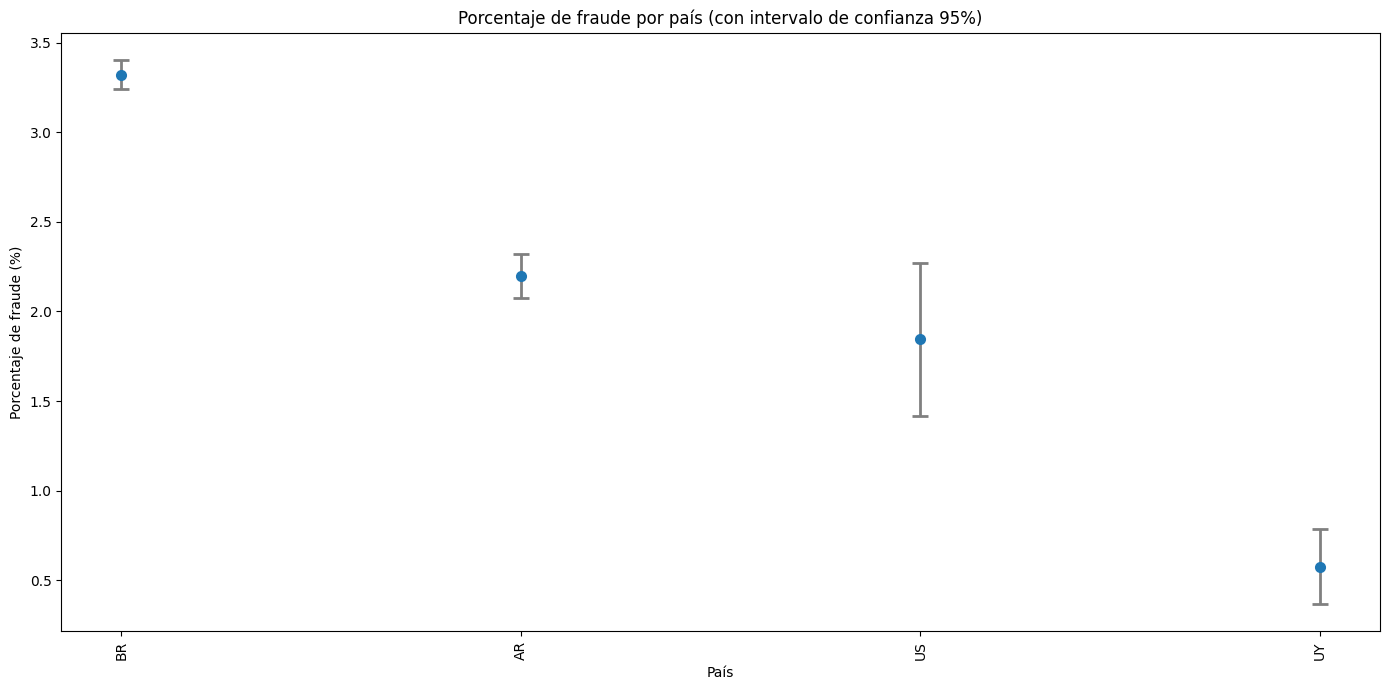

In [25]:
# Calcular el porcentaje de fraude por país y el número de muestras por país
fraude_pais_stats = fraud_df.groupby('g').agg(
    porcentaje_fraude=('fraude', lambda x: 100 * x.mean()),
    cantidad_muestras=('fraude', 'size')
).reset_index()

# Filtrar solo países con más de 1000 muestras
fraude_pais_stats = fraude_pais_stats[fraude_pais_stats['cantidad_muestras'] > 1000]

# Calcular intervalo de confianza para porcentaje usando aproximación normal
from scipy.stats import norm

z = norm.ppf(0.975)
fraude_pais_stats['fraude_frac'] = fraude_pais_stats['porcentaje_fraude'] / 100
n = fraude_pais_stats['cantidad_muestras']
p = fraude_pais_stats['fraude_frac']
stderr = np.sqrt(p * (1 - p) / n)
err = z * stderr * 100  # convertir a porcentaje

fraude_pais_stats['ci_lower'] = fraude_pais_stats['porcentaje_fraude'] - err
fraude_pais_stats['ci_upper'] = fraude_pais_stats['porcentaje_fraude'] + err

# Ordenar de mayor a menor
fraude_pais_stats = fraude_pais_stats.sort_values('porcentaje_fraude', ascending=False)

# Plot: puntos con barras de error en lugar de barras
plt.figure(figsize=(14, 7))
plt.errorbar(
    fraude_pais_stats['g'],
    fraude_pais_stats['porcentaje_fraude'],
    yerr=[fraude_pais_stats['porcentaje_fraude'] - fraude_pais_stats['ci_lower'], 
          fraude_pais_stats['ci_upper'] - fraude_pais_stats['porcentaje_fraude']],
    fmt='o',
    capsize=6,
    color='tab:blue',
    ecolor='gray',
    elinewidth=2,
    markeredgewidth=2
)
plt.ylabel('Porcentaje de fraude (%)')
plt.xlabel('País')
plt.title('Porcentaje de fraude por país (con intervalo de confianza 95%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Existe diferencia significativa en proporcion de fraude por pais? (parece que si)

In [26]:
from statsmodels.stats.proportion import proportions_ztest

# Seleccionar los países de interés
paises_interes = ['BR', 'AR', 'US', 'UY']
df_paises = fraud_df[fraud_df['g'].isin(paises_interes)]

# Calcular el número de fraudes y observaciones por país
conteos = df_paises.groupby('g')['fraude'].agg(['sum', 'count']).loc[paises_interes]

# Crear todas las combinaciones pareadas de países
from itertools import combinations

print("Comparación de proporciones de fraude entre pares de países ('g'):")
for pais1, pais2 in combinations(paises_interes, 2):
    count = [conteos.loc[pais1, 'sum'], conteos.loc[pais2, 'sum']]
    nobs = [conteos.loc[pais1, 'count'], conteos.loc[pais2, 'count']]
    stat, pval = proportions_ztest(count, nobs)
    print(f"{pais1} vs {pais2}: z = {stat:.3f}, p-value = {pval:.4g}")

Comparación de proporciones de fraude entre pares de países ('g'):
BR vs AR: z = 13.283, p-value = 2.901e-40
BR vs US: z = 5.046, p-value = 4.518e-07
BR vs UY: z = 10.856, p-value = 1.872e-27
AR vs US: z = 1.441, p-value = 0.1495
AR vs UY: z = 7.762, p-value = 8.343e-15
US vs UY: z = 5.616, p-value = 1.959e-08


**BR tiene tasa de fraude significativamente mayor que AR, US y UY** (z enormes, p≈0).

AR ≈ US (z=1.44, p=0.15 → no rechazás igualdad).

¿Vale la pena hacer un modelo distinto para Brasil?

In [27]:
import pandas as pd
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.multitest import multipletests
from itertools import combinations

# tasas por país
t = conteos.rename(columns={'sum':'fraudes','count':'n'})
t['rate'] = t['fraudes']/t['n']
t['ci_low'], t['ci_high'] = proportion_confint(t['fraudes'], t['n'], method='wilson')
t['lift_vs_global'] = t['rate'] / (fraud_df['fraude'].mean())
print(t[['fraudes','n','rate','ci_low','ci_high','lift_vs_global']])

# pares con efecto y FDR
rows, pvals = [], []
for a,b in combinations(t.index,2):
    count=[t.loc[a,'fraudes'], t.loc[b,'fraudes']]
    nobs=[t.loc[a,'n'],        t.loc[b,'n']]
    z, p = proportions_ztest(count, nobs)
    diff = t.loc[a,'rate'] - t.loc[b,'rate']
    rr = t.loc[a,'rate'] / t.loc[b,'rate'] if t.loc[b,'rate']>0 else float('inf')
    rows.append([a,b,z,p,diff,rr]); pvals.append(p)

rej, padj, *_ = multipletests(pvals, method='fdr_bh')
pairs = pd.DataFrame(rows, columns=['pais1','pais2','z','p','diff_rate','risk_ratio'])
pairs['p_fdr'] = padj; pairs['signif_fdr'] = rej
print(pairs.sort_values('p_fdr'))


    fraudes       n      rate    ci_low   ci_high  lift_vs_global
g                                                                
BR     6164  185579  0.033215  0.032409  0.034040        1.106870
AR     1179   53634  0.021982  0.020775  0.023258        0.732549
US       70    3794  0.018450  0.014630  0.023245        0.614842
UY       29    5044  0.005749  0.004006  0.008245        0.191596
  pais1 pais2          z             p  diff_rate  risk_ratio         p_fdr  \
0    BR    AR  13.283108  2.900980e-40   0.011233    1.510985  1.740588e-39   
2    BR    UY  10.855798  1.871656e-27   0.027466    5.777113  5.614969e-27   
4    AR    UY   7.762254  8.343308e-15   0.016233    3.823408  1.668662e-14   
5    US    UY   5.615586  1.958969e-08   0.012701    3.209060  2.938454e-08   
1    BR    US   5.045745  4.517579e-07   0.014765    1.800251  5.421095e-07   
3    AR    US   1.441452  1.494569e-01   0.003532    1.191442  1.494569e-01   

   signif_fdr  
0        True  
2        True  
4 

**BR**: tasa **3.32%** (IC 3.24–3.40). Lift **1.11** vs global &rarr; apenas 11% arriba del promedio.

- Las diferencias con AR/US/... son estadísticamente enormes por el N, pero el efecto absoluto es chico:<br>
  &nbsp;&nbsp;&bull; **BR–AR = 1.12 p.p.**, **BR–US = 1.48 p.p.**

**AR y US**: no presentan diferencias significativas tras corrección FDR (p=0.149). Sus ICs se superponen bastante.

**UY**: **0.57%** (IC 0.40–0.82). Lift **0.19** &rarr; 81% por debajo del promedio.<br>
Diferencias con todos los demás son fuertes y materialmente grandes (**3–6×** de riesgo relativo).

Posibles decisiones de negocio

**Factor de riesgo geográfico (feature geo_risk) con 3 niveles: {bajo=UY, medio=AR/US, alto=BR}.**

Revisión manual focalizada**: BR con monto alto y horas de riesgo → cola de revisión prioritaria. 


Monitoreo: alerta si el lift por país cambia >±25% semana a semana.

#### En que moneda esta el monto?

/tmp/ipykernel_29721/1003705377.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='g', y='monto', data=df_paises, palette='pastel')


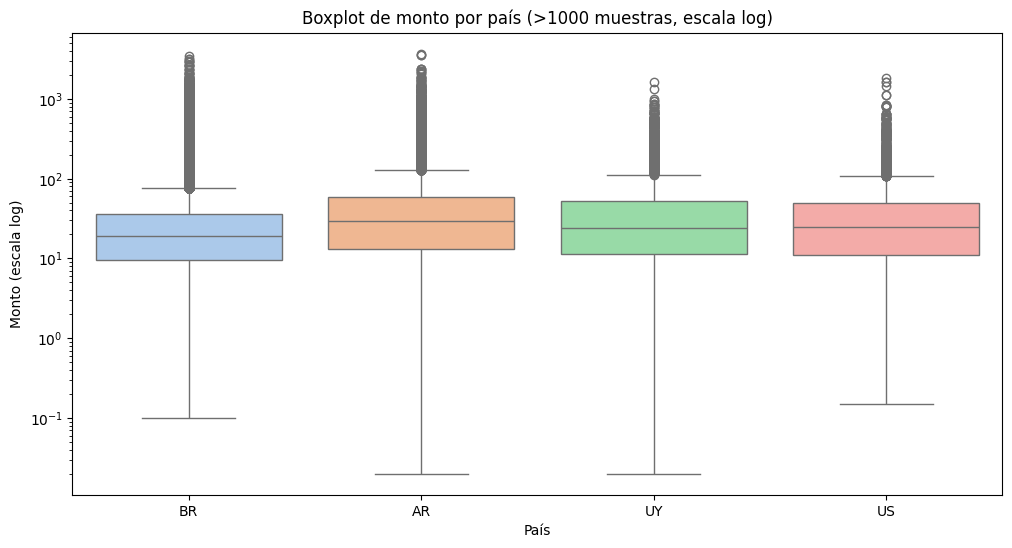

In [28]:
# Filtrar países con más de 1000 muestras
pais_counts = fraud_df['g'].value_counts()
paises_mas_1000 = pais_counts[pais_counts > 1000].index.tolist()
df_paises = fraud_df[fraud_df['g'].isin(paises_mas_1000)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='g', y='monto', data=df_paises, palette='pastel')
plt.yscale('log')
plt.title('Boxplot de monto por país (>1000 muestras, escala log)')
plt.xlabel('País')
plt.ylabel('Monto (escala log)')
plt.show()


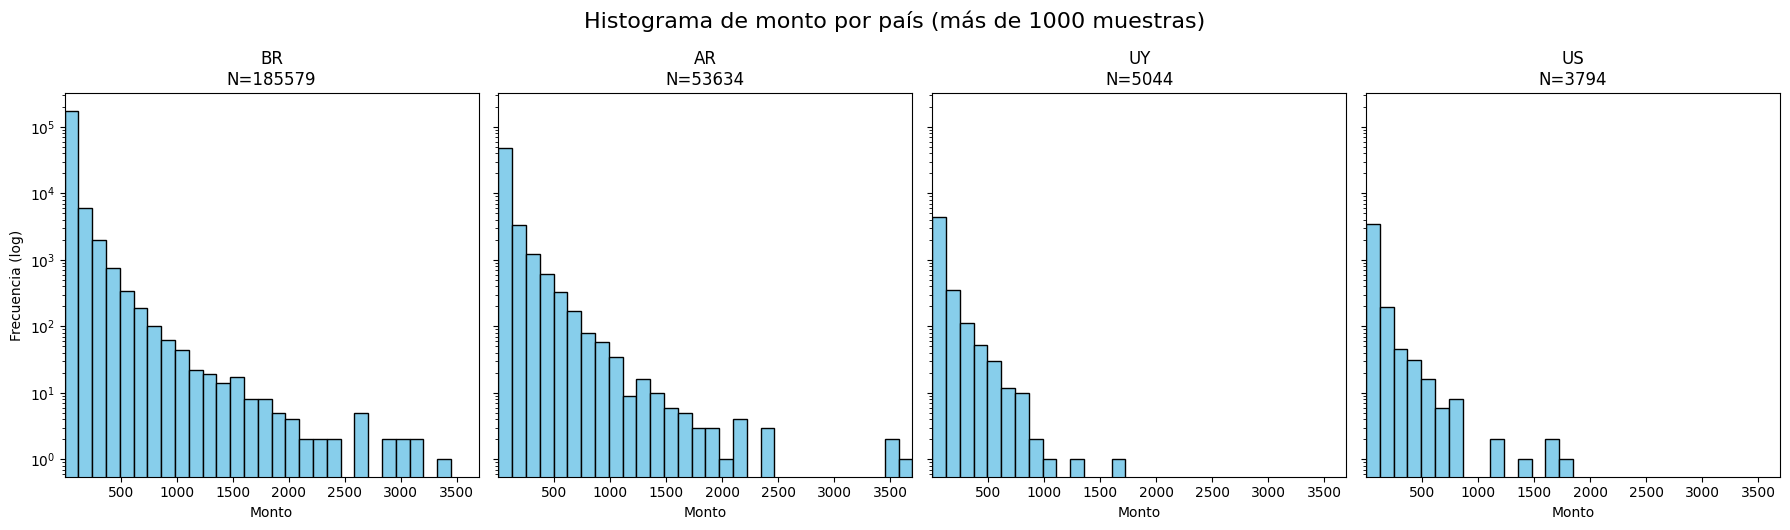

In [29]:
import numpy as np, matplotlib.pyplot as plt

# Histograma de monto por país con más de 1000 muestras
# Definir los mínimos y máximos para eje x común
monto_min = df_paises['monto'].min()
monto_max = df_paises['monto'].max()
bins = np.linspace(monto_min, monto_max, 31)  # 30 bins de igual tamaño (igual en todos)

fig, axes = plt.subplots(nrows=1, ncols=len(paises_mas_1000), figsize=(18, 5), sharey=True)
for i, pais in enumerate(paises_mas_1000):
    ax = axes[i] if len(paises_mas_1000) > 1 else axes
    datos_pais = df_paises[df_paises['g'] == pais]['monto']
    ax.hist(datos_pais, bins=bins, color='skyblue', edgecolor='black', log=True)
    ax.set_title(f"{pais}\nN={len(datos_pais)}")
    ax.set_xlabel("Monto")
    ax.set_xlim(monto_min, monto_max)
    if i == 0:
        ax.set_ylabel("Frecuencia (log)")
plt.tight_layout()
plt.suptitle("Histograma de monto por país (más de 1000 muestras)", y=1.05, fontsize=16)
plt.show()




Existen montos muy bajos?

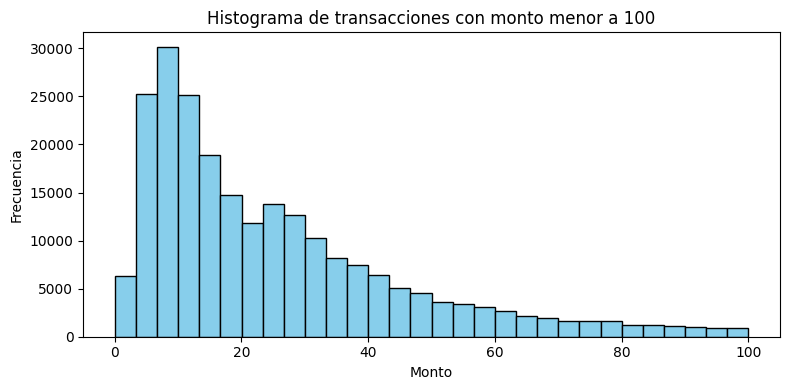

In [30]:
# Histograma de monto < 100
import matplotlib.pyplot as plt

monto_menor_100 = fraud_df[fraud_df["monto"] < 100]["monto"]

plt.figure(figsize=(8, 4))
plt.hist(monto_menor_100, bins=30, color='skyblue', edgecolor='black')
plt.title("Histograma de transacciones con monto menor a 100")
plt.xlabel("Monto")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

Porque existen montos tan bajos? Son realmente transacciones? Errores de carga?

In [31]:
# Transacciones con monto igual a 0
monto_cero = fraud_df[fraud_df["monto"] == 2]
monto_cero

Unnamed: 0  a       b          c     d         e       f   g   h  \
65              65  4  0.5470   71444.09  24.0  2.713101     7.0  AR  39   
12487        12487  2  0.5000       7.88  50.0  0.000000    20.0  BR   0   
15487        15487  2  0.1991     434.72  21.0  0.000000     5.0  AR   2   
18609        18609  4  0.3239     672.14  50.0  3.653769    13.0  AR  33   
23194        23194  2  0.7432     143.38   4.0  0.000000    32.0  BR   1   
29805        29805  4  0.7190   97917.11  50.0  0.847619    46.0  BR  35   
44645        44645  4  0.6930  100695.71  29.0  0.890891    28.0  BR  25   
49372        49372  1  0.7555    9541.02  15.0  0.730303     0.0  BR   0   
52637        52637  2  0.4106     488.46  50.0  0.000000    53.0  AR  26   
56751        56751  4     NaN        NaN   1.0  2.102336     0.0  BR  46   
61291        61291  2  0.5347   22251.26   2.0  0.000000   159.0  AR  10   
66883        66883  2  0.6419     533.68   1.0  0.000000     0.0  BR   0   
68713        68713  4  0.6991   37741.59  12.0  1.391391     5.0  BR   2   
74096        74096  2  0.7088     585.59  50.0  0.000000   114.0  BR   5   
75829        75829  2  0.0000      27.44  50.0  0.000000     1.0  BR   0   
77003        77003  3  0.8432     491.42   1.0  1.668521   102.0  BR  15   
80737        80737  2  0.3401     942.58   9.0  0.000000    44.0  AR   0   
82167        82167  2  1.0000       1.89   1.0  0.000000     0.0  BR   0   
90908        90908  4  0.5581   19319.08  50.0  2.692231   111.0  US  12   
100288      100288  2  0.4807   12582.95   1.0  0.000000   175.0  AR  20   
107761      107761  2  0.7672     132.48   1.0  0.000000     0.0  BR   2   
124003      124003  4  0.6700    6157.27  50.0  0.890891     5.0  BR  14   
126959      126959  2  0.7051    4002.09   2.0  0.000000   167.0  AR   0   
129341      129341  4  0.7421   37946.89   1.0  0.898990     0.0  BR  16   
131058      131058  2     NaN        NaN   2.0  0.000000   183.0  BR  34   
138568      138568  4  0.7234  256644.03   7.0  2.202318     2.0  BR  40   
138857      138857  2  0.4159   33796.06   3.0  0.000000   275.0  AR   3   
148788      148788  2  0.4891      24.92  50.0  0.000000    37.0  AR   1   
149831      149831  3     NaN        NaN  28.0  0.000000    40.0  BR  29   
179569       29569  2  0.9479     126.72  50.0  0.000000   106.0  BR   0   
229099       79099  5  0.6988  298767.01  20.0  0.000000  2584.0  BR  29   
235730       85730  3  0.6918   54528.91  17.0  0.000000     9.0  BR   9   
244522       94522  1  0.8312  198015.25  51.0  0.000000   904.0  UY   8   

                                                        i  ...  n    o  p  \
65        Cuaderno De Caligrafia Nº 2 Plantec Normas Iram  ...  1  NaN  Y   
12487   Cartão Google Play Store Gift Card R$10 Reais ...  ...  1  NaN  Y   
15487              Call Of Duty Deluxe Edition Digital Pc  ...  1  NaN  Y   
18609   Ricardo Iorio Atesorando En Los Cielos Cd Nuev...  ...  1  NaN  Y   
23194   Forza Horizon 4 Edição Suprema- Pc E Xbox (onl...  ...  1  NaN  Y   
29805   Cabo Adaptador P3 ( P2 Combo ) X Fone Headset ...  ...  1  NaN  N   
44645   Pinos Fixar Alça Tampão Porta-mala 206 207 C3 ...  ...  1  NaN  Y   
49372   Esmalte Risqué Diamond Gel Noz Moscada Cremoso...  ...  1  NaN  N   
52637        El Método Wyckoff - Enrique Diaz Valdecantos  ...  1  NaN  Y   
56751   Par De Chaveta Bicicleta Antiga Phillps Raleig...  ...  0    N  N   
61291   Pasta Ballina 500grs Vainilla-chocolate Cotill...  ...  1    Y  Y   
66883        Fifa 20 Xbox One Mídia Digital + Jogo Brinde  ...  0  NaN  N   
68713   Botão Interruptor Farol Moto Liga Desliga Auxi...  ...  1  NaN  N   
74096   Scrapbook Digital Monstros S.a - 300 Imagens D...  ...  1    Y  Y   
75829                                Descarga Cg 99 Usada  ...  1  NaN  Y   
77003   Chave Torx T8 C/ Furo Para Ps3 Ps4 Controle Do...  ...  1  NaN  N   
80737                   Los Primeros 1000 Días De Tu Hijo  ...  1    N  Y   
82167   Hidratante Amakha Animals Mas

In [32]:
# Frecuencia de valores en columna j (top 20)
frecuencia_j = fraud_df['j'].value_counts(dropna=False).reset_index()
frecuencia_j.columns = ['j', 'frecuencia']
frecuencia_j = frecuencia_j.head(20)
frecuencia_j

j  frecuencia
0   cat_43b9c10        3697
1   cat_604df77        2987
2   cat_d69bed9        2978
3   cat_6c4cfdc        2418
4   cat_4249bd8        1984
5   cat_3203c7c        1870
6   cat_be0af8e        1739
7   cat_0820fab        1577
8   cat_8ef7164        1477
9   cat_d5975ae        1446
10  cat_f0ec611        1279
11  cat_960e53d        1269
12  cat_0eb83e7        1247
13  cat_e600e6d        1196
14  cat_ffe7351        1122
15  cat_ec06c68        1094
16  cat_381751d        1089
17  cat_0f47e2a        1072
18  cat_9bacaa5        1034
19  cat_2d99b60        1020

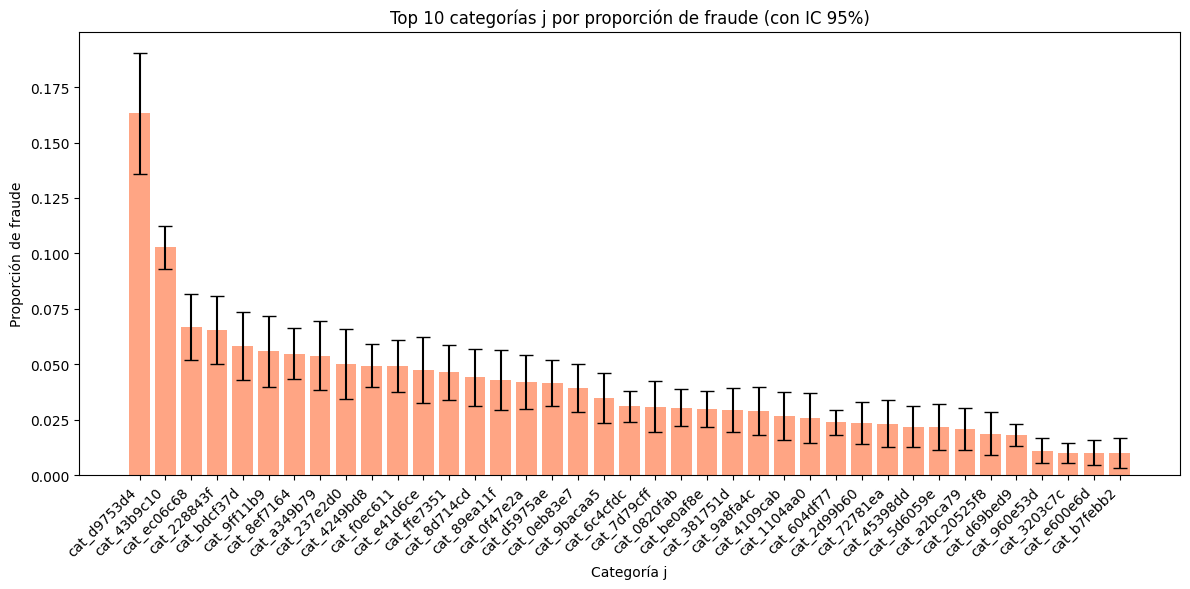

In [33]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Calcular proporción de fraude por categoría de 'j'
cat_counts = fraud_df.groupby('j').size()
cat_frauds = fraud_df.groupby('j')['fraude'].sum()
cat_props = cat_frauds / cat_counts

# Filtrar solo categorías con más de 100 muestras
mask = cat_counts > 700
cat_counts_fil = cat_counts[mask]
cat_props_fil = cat_props[mask]

# Calcular intervalo de confianza del 95% para la proporción
z = norm.ppf(0.975)  # 95% IC

intervalos = []
for j_cat in cat_counts_fil.index:
    n = cat_counts_fil[j_cat]
    p = cat_props_fil[j_cat]
    se = np.sqrt(p * (1 - p) / n)
    ic_lower = max(0, p - z*se)
    ic_upper = min(1, p + z*se)
    intervalos.append([j_cat, n, p, ic_lower, ic_upper])

# Crear DataFrame con los resultados
df_ic = pd.DataFrame(intervalos, columns=["j", "n_muestras", "proporcion_fraude", "ic_95_inf", "ic_95_sup"])
df_ic = df_ic.sort_values("proporcion_fraude", ascending=False)
df_ic.reset_index(drop=True, inplace=True)
df_ic.head(10)  # Mostrar top 10 categorías con mayor proporción de fraude

import matplotlib.pyplot as plt

# Seleccionar las 10 categorías con mayor proporción de fraude
top10 = df_ic

plt.figure(figsize=(12,6))
bars = plt.bar(top10['j'], top10['proporcion_fraude'], yerr=[top10['proporcion_fraude']-top10['ic_95_inf'], top10['ic_95_sup']-top10['proporcion_fraude']], capsize=5, color="coral", alpha=0.7)
plt.ylabel("Proporción de fraude")
plt.xlabel("Categoría j")
plt.title("Top 10 categorías j por proporción de fraude (con IC 95%)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [34]:
# Mostrar productos con la categoría 'cat_d9754d4' en la columna 'j'
productos_cat_d9754d4 = fraud_df[fraud_df['j'] == 'cat_d9753d4']
display(productos_cat_d9754d4)

Unnamed: 0  a       b        c     d         e     f   g   h  \
16              16  2     NaN      NaN   1.0   0.00000   1.0  BR   0   
460            460  2  1.0000     5.50   1.0   0.00000   1.0  BR   0   
556            556  2  1.0000     5.67   1.0   0.00000  26.0  BR   0   
1087          1087  3  1.0000    27.76   5.0   0.00000  20.0  BR   0   
1426          1426  2  0.7492    30.15  50.0   0.00000  27.0  BR   1   
...            ... ..     ...      ...   ...       ...   ...  ..  ..   
247824       97824  2  0.6117  1832.61  50.0   0.52381  22.0  BR  11   
247903       97903  3  0.5667  5444.49  49.0   0.00000   2.0  BR   3   
248418       98418  3  0.6723   538.45   1.0  20.40000   0.0  BR   3   
249118       99118  2     NaN      NaN  16.0   0.00000   5.0  AR   3   
249511       99511  2  1.0000     8.72   2.0   0.00000  12.0  BR  -1   

                                                        i  ...  n    o  p  \
16                                 Chaveiro Lindo Do Thor  ...  0  NaN  N   
460                                   Kit Chaveiro Brasil  ...  1    N  N   
556                              Chaveiro Lindo Do Thanos  ...  1    N  N   
1087    Tear Afegão Serenity Loms Manta Cobertor Tapet...  ...  1    N  N   
1426                  Produto Spo Original Super Promoçao  ...  1    Y  Y   
...                                                   ...  ... ..  ... ..   
247824          Dvd Elle (2019) Filme Dublado E Legendado  ...  1    Y  Y   
247903       Estratégia Day Trade - Mini Dólar - Scalping  ...  1  NaN  Y   
248418                           Suspensao Recondicionada  ...  0  NaN  N   
249118  Alquiler De Mesas Y Sillas - C.a.b.a Y G.b.a. ...  ...  1  NaN  N   
249511                           Super Pacote De Produtos  ...  1    N  N   

           q       r    s                fecha  monto  score  fraude  
16      0.02  260445    0  2020-03-28 17:09:53   5.46  91.00       1  
460     0.00       5    0  2020-04-02 23:41:02   5.50  95.00       1  
556     0.02       5    0  2020-03-27 21:27:19   5.43  94.00       1  
1087    0.10      27    0  2020-03-19 14:24:13   7.47  90.00       1  
1426    0.98      30  100  2020-04-17 18:06:02   4.53  46.00       0  
...      ...     ...  ...                  ...    ...    ...     ...  
247824  1.00    1832  100  2020-03-16 11:43:56   4.98  42.89       0  
247903  0.98    5444  100  2020-04-12 19:08:36   9.77   2.80       0  
248418  0.02     538    0  2020-03-18 11:55:10  11.80  98.81       0  
249118  0.30  260445    0  2020-03-09 12:36:36   9.59  82.43       0  
249511  0.02       8    0  2020-04-20 19:50:54   7.73  79.64       0  

[705 rows x 24 columns]

Podemos ponerle nombre a las categorias?

In [35]:
cat_to_names[['j', 'palabras_topic']]

NameError: name 'cat_to_names' is not defined

In [ ]:
# Mostrar 10 productos para la categoría 'cat_011add0'
cat_ejemplo_1 = 'cat_011add0'
productos_cat_1 = fraud_df[fraud_df['j'] == cat_ejemplo_1]['i'].dropna().astype(str).unique()[:10]
print(f"10 productos para la categoría {cat_ejemplo_1}:")
for prod in productos_cat_1:
    print("-", prod)

print("\n")

# Mostrar 10 productos para la categoría 'cat_0130aa9'
cat_ejemplo_2 = 'cat_0130aa9'
productos_cat_2 = fraud_df[fraud_df['j'] == cat_ejemplo_2]['i'].dropna().astype(str).unique()[:10]
print(f"10 productos para la categoría {cat_ejemplo_2}:")
for prod in productos_cat_2:
    print("-", prod)

10 productos para la categoría cat_011add0:
- Protetor Labial Fruit Shine Morango 4,8g - Nivea
- Pênis Grande Escroto Ventosa Lubrificante Brinde
- Laneige Lip Balm Coreano Morango 3g
- Laneige Lip Sleeping Mask Berry - Miniatura 3g
- 10 Máscara Descartável Valvula 3m Poeiras Névoas Fumos 8822
- Kit Erótico Revenda Sexshop 25 Produtos Atacado Anel Companh
- Kit Erótico 25 Produtos Anel Companheiro Revenda Atacado
- Kit Erotico 25 Produtos Ponto G Vibrador Revenda Sexshop
- Kit Sexshop 25un Plug Anal Térmico De Metal Sexyshop Anal
- Kit Feminino Sexshop Atacado Vibrador Lubrificante Fantasia


10 productos para la categoría cat_0130aa9:
- Óculos Para Por  De Grau Rêtro Leve Fibra Carbono /acetato
- Óculos Descanso Perto Retro +0,5 Até +3,0 Graus
- Oculos De Grau Armação Feminino Gatinho Retro Vintage Óculos
- Óculos Armação Com Grau Leitura Perto +3.75 Quadrado
- Oculos Rosa Armação De Grau Rose Grande Haste De Metal
- Armação Grau Round Redondo Dourado Feminino Masculino Luxo
- Óculos 

In [ ]:
import pandas as pd
import re

# 1) Preprocesar y tokenizar con vectorización
df_tok = (
    fraud_df[['j','i']]
      .dropna(subset=['i'])
      .assign(
          i=lambda d: d['i'].astype('string'),
          # normalizá si querés: .str.normalize('NFKD').str.encode('ascii','ignore').str.decode()
          tokens=lambda d: d['i'].str.lower().str.findall(r"[a-záéíóúñü0-9]+")
      )
      .explode('tokens')
      .rename(columns={'tokens':'token'})
)

# (Opcional) Sacar stopwords comunes, ignorar números y filtrar palabras de más de 2 letras
stop = {"de","la","el","y","para","en","con","por","del","los","las","a","un","una"}
df_tok = df_tok[
    ~df_tok['token'].isin(stop) &
    ~df_tok['token'].str.isnumeric() &
    (df_tok['token'].str.len() > 2)
]

# 2) Contar por categoría y palabra
vc = (
    df_tok.groupby('j')['token']
          .value_counts(sort=True)
          .groupby(level=0)
          .head(10)                              # top 10 por categoría
          .reset_index(name='freq')
)

# 3) Devolver en el formato pedido
df_top_palabras = (
    vc.groupby('j')['token']
      .agg(lambda s: ', '.join(s))
      .reset_index(name='10_palabras_mas_comunes')
)

display(df_top_palabras)


j                            10_palabras_mas_comunes
0     cat_0005972  ardentes, buttman, desejos, fresh, frete, meat...
1     cat_00115ef  rms, falante, woofer, alto, ohms, polegadas, p...
2     cat_0013c63  cooler, b240xhu, b251xhu, bangho, c230, disipa...
3     cat_001bdea  cadeira, alumínio, pesca, barco, camping, desm...
4     cat_0023dc4  1ra, ceramica, piso, blanco, lourdes, pared, c...
...           ...                                                ...
8319  cat_ffdf1e2  agua, canilla, esferica, genebre, presión, vál...
8320  cat_ffe1c2f  aparelho, cavita, celulite, corporal, estético...
8321  cat_ffe6d8e                                 doctor, gay, livro
8322  cat_ffe7351  moletom, blusa, now, united, casaco, frio, fem...
8323  cat_fff9534                                   beisbol, remeras

[8324 rows x 2 columns]

In [ ]:
df_top_palabras.to_csv('top_palabras_por_categoria.csv', index=False)

In [ ]:
fraud_df[fraud_df['j'] == 'cat_d9753d4']

a       b        c     d         e     f   g   h  \
16      2     NaN      NaN   1.0   0.00000   1.0  BR   0   
460     2  1.0000     5.50   1.0   0.00000   1.0  BR   0   
556     2  1.0000     5.67   1.0   0.00000  26.0  BR   0   
1087    3  1.0000    27.76   5.0   0.00000  20.0  BR   0   
1426    2  0.7492    30.15  50.0   0.00000  27.0  BR   1   
...    ..     ...      ...   ...       ...   ...  ..  ..   
247824  2  0.6117  1832.61  50.0   0.52381  22.0  BR  11   
247903  3  0.5667  5444.49  49.0   0.00000   2.0  BR   3   
248418  3  0.6723   538.45   1.0  20.40000   0.0  BR   3   
249118  2     NaN      NaN  16.0   0.00000   5.0  AR   3   
249511  2  1.0000     8.72   2.0   0.00000  12.0  BR  -1   

                                                        i            j  ...  \
16                                 Chaveiro Lindo Do Thor  cat_d9753d4  ...   
460                                   Kit Chaveiro Brasil  cat_d9753d4  ...   
556                              Chaveiro Lindo Do Thanos  cat_d9753d4  ...   
1087    Tear Afegão Serenity Loms Manta Cobertor Tapet...  cat_d9753d4  ...   
1426                  Produto Spo Original Super Promoçao  cat_d9753d4  ...   
...                                                   ...          ...  ...   
247824          Dvd Elle (2019) Filme Dublado E Legendado  cat_d9753d4  ...   
247903       Estratégia Day Trade - Mini Dólar - Scalping  cat_d9753d4  ...   
248418                           Suspensao Recondicionada  cat_d9753d4  ...   
249118  Alquiler De Mesas Y Sillas - C.a.b.a Y G.b.a. ...  cat_d9753d4  ...   
249511                           Super Pacote De Produtos  cat_d9753d4  ...   

        n    o  p     q       r    s                fecha  monto  score fraude  
16      0  NaN  N  0.02  260445    0  2020-03-28 17:09:53   5.46  91.00      1  
460     1    N  N  0.00       5    0  2020-04-02 23:41:02   5.50  95.00      1  
556     1    N  N  0.02       5    0  2020-03-27 21:27:19   5.43  94.00      1  
1087    1    N  N  0.10      27    0  2020-03-19 14:24:13   7.47  90.00      1  
1426    1    Y  Y  0.98      30  100  2020-04-17 18:06:02   4.53  46.00      0  
...    ..  ... ..   ...     ...  ...                  ...    ...    ...    ...  
247824  1    Y  Y  1.00    1832  100  2020-03-16 11:43:56   4.98  42.89      0  
247903  1  NaN  Y  0.98    5444  100  2020-04-12 19:08:36   9.77   2.80      0  
248418  0  NaN  N  0.02     538    0  2020-03-18 11:55:10  11.80  98.81      0  
249118  1  NaN  N  0.30  260445    0  2020-03-09 12:36:36   9.59  82.43      0  
249511  1    N  N  0.02       8    0  2020-04-20 19:50:54   7.73  79.64      0  

[705 rows x 23 columns]

In [ ]:
# Mostrar productos de la categoría cat_0082695
productos_cat_0082695 = fraud_df[fraud_df['j'] == 'cat_0082695']
display(productos_cat_0082695)

a       b         c     d       e     f   g  h  \
67331   4     NaN       NaN   1.0  0.5575  36.0  BR  1   
115169  4  0.8219  15694.47  50.0  0.0000  10.0  BR  6   
184037  3     NaN       NaN   0.0  0.5575  37.0  BR  0   

                                                        i            j  ...  \
67331                              Gaseificador Domestico  cat_0082695  ...   
115169  Sodastream - Máquina Para Gaseificar Água Jet ...  cat_0082695  ...   
184037                             Gaseificador Domestico  cat_0082695  ...   

          o  p     q       r    s                fecha   monto  score  fraude  \
67331   NaN  N  0.02  260445    0  2020-04-12 09:21:57   22.64  55.00       0   
115169  NaN  Y  0.98   15694  100  2020-04-12 14:06:59  113.03   7.00       0   
184037  NaN  N  0.02  260445    0  2020-04-12 09:21:57   25.03  53.48       0   

       incluye_grat  
67331         False  
115169        False  
184037        False  

[3 rows x 24 columns]

In [162]:
# Mostrar los productos (i) que aparecen con más frecuencia en el dataset fraud_df
productos_mas_frecuentes = (
    fraud_df['i']
    .value_counts()
    .head(10)  # top 10 productos más frecuentes
)
display(productos_mas_frecuentes)



i
Fone De Ouvido Sem Fio Xiaomi Airdots Preto                                                     137
Xiaomi Redmi Note 8 Dual Sim 64 Gb Azul-netuno 4 Gb Ram                                          81
Clean Sept - Álcool Em Gel 70% 500 Ml                                                            81
Máscara Descartável Tripla Com Elástico Proteção Anvisa 50un                                     77
Bebedouro Bomba Elétrica P Garrafão Galão Água Recarregável                                      68
Kit 10 Cuecas Box Boxer Microfibra Estampadas Originais                                          65
Streaming Media Player Google Chromecast 2nd Generation 256mb Preto Com Memória Ram De 512mb     63
Xiaomi Redmi Note 8 Dual Sim 64 Gb Preto-espacial 4 Gb Ram                                       59
Samsung Galaxy A30s Dual Sim 64 Gb Prism Crush Black 4 Gb Ram                                    56
Streaming Media Player Google Chromecast 3rd Generation Carbón Con Memoria Ram De 512mb          4

## FRECUENCIA DE FRAUDE
A continuacion hay un analisis medio superficial para ver que pasa con las operaciones repetidas.

Quiero ver si hay productos que se compran muchas veces y siempre son fraude (esto pasa)

Tambien ver si hay algun patron en los productos que tienen gran proporcion de fraude. (Nombres cortos, montos raros)

Tambien hay que ver si cambia el "score" de fraude a lo largo de las transacciones. Cada vez esta mas seguro? Es inestable?
* Habria que considerar las transacciones repetidas

In [ ]:
# Mostrar productos que son fraude
productos_fraude = fraud_df[fraud_df['fraude'] == 1]
display(productos_fraude)


a       b          c     d         e      f   g   h  \
4       2  0.7315    5728.68  15.0  0.000000    1.0  BR   2   
16      2     NaN        NaN   1.0  0.000000    1.0  BR   0   
45      4  0.6545   26895.88   4.0  0.000000   28.0  BR  55   
69      4  0.8162   12121.97  30.0  0.189189    3.0  BR  55   
81      2  0.8840    3820.04   3.0  0.000000    2.0  BR   0   
...    ..     ...        ...   ...       ...    ...  ..  ..   
149948  4  0.7796  106975.47  28.0  0.197708   73.0  BR   0   
149958  4  0.5125   11178.20  50.0  0.000000    1.0  BR   1   
149964  4  0.7969   23627.22   1.0  0.000000    0.0  BR   4   
149985  2  0.7105  733898.72   7.0  0.000000   11.0  UY   5   
149998  4  0.6067  152906.86   1.0  0.099175  133.0  BR   3   

                                                        i            j  ...  \
4                Resident Evil Operation Raccoon City Ps3  cat_6c4cfdc  ...   
16                                 Chaveiro Lindo Do Thor  cat_d9753d4  ...   
45                           Teclado Macbook Pro A1278 Us  cat_df60aa8  ...   
69      Bota Masculina Coturno Venetto Couro Legítimo ...  cat_9bacaa5  ...   
81      Álcool Gel 70% Antisséptico -1 Gl 5 Lt.=140,00...  cat_d0759b1  ...   
...                                                   ...          ...  ...   
149948  100 Un Luva De Procedimento Descartável Vinil ...  cat_10ef367  ...   
149958  Kit Borrachinha Aparelho Ortodôntico Personali...  cat_c434c0f  ...   
149964  (par) Friso Cromo Polo Virtus Original 6ea8537...  cat_411b0d2  ...   
149985  Silla Ejecutiva Miles Con Masajes Premium Supe...  cat_eb51b04  ...   
149998  Tela Display Lcd Galaxy J7 Neo J701 Com Brilho...  cat_237e2d0  ...   

                      fecha   monto  score  fraude incluye_grat incluye_porn  \
4       2020-04-02 10:24:45    3.53   76.0       1        False        False   
16      2020-03-28 17:09:53    5.46   91.0       1        False        False   
45      2020-03-19 12:27:13   25.68   73.0       1        False        False   
69      2020-03-20 10:04:31   20.46   46.0       1        False        False   
81      2020-03-27 21:08:55   36.93   88.0       1        False        False   
...                     ...     ...    ...     ...          ...          ...   
149948  2020-03-29 11:17:54    6.95   10.0       1        False        False   
149958  2020-03-17 09:08:27   25.75   87.0       1        False        False   
149964  2020-03-14 21:33:54   36.35   92.0       1        False        False   
149985  2020-04-03 11:15:21  112.93   11.0       1        False        False   
149998  2020-03-16 07:13:24   25.83   59.0       1        False        False   

        incluye_anal  incluye_sex  contiene_keywords contiene_porno  
4              False        False              False          False  
16             False        False              False          False  
45             False        False              False          False  
69             False        False              False          False  
81             False        False              False          False  
...              ...          ...                ...            ...  
149948         False        False              False          False  
149958         False        False              False          False  
149964         False        False              False          False  
149985         False        False              False          False  
149998         False        False              False          False  

[7502 rows x 29 columns]

In [ ]:
# Productos "i" (nombre/título) con mayor cantidad de fraude, cantidad no fraude y proporción de fraude
df_prod = fraud_df[['i', 'fraude']].copy()
# Precalculamos
df_prod['cantidad_fraude'] = (df_prod['fraude'] == 1).astype(int)
df_prod['cantidad_no_fraude'] = (df_prod['fraude'] == 0).astype(int)

# Agrupamos de forma eficiente
productos_fraude_stats = (
    df_prod
    .groupby('i')
    .agg(
        cantidad_fraude = ('cantidad_fraude', 'sum'),
        cantidad_no_fraude = ('cantidad_no_fraude', 'sum'),
        proporcion_fraude = ('fraude', 'mean')
    )
    .reset_index()
    .sort_values(by='cantidad_fraude', ascending=False)
)

display(productos_fraude_stats.head(30))


i  cantidad_fraude  \
116349  Tapete Ilustrativo Pista Carrinho Hot Wheels 0...               44   
15980   Bateria Moura 70 Amperes - Passat - Santana - ...               24   
18666                                        Bola Oficial               22   
33727   Chaleira Elétrica Lenoxx 1,8 Litros Express Pc...               20   
34323                                 Chaveiro Oficial Jr               17   
108960  Samsung Galaxy A30s Dual Sim 64 Gb Prism Crush...               11   
9456                                           Amazon Gif               10   
100496                                             Poster               10   
42985     Curso Marcus Trombetta- A Riqueza Está Na Mente               10   
42963   Curso De Inglês Aprenda Corretamente Vocabulár...                9   
125921  Xiaomi Redmi Note 8 Dual Sim 64 Gb Azul-netuno...                8   
52044         Fone De Ouvido Sem Fio Xiaomi Airdots Preto                8   
42964   Curso De Inglês Gramática Vocabulário Oxford I...                8   
32147   Cartão Psn Plus Brasileira Brasil Br R$ 100 Re...                7   
53310   Free Fire 1705 Diamantes (1550 +155 Bônus) Rec...                7   
76854                                       Livro Jumanji                7   
6558        Abena Absorvente Masculino Abri-man Formula 2                6   
113662  Steam Cartão Pré-pago R$30 Reais Crédito Card ...                6   
108918   Samsung Galaxy A10 Dual Sim 32 Gb Preto 2 Gb Ram                6   
15650   Bateria Automotiva M60gd Polo Direito Positivo...                6   
15923   Bateria Moto Biz Cg Titan Suzuki Jog Ttr 4vt 4...                6   
67530   Kit Bolsa Saída Maternidade Bebê Marinho Tpc72...                6   
10049   Anilha De Ferro Fundido Pintada 5kg Preta Polimet                6   
64390   Kit 25 Unid. Mascara Descartável Proteção Víru...                6   
125678  Xiaomi Mi 8 Lite Dual Sim 64 Gb Midnight Black...                6   
108954  Samsung Galaxy A30s 64 Gb Prism Crush Black 4 ...                5   
108919  Samsung Galaxy A10 Dual Sim 32 Gb Vermelho 2 G...                5   
125154                                        Wd 240g Sdd                5   
76875                               Livro O Poder Da Ação                5   
112479  Smartwatch B57 Relógio Inteligente Fitness Sma...                4   

        cantidad_no_fraude  proporcion_fraude  
116349                   5           0.897959  
15980                    0           1.000000  
18666                    0           1.000000  
33727                    4           0.833333  
34323                    0           1.000000  
108960                  33           0.250000  
9456                     0           1.000000  
100496                   0           1.000000  
42985                    0           1.000000  
42963                    0           1.000000  
125921                  73           0.098765  
52044                  129           0.058394  
42964                    0           1.000000  
32147                   12           0.368421  
53310                    8           0.466667  
76854                    0           1.000000  
6558                     0           1.000000  
113662                   0           1.000000  
108918                  20           0.230769  
15650                    0           1.000000  
15923                    0           1.000000  
67530                    0           1.000000  
10049                    2           0.750000  
64390                    0           1.000000  
125678                  12           0.333333  
108954                  15           0.250000  
108919                  10           0.333333  
125154                   0           1.000000  
76875                    0           1.000000  
112479                  16           0.200000

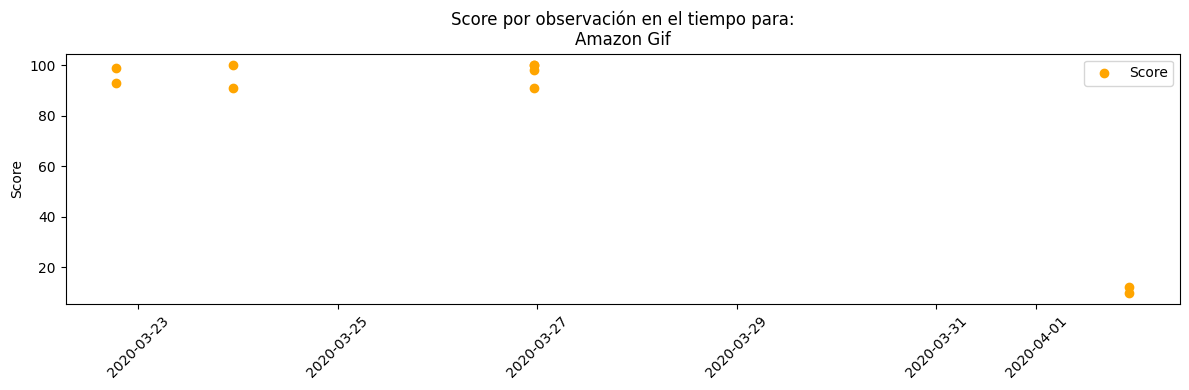

fecha  fraude  score  Unnamed: 0  a    b       c     d  \
48598  2020-03-22 18:41:03       1   99.0       48598  2  NaN     NaN   1.0   
33256  2020-03-22 18:41:05       1   93.0       33256  2  NaN     NaN   1.0   
67658  2020-03-23 22:49:21       1   91.0       67658  2  NaN     NaN   1.0   
145651 2020-03-23 22:49:23       1  100.0      145651  2  NaN     NaN   1.0   
89536  2020-03-26 23:06:06       1   91.0       89536  2  NaN     NaN   1.0   
97057  2020-03-26 23:06:10       1   98.0       97057  2  NaN     NaN   1.0   
90996  2020-03-26 23:06:11       1  100.0       90996  2  NaN     NaN   1.0   
135957 2020-03-26 23:06:13       1  100.0      135957  2  NaN     NaN   1.0   
82264  2020-04-01 22:22:57       1   10.0       82264  2  1.0  881.68  14.0   
55071  2020-04-01 22:27:44       1   12.0       55071  2  1.0  913.04  14.0   

          e    f  ...         k      l      m  n    o  p     q       r  s  \
48598   0.0  0.0  ...  0.606759    0.0    0.0  0    N  N  0.00  260445  0   
33256   0.0  0.0  ...  0.278670    0.0    0.0  0  NaN  N  0.00  260445  0   
67658   0.0  0.0  ...  0.848420    0.0    0.0  0    N  N  0.00  260445  0   
145651  0.0  0.0  ...  0.602787    0.0    0.0  0    N  N  0.00  260445  0   
89536   0.0  0.0  ...  0.814316    0.0    0.0  0  NaN  N  0.02  260445  0   
97057   0.0  0.0  ...  0.731309    0.0    0.0  0    N  N  0.00  260445  0   
90996   0.0  0.0  ...  0.731525    0.0    0.0  0    N  N  0.00  260445  0   
135957  0.0  0.0  ...  0.317061    0.0    0.0  0    N  N  0.02  260445  0   
82264   0.0  8.0  ...  0.680467  488.0  488.0  0    N  N  0.26     881  0   
55071   0.0  9.0  ...  0.238970  488.0  488.0  0    N  N  0.28     913  0   

         monto  
48598    31.80  
33256    31.80  
67658    31.80  
145651   31.80  
89536    31.58  
97057    31.58  
90996    31.58  
135957   31.58  
82264    31.36  
55071   125.45  

[10 rows x 24 columns]

In [ ]:
# Filtrar producto por nombre exacto (puedes ajustar con contains si necesario)
nombre_producto = "Amazon Gif"
df_producto = fraud_df[fraud_df['i'] == nombre_producto].copy()

# Asegurarse de ordenar por fecha
df_producto['fecha'] = pd.to_datetime(df_producto['fecha'])
df_producto = df_producto.sort_values('fecha')

# Graficar solo el score: cada punto es una observación
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.scatter(df_producto['fecha'], df_producto['score'], color='orange', label='Score', marker='o')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.title(f'Score por observación en el tiempo para:\n{nombre_producto}')
plt.legend()
plt.tight_layout()
plt.show()

# Mostrar score para cada entrada
display(df_producto[['fecha', 'fraude', 'score'] + [col for col in df_producto.columns if col not in ['fecha', 'fraude', 'score']]])


### EDA para preprocesamiento de datos

In [45]:
# Estadística descriptiva de la columna 'c' para las filas con fraude
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(fraud_df['c'].describe())

count      228,526.00
mean       257,801.06
std        840,623.50
min              0.16
25%          9,714.78
50%         43,578.31
75%        144,911.60
max     13,878,743.71
Name: c, dtype: float64

In [46]:
# Estadística descriptiva de la columna 'c' para las filas con fraude
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(fraud_df['b'].describe())

count   228,526.00
mean          0.73
std           0.13
min           0.00
25%           0.68
50%           0.76
75%           0.81
max           1.00
Name: b, dtype: float64

In [100]:
display(fraud_df[['b', 'c', 'r']])

b          c       r
0       0.7685   94436.24   94436
1       0.7550    9258.50    9258
2       0.7455  242549.09  242549
3       0.7631   18923.90   18923
4       0.7315    5728.68    5728
...        ...        ...     ...
249995  0.7367   25802.22   25802
249996  0.6928  607309.49  607309
249997  0.7811   42864.96   42864
249998  0.7944   23536.05   23536
249999  0.2813     649.29     649

[250000 rows x 3 columns]

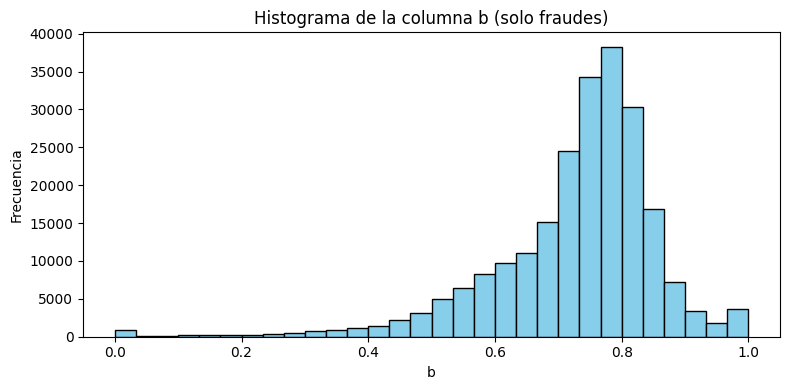

In [101]:
plt.figure(figsize=(8, 4))
plt.hist(fraud_df['b'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('b')
plt.ylabel('Frecuencia')
plt.title('Histograma de la columna b (solo fraudes)')
plt.tight_layout()
plt.show()


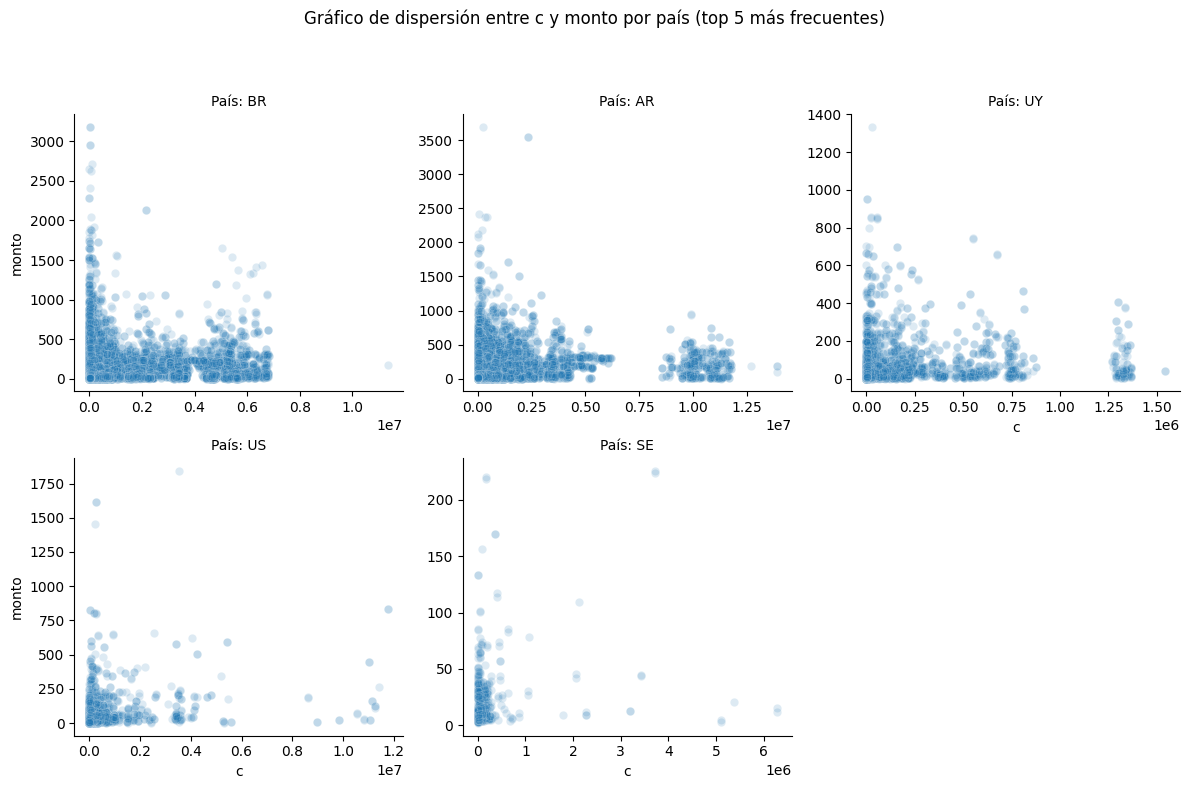

In [108]:
# Gráfico de dispersión entre 'c' y 'monto' con facetas por país (g) solo para los países más frecuentes

import seaborn as sns

top5_g = fraud_df['g'].value_counts().head(5).index
fraud_df_top5 = fraud_df[fraud_df['g'].isin(top5_g)]

g = sns.FacetGrid(fraud_df_top5, col="g", col_wrap=3, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x="c", y="monto", alpha=0.15)
g.set_axis_labels("c", "monto")
g.set_titles("País: {col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Gráfico de dispersión entre c y monto por país (top 5 más frecuentes)')
plt.show()


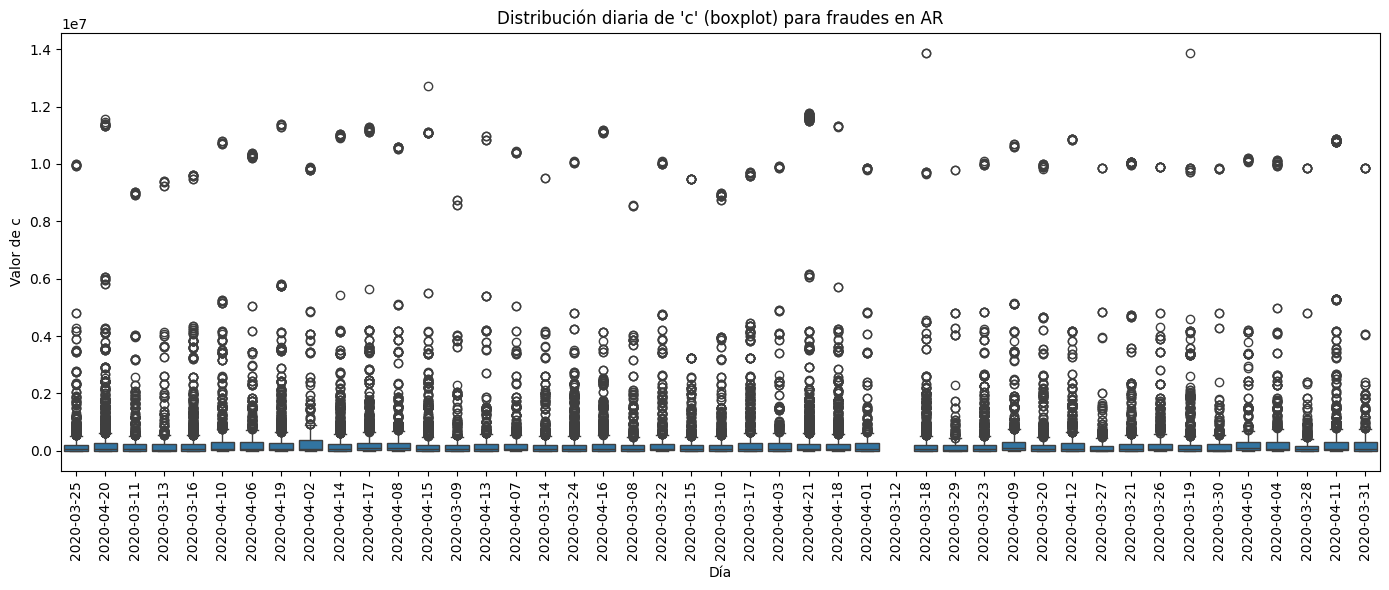

In [111]:
# Distribución de 'g' (país) por mes, solo para 'g' == 'AR'

# Distribución de la columna 'c' por día (boxplot) para fraudes en AR
ar_df = fraud_df[fraud_df['g'] == 'AR'].copy()

# Extraer día del campo fecha
ar_df['dia'] = pd.to_datetime(ar_df['fecha']).dt.date  # formato YYYY-MM-DD

plt.figure(figsize=(14,6))
sns.boxplot(data=ar_df, x='dia', y='c')
plt.xticks(rotation=90)
plt.xlabel('Día')
plt.ylabel('Valor de c')
plt.title("Distribución diaria de 'c' (boxplot) para fraudes en AR")
plt.tight_layout()
plt.show()


g
AR    6191
BR    5961
UY    1792
US    1676
SE     319
MX     200
RU      66
ES      66
CO      57
GB      39
FR      15
IT      14
PT      12
CL       9
DE       8
PE       4
PY       4
EC       4
CH       3
AU       3
BE       3
PA       3
NZ       2
CA       2
BO       2
CR       2
CN       2
AE       2
LB       2
PR       2
UA       2
NL       2
DO       1
BS       1
AD       1
EG       1
IN       1
NI       1
KR       1
GH       1
GR       1
HN       1
IL       1
GE       1
FI       1
JP       1
NO       1
PH       1
TR       1
TW       1
ZA       1
Name: b, dtype: int64

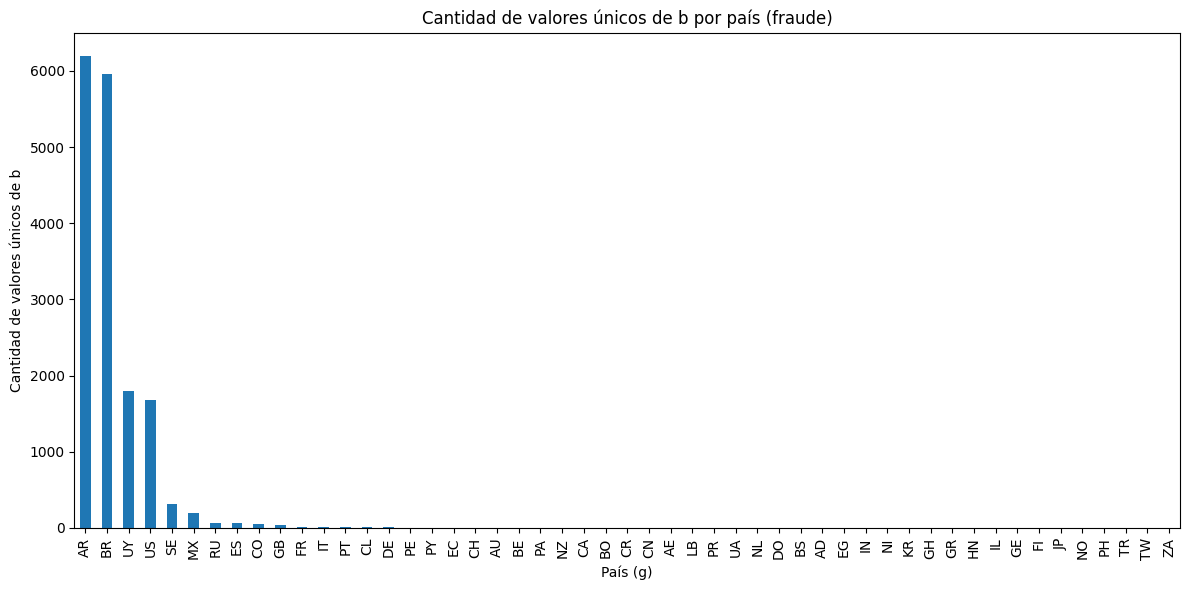

In [118]:
# Cantidad de valores únicos de 'b' por país ('g') para las filas de fraude

unique_b_by_g = fraud_df.groupby('g')['b'].nunique().sort_values(ascending=False)
display(unique_b_by_g)

plt.figure(figsize=(12,6))
unique_b_by_g.plot(kind='bar')
plt.xlabel('País (g)')
plt.ylabel('Cantidad de valores únicos de b')
plt.title('Cantidad de valores únicos de b por país (fraude)')
plt.tight_layout()
plt.show()


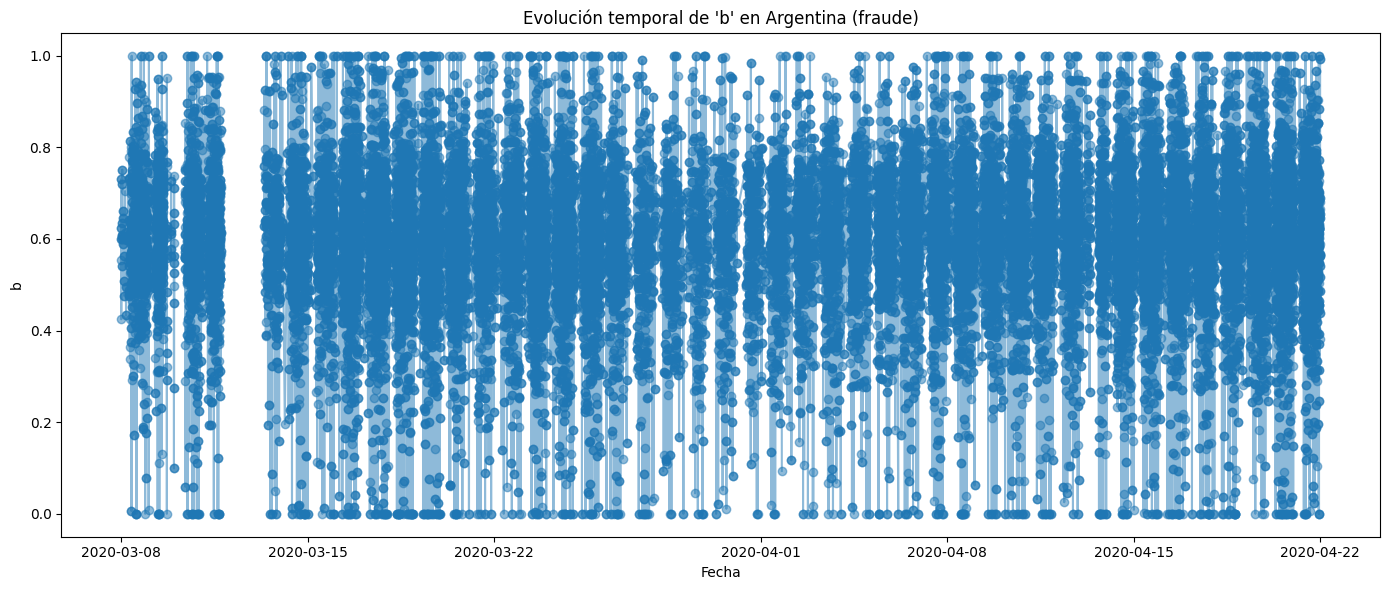

In [119]:
# Graficar el valor de 'b' a lo largo del tiempo para Argentina en un linechart

# Filtrar solo filas de fraude de Argentina
ar_df = fraud_df[fraud_df['g'] == 'AR'].copy()

# Asegurar que la columna fecha es datetime
ar_df['fecha'] = pd.to_datetime(ar_df['fecha'])

# Ordenar por fecha
ar_df = ar_df.sort_values('fecha')

plt.figure(figsize=(14,6))
plt.plot(ar_df['fecha'], ar_df['b'], marker='o', linestyle='-', alpha=0.5)
plt.xlabel('Fecha')
plt.ylabel('b')
plt.title("Evolución temporal de 'b' en Argentina (fraude)")
plt.tight_layout()
plt.show()


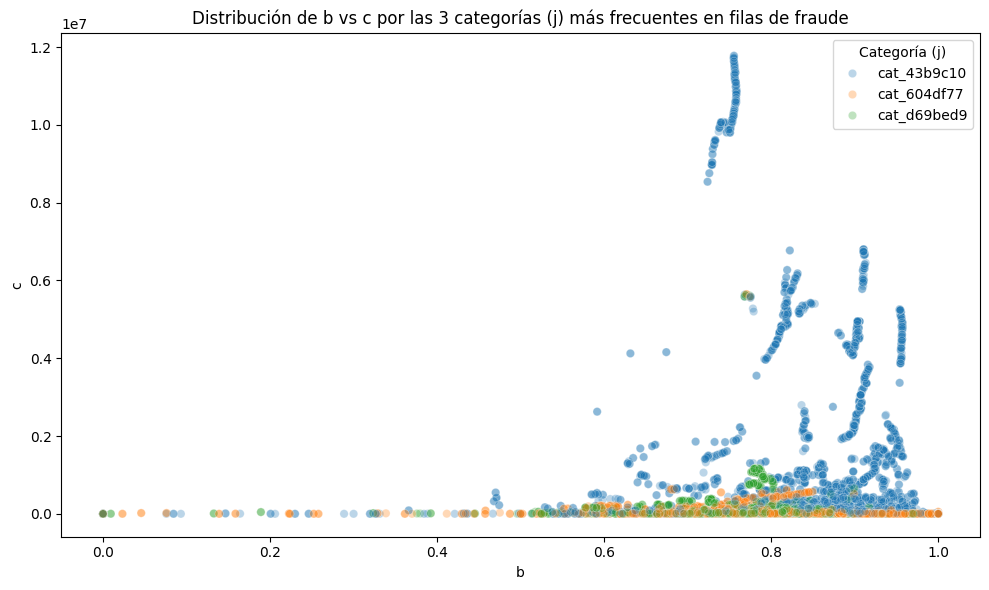

In [ ]:
# Distribución de b y c por las 3 categorías (j) más frecuentes, usando scatter plot

# Encontrar las 3 categorías (j) más frecuentes en las filas de fraude
top3_j = fraud_df['j'].value_counts().head(3).index

# Filtrar las filas correspondientes a estas categorías
fraud_df_top3j = fraud_df[fraud_df['j'].isin(top3_j)]

plt.figure(figsize=(10,6))
# Graficar un scatterplot de b vs c, coloreando por j con mayor transparencia (alpha más bajo)
sns.scatterplot(data=fraud_df_top3j, x='b', y='c', hue='j', alpha=0.3)
plt.xlabel('b')
plt.ylabel('c')
plt.title("Distribución de b vs c por las 3 categorías (j) más frecuentes en filas de fraude")
plt.legend(title='Categoría (j)')
plt.tight_layout()
plt.show()


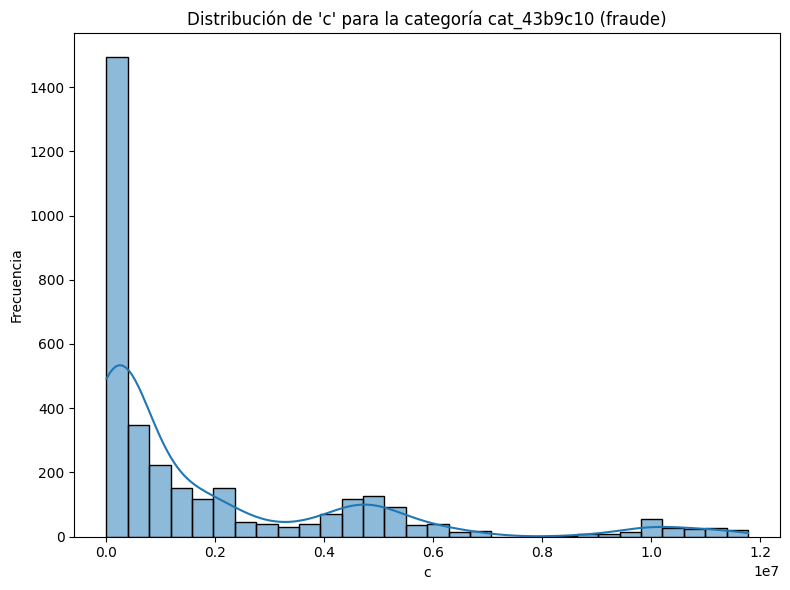

In [126]:
# Graficar distribución de 'c' para la categoría cat_43b9c10 en las filas de fraude

cat = 'cat_43b9c10'
cat_df = fraud_df[fraud_df['j'] == cat]

plt.figure(figsize=(8,6))
sns.histplot(cat_df['c'].dropna(), bins=30, kde=True)
plt.xlabel('c')
plt.ylabel('Frecuencia')
plt.title("Distribución de 'c' para la categoría cat_43b9c10 (fraude)")
plt.tight_layout()
plt.show()


In [129]:
# Mostrar ejemplos de cat_43b9c10 en las filas de fraude

# Seleccionar filas de fraude para la categoría 'cat_43b9c10'
# Revisar los que tengan c mayores a 0.8e7 (8,000,000)
ejemplos_cat_43b9c10_altos = fraud_df[(fraud_df['j'] == 'cat_43b9c10') & (fraud_df['c'] > 0.8e7)]

# Mostrar las filas encontradas (si existen)
# Mostrar los valores únicos de la columna 'i' en la muestra de ejemplos altos
display(ejemplos_cat_43b9c10_altos['i'].unique())


array(['Celular Motorola Moto E6 Plus Special Edition 64gb 4gb 12c',
       'Celular Motorola Moto E6 Plus 32gb 2gb Garantía Oficial Rt',
       'Motorola Moto E E6 Plus 32 Gb Bright Cherry 2 Gb Ram',
       'Motorola Moto E E6 Plus Special Edition 64 Gb Rich Cranberry 4 Gb Ram',
       'Celular Motorola Moto E5 Play 4g 16gb Xt-1920 Gtia Oficial',
       'Celular Motorola Moto One Macro 4g 64gb 4gb Gtia Oficial 12c',
       'Celular Motorola Moto G8 Power 64gb 4gb Xt-2041 Oficial 12c',
       'Motorola One Macro Dual Sim 64 Gb Space Blue 4 Gb Ram',
       'Celular Motorola Moto G8 Play 4g 32gb 2gb Garantía Oficial',
       'Celular Motorola Moto G8 64gb 4gb Xt-2045 Garantia Oficial 6',
       'Motorola Moto G G8 Play 32 Gb Royal Magenta 2 Gb Ram',
       'Motorola E6 Play 32 Gb Steel Black 2 Gb Ram',
       'Motorola Moto E E6 Play 32 Gb Steel Black 2 Gb Ram',
       'Celular Motorola Moto E6 Play 4g 32gb 2gb Gtia Oficial 12cts',
       'Motorola One Action 128 Gb Denim Blue 4 Gb Ram',

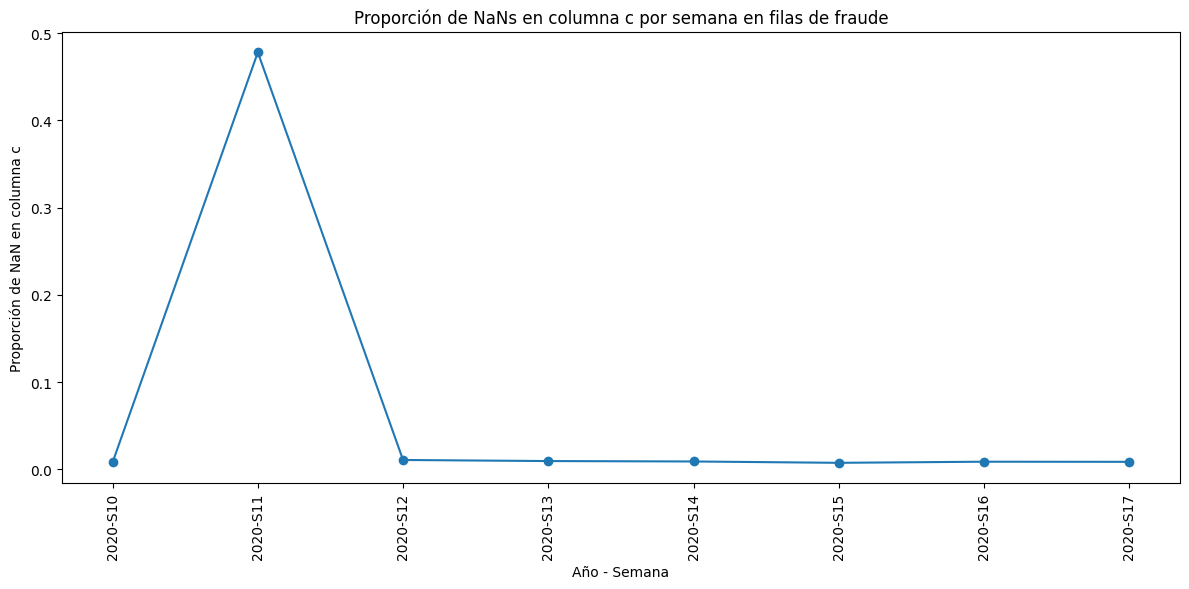

In [133]:
# Graficar por país (g) la proporción de NaNs en la columna 'c' para filas de fraude

# Calcular proporción de NaNs en 'c' por cada una de las 10 categorías (j) más frecuentes en fraude
# Proporción de NaNs de c por semana (para filas de fraude)

# Convertir 'fecha' a datetime si no lo está aún
fraud_df['fecha'] = pd.to_datetime(fraud_df['fecha'])

# Crear columna de semana (año-semana) para agrupar
fraud_df['semana'] = fraud_df['fecha'].dt.isocalendar().week
fraud_df['año'] = fraud_df['fecha'].dt.isocalendar().year

# Calcular proporción de NaNs en 'c' por semana (por año y semana para evitar colisión de semanas de diferentes años)
proporcion_nas_por_semana = (
    fraud_df
    .groupby(['año', 'semana'])['c']
    .apply(lambda x: x.isna().mean())
    .reset_index()
    .sort_values(['año', 'semana'])
)

plt.figure(figsize=(12,6))
plt.plot(
    proporcion_nas_por_semana['año'].astype(str) + '-S' + proporcion_nas_por_semana['semana'].astype(str),
    proporcion_nas_por_semana['c'],
    marker='o'
)
plt.xticks(rotation=90)
plt.xlabel('Año - Semana')
plt.ylabel('Proporción de NaN en columna c')
plt.title('Proporción de NaNs en columna c por semana en filas de fraude')
plt.tight_layout()
plt.show()

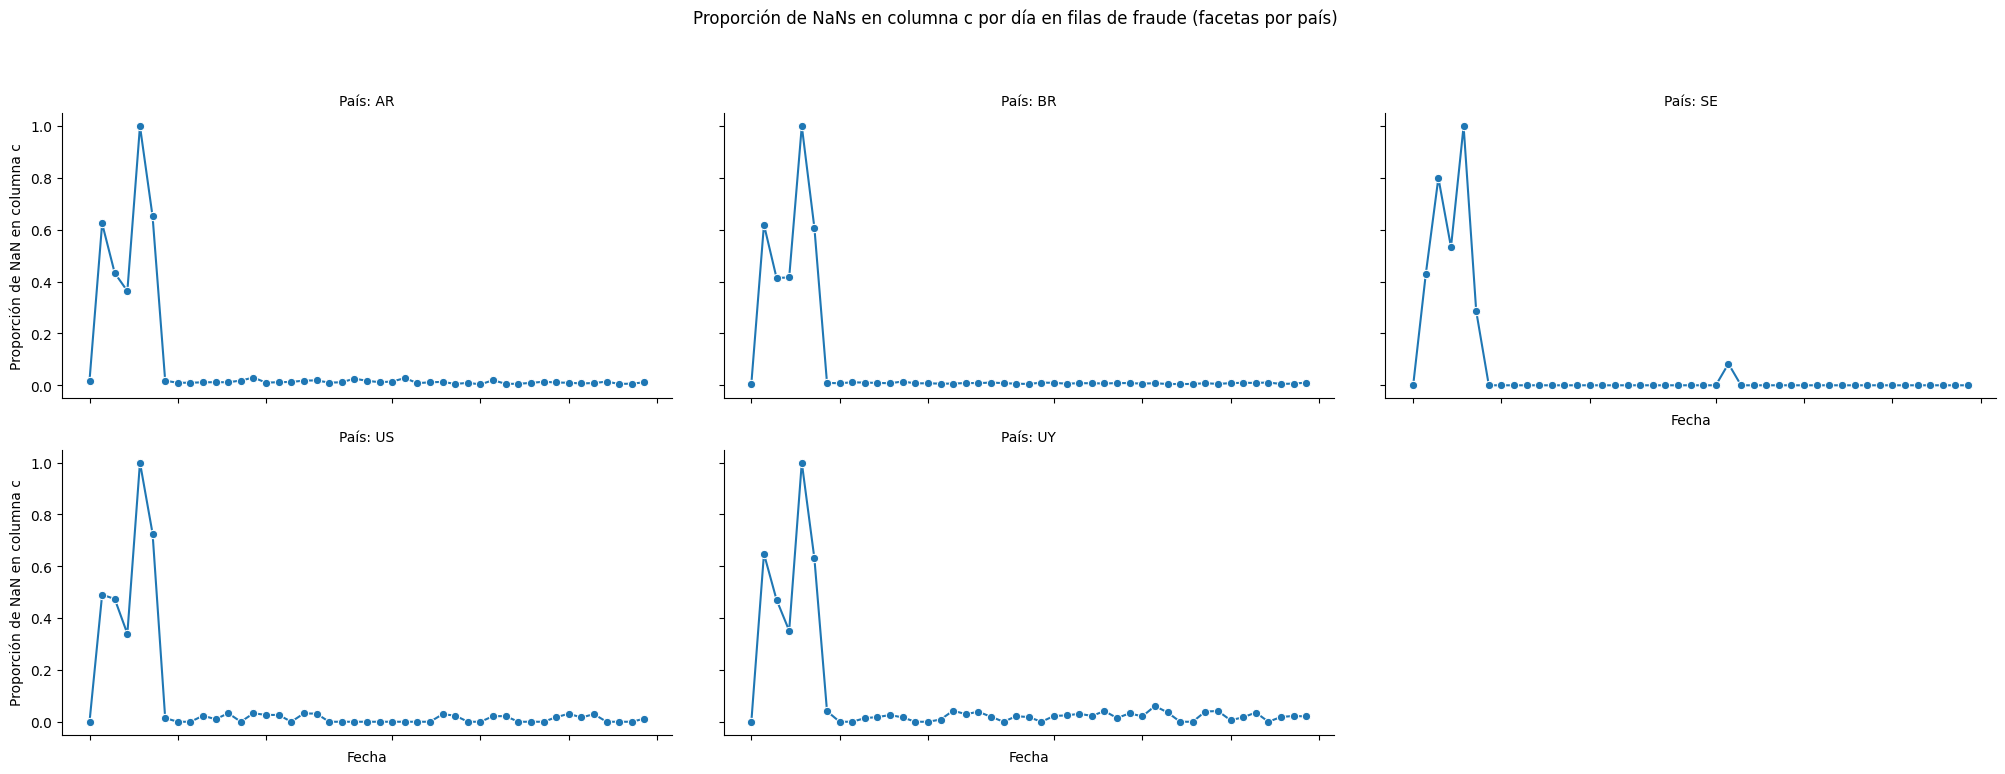

In [136]:
# Calcular proporción de NaNs en 'c' por día y por país (g), graficando una faceta por país (g)
import seaborn as sns

# Seleccionar los 5 países más frecuentes para que la visualización sea legible
top_g = fraud_df['g'].value_counts().head(5).index
fraud_df_topg = fraud_df[fraud_df['g'].isin(top_g)].copy()

# Agregar columna de fecha (sin hora)
fraud_df_topg['fecha_dia'] = fraud_df_topg['fecha'].dt.date

# Calcular proporción de NaNs en 'c' por día y país
prop_na_por_dia_pais = (
    fraud_df_topg
    .groupby(['g', 'fecha_dia'])['c']
    .apply(lambda x: x.isna().mean())
    .reset_index()
    .rename(columns={'c': 'proporcion_nan'})
    .sort_values(['g', 'fecha_dia'])
)

# Graficar facetas por país (g)
g = sns.FacetGrid(
    prop_na_por_dia_pais,
    col="g", col_wrap=3,
    height=4, aspect=1.7,
    sharey=True
)
g.map_dataframe(
    sns.lineplot,
    x="fecha_dia", y="proporcion_nan", marker="o"
)

g.set_xticklabels(rotation=90)
g.set_axis_labels("Fecha", "Proporción de NaN en columna c")
g.set_titles("País: {col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Proporción de NaNs en columna c por día en filas de fraude (facetas por país)')
plt.show()


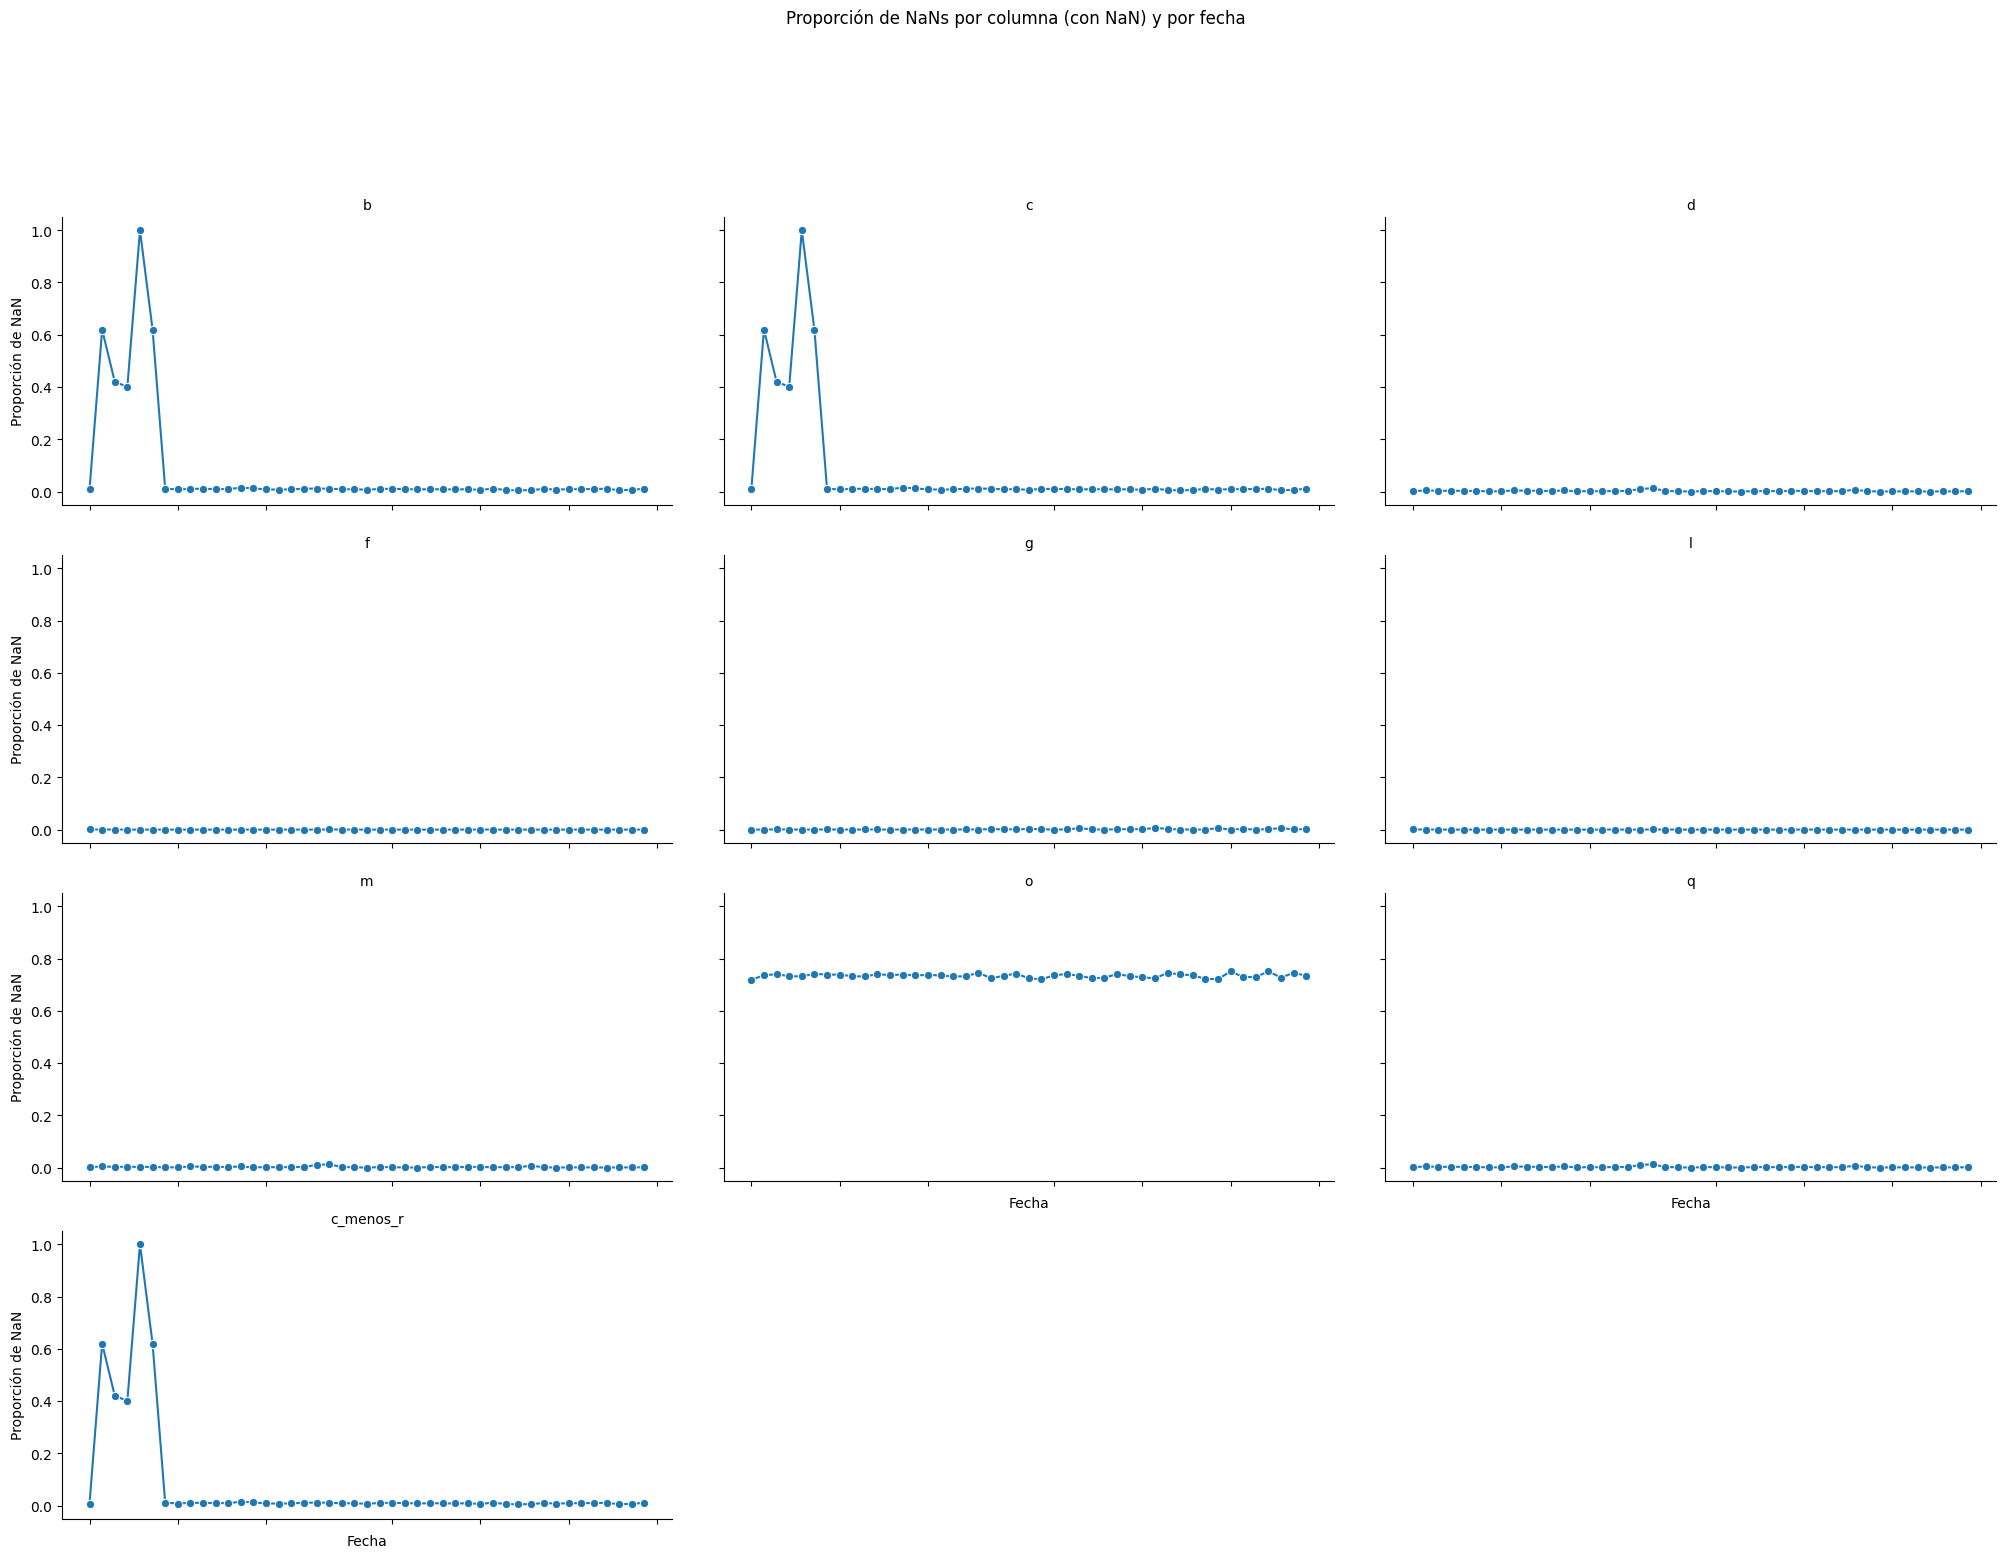

In [138]:
# Graficar la proporción de NaNs por columnas (que tengan NaN) por fecha

# 1. Identificar las columnas con al menos un NaN en fraud_df
cols_con_nan = fraud_df.columns[fraud_df.isna().any()].tolist()

# 2. Si fecha es datetime, quitar hora para agrupar x día
fraud_df['fecha_dia'] = fraud_df['fecha'].dt.date

# 3. Para cada columna con NaN, calcular la proporción de NaNs por día
proporciones_por_col_dia = []
for col in cols_con_nan:
    temp = (
        fraud_df
        .groupby('fecha_dia')[col]
        .apply(lambda x: x.isna().mean())
        .reset_index()
        .rename(columns={col: 'proporcion_nan'})
    )
    temp['columna'] = col
    proporciones_por_col_dia.append(temp)

# Unir todos los resultados en un solo DataFrame
proporciones_df = pd.concat(proporciones_por_col_dia, ignore_index=True)

# 4. Graficar (facetas por columna)
import seaborn as sns
g = sns.FacetGrid(
    proporciones_df,
    col="columna", col_wrap=3, height=4, aspect=1.7, sharey=True
)
g.map_dataframe(
    sns.lineplot,
    x="fecha_dia", y="proporcion_nan", marker="o"
)
g.set_xticklabels(rotation=90)
g.set_axis_labels("Fecha", "Proporción de NaN")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Proporción de NaNs por columna (con NaN) y por fecha')
plt.show()


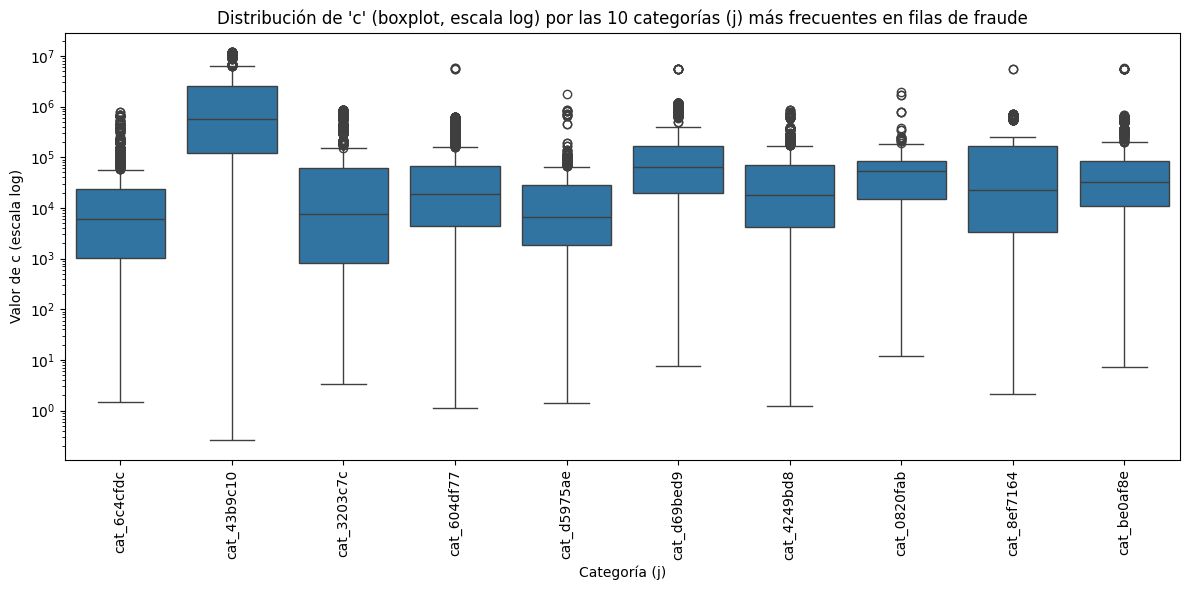

In [115]:
# Mostrar solo las 10 categorías (j) más frecuentes
top10_j = fraud_df['j'].value_counts().head(10).index
fraud_df_top10j = fraud_df[fraud_df['j'].isin(top10_j)]

plt.figure(figsize=(12,6))
sns.boxplot(data=fraud_df_top10j, x='j', y='c')
plt.yscale('log')
plt.xlabel('Categoría (j)')
plt.ylabel('Valor de c (escala log)')
plt.title("Distribución de 'c' (boxplot, escala log) por las 10 categorías (j) más frecuentes en filas de fraude")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


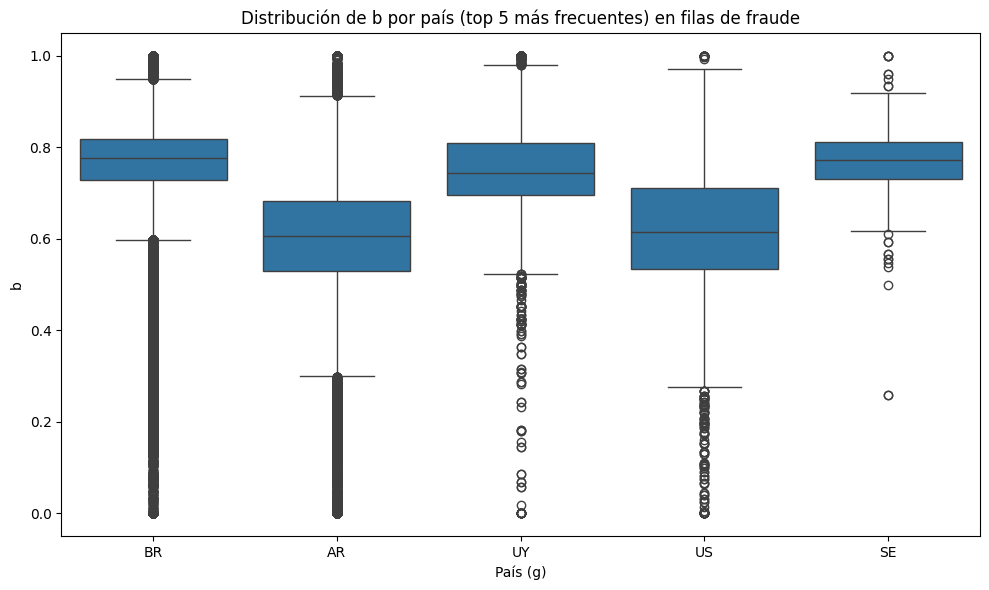

g
BR    185579
AR     53634
UY      5044
US      3794
SE       608
Name: count, dtype: int64

In [103]:
# Distribución de 'b' por país (columna 'g') en las filas de fraude

# Seleccionar solo los 5 países ('g') más frecuentes en las filas de fraude
top5_g = fraud_df['g'].value_counts().head(5).index
fraud_df_top5 = fraud_df[fraud_df['g'].isin(top5_g)]

plt.figure(figsize=(10, 6))
# Usar boxplot para ver la distribución de 'b' para los 5 países más frecuentes
sns.boxplot(data=fraud_df_top5, x='g', y='b')
plt.xlabel('País (g)')
plt.ylabel('b')
plt.title('Distribución de b por país (top 5 más frecuentes) en filas de fraude')
plt.tight_layout()
plt.show()

# Si quieres ver la cantidad de registros por país también (solo top 5):
display(fraud_df['g'].value_counts().head(5))


b y c son exclusivas. Si existe un NA es en ambos o ninguno

In [49]:
# Mostrar filas donde 'c' o 'b' son NaN en fraud_df
display(fraud_df.loc[(fraud_df['c'].isna() ^ fraud_df['b'].isna()), ['c', 'b']])

Empty DataFrame
Columns: [c, b]
Index: []

Kolmogorov–Smirnov test resultados (NA vs No NA):

Unnamed: 0 -> KS statistic: 0.006, p-value: 0.543 (n_NA=21474, n_noNA=228526)
a -> KS statistic: 0.054, p-value: 1.09e-50 (n_NA=21474, n_noNA=228526)
d -> KS statistic: 0.030, p-value: 4.14e-16 (n_NA=21398, n_noNA=228008)
e -> KS statistic: 0.065, p-value: 4.89e-73 (n_NA=21474, n_noNA=228526)
f -> KS statistic: 0.032, p-value: 4.6e-18 (n_NA=21466, n_noNA=228519)
h -> KS statistic: 0.021, p-value: 7.85e-08 (n_NA=21474, n_noNA=228526)
k -> KS statistic: 0.008, p-value: 0.176 (n_NA=21474, n_noNA=228526)
l -> KS statistic: 0.014, p-value: 0.00154 (n_NA=21466, n_noNA=228519)
m -> KS statistic: 0.007, p-value: 0.257 (n_NA=21398, n_noNA=228008)
n -> KS statistic: 0.007, p-value: 0.346 (n_NA=21474, n_noNA=228526)
q -> KS statistic: 0.031, p-value: 1.83e-16 (n_NA=21398, n_noNA=228008)
r -> KS statistic: 0.847, p-value: 0 (n_NA=21474, n_noNA=228526)
s -> KS statistic: 0.005, p-value: 0.723 (n_NA=21474, n_noNA=228526)
monto -> KS statistic: 0.078

variable  KS_statistic        p_value
11           r      0.846735   0.000000e+00
13       monto      0.078145  1.053086e-104
14       score      0.074581   2.126119e-95
3            e      0.065221   4.893630e-73
1            a      0.054269   1.094407e-50
4            f      0.032157   4.600137e-18
10           q      0.030711   1.831570e-16
2            d      0.030370   4.144717e-16
5            h      0.020833   7.847780e-08
7            l      0.013508   1.538132e-03
15      fraude      0.009405   6.170146e-02
6            k      0.007858   1.761131e-01
8            m      0.007229   2.570217e-01
9            n      0.006664   3.463936e-01
0   Unnamed: 0      0.005705   5.433665e-01
12           s      0.004938   7.228426e-01

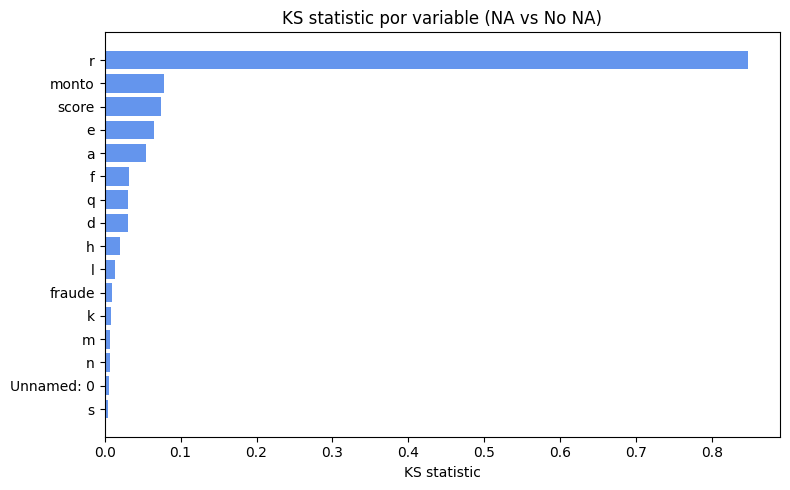

In [90]:
from scipy.stats import ks_2samp

# Compara la distribución de una variable para (c y b ambos NA) vs (c y b ambos no NA)
variables = [col for col in fraud_df.columns if col not in ['b', 'c']]

# Filas donde c y b son NA
cb_na = fraud_df[fraud_df['c'].isna() & fraud_df['b'].isna()]
# Filas donde c y b NO son NA
cb_notna = fraud_df[fraud_df['c'].notna() & fraud_df['b'].notna()]

print('Kolmogorov–Smirnov test resultados (NA vs No NA):\n')
ks_results = []
for var in variables:
    # Usar solo columnas numéricas para el test
    if pd.api.types.is_numeric_dtype(fraud_df[var]):
        x = cb_na[var].dropna()
        y = cb_notna[var].dropna()
        # Realizar el test sólo si ambas muestras tienen al menos 10 elementos
        if len(x) > 10 and len(y) > 10:
            ks_stat, ks_p = ks_2samp(x, y)
            ks_results.append((var, ks_stat, ks_p))
            print(f'{var} -> KS statistic: {ks_stat:.3f}, p-value: {ks_p:.3g} (n_NA={len(x)}, n_noNA={len(y)})')

# Para visualizar los resultados ordenados por estadístico KS (más diferentes arriba)
if ks_results:
    ks_df = pd.DataFrame(ks_results, columns=['variable', 'KS_statistic', 'p_value'])
    display(ks_df.sort_values('KS_statistic', ascending=False))

# Gráfico de dispersión entre 'b' y 'c' en las filas donde ambos no sean NaN (fraud_df)
# Graficar el KS_statistic de mayor a menor usando un bar chart
if ks_results:
    ks_df_sorted = ks_df.sort_values('KS_statistic', ascending=False)
    plt.figure(figsize=(8, 5))
    plt.barh(ks_df_sorted['variable'], ks_df_sorted['KS_statistic'], color='cornflowerblue')
    plt.xlabel('KS statistic')
    plt.title('KS statistic por variable (NA vs No NA)')
    plt.gca().invert_yaxis()  # Para que el mayor KS quede arriba
    plt.tight_layout()
    plt.show()


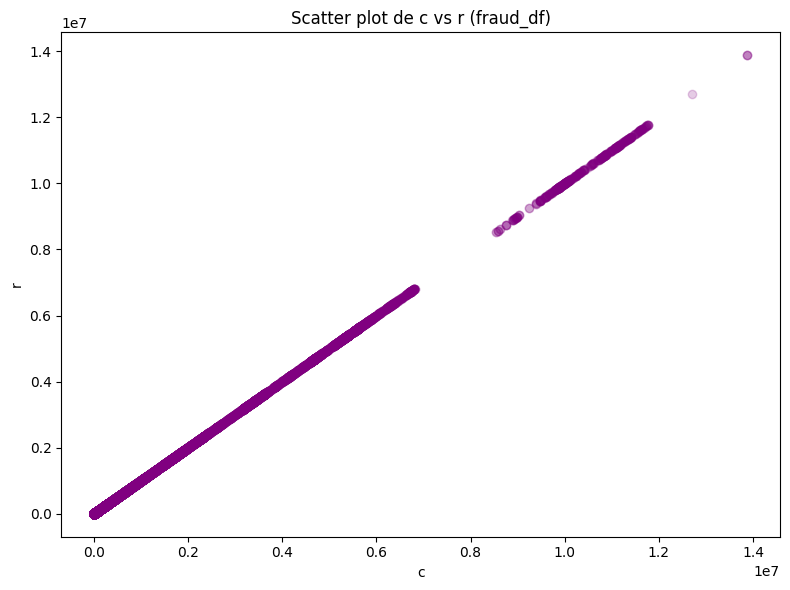

In [92]:
# Gráfico de dispersión entre 'c' y 'r' en las filas donde ambos no sean NaN
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(fraud_df['c'], fraud_df['r'], alpha=0.2, color='purple')
plt.xlabel('c')
plt.ylabel('r')
plt.title('Scatter plot de c vs r (fraud_df)')
plt.tight_layout()
plt.show()


Estadísticas descriptivas de 'r' cuando 'c' es NaN:


count     21474.0
mean     260445.0
std           0.0
min      260445.0
25%      260445.0
50%      260445.0
75%      260445.0
max      260445.0
Name: r, dtype: float64

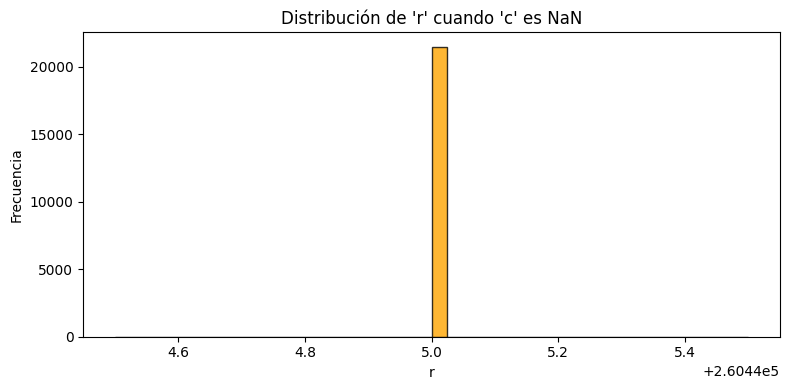

In [94]:
# Distribución de 'r' cuando 'c' es NaN

# Filtrar las filas donde 'c' es NaN
r_when_c_na = fraud_df[fraud_df['c'].isna()]['r']

# Mostrar estadísticas descriptivas básicas
print("Estadísticas descriptivas de 'r' cuando 'c' es NaN:")
display(r_when_c_na.describe())

# Histograma de la distribución de 'r' cuando 'c' es NaN
plt.figure(figsize=(8, 4))
plt.hist(r_when_c_na.dropna(), bins=40, color='orange', edgecolor='black', alpha=0.8)
plt.xlabel('r')
plt.ylabel('Frecuencia')
plt.title("Distribución de 'r' cuando 'c' es NaN")
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()


In [96]:
# Mostrar las columnas 'c' y 'r' del dataframe fraud_df
display(fraud_df[['c', 'r']])


c       r
0        94436.24   94436
1         9258.50    9258
2       242549.09  242549
3        18923.90   18923
4         5728.68    5728
...           ...     ...
249995   25802.22   25802
249996  607309.49  607309
249997   42864.96   42864
249998   23536.05   23536
249999     649.29     649

[250000 rows x 2 columns]

In [99]:
# Calcular y mostrar el promedio de 'c' ignorando los NaN
promedio_c = fraud_df['c'].mean(skipna=True)
print(f"Promedio de 'c' (ignorando NaN): {promedio_c}")

Promedio de 'c' (ignorando NaN): 257801.06092392112


Correlación (spearman) entre b, c y r:



b         c         r
b  1.000000  0.081494  0.081493
c  0.081494  1.000000  1.000000
r  0.081493  1.000000  1.000000



Correlación (pearson) entre b, c y r:



b         c         r
b  1.000000  0.083938  0.083938
c  0.083938  1.000000  1.000000
r  0.083938  1.000000  1.000000

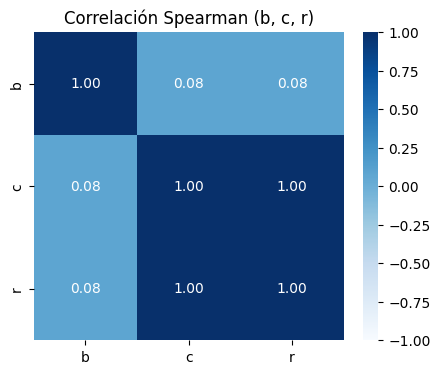

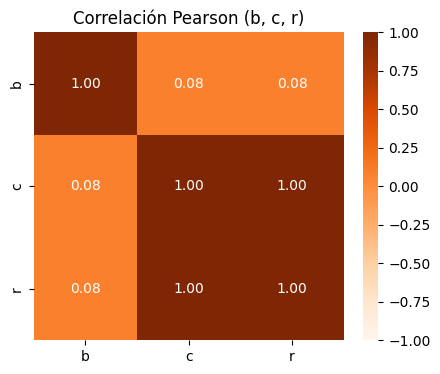

In [91]:
# Calcular y mostrar la correlación de Spearman y Pearson entre b, c y r
corr_methods = ['spearman', 'pearson']
cols_corr = ['b', 'c', 'r']

corr_results = {}
for method in corr_methods:
    # Drop rows con NaN en cualquiera de b, c o r
    df_corr = fraud_df[cols_corr].dropna()
    corr_matrix = df_corr.corr(method=method)
    corr_results[method] = corr_matrix
    print(f"Correlación ({method}) entre b, c y r:\n")
    display(corr_matrix)
    print('\n')

# También visualizar con un heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
sns.heatmap(corr_results['spearman'], annot=True, cmap='Blues', vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlación Spearman (b, c, r)")
plt.show()

plt.figure(figsize=(5,4))
sns.heatmap(corr_results['pearson'], annot=True, cmap='Oranges', vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlación Pearson (b, c, r)")
plt.show()


Unnamed: 0  a       b          c     d         e      f   g   h  \
205744       55744  5  0.6269     296.51   1.0  0.028571  203.0  BR   3   
180138       30138  5  0.8921     468.20  51.0  0.479310    0.0  BR   4   
11196        11196  4  0.4720    4192.76   5.0  0.170223  170.0  AR  44   
58815        58815  4  0.8581   17142.97  15.0  0.451777    1.0  BR   1   
238490       88490  4  0.7868   68856.92   4.0  0.025505    1.0  BR  12   
...            ... ..     ...        ...   ...       ...    ...  ..  ..   
148668      148668  4  0.8422  458377.68  50.0  0.062790   33.0  BR  54   
56850        56850  4  0.6277   13586.53  14.0  0.000000    3.0  AR   2   
95530        95530  4  0.8978  491023.05  50.0  0.000000    2.0  AR  45   
141407      141407  3  0.9095  112338.21  50.0  0.081352   42.0  BR   7   
28218        28218  4  0.9405     409.77  24.0  0.000000   17.0  BR   0   

                                                        i  ...  n    o  p  \
205744      Chave De Seta Buzina F4000 87 V3f612100 Carto  ...  1    Y  N   
180138  Promoçao Da Semana !!!capas De Almofadas Decor...  ...  1  NaN  Y   
11196                            Rellenos De Butacas S-10  ...  1  NaN  Y   
58815   Máscara De Proteção Não Descartável 2 Unidades...  ...  1  NaN  Y   
238490     Mini Estudio De Fotografia Completo Com Brinde  ...  1  NaN  N   
...                                                   ...  ... ..  ... ..   
148668  Refil Filtro P/ Purificador Água Consul Bem Es...  ...  1  NaN  Y   
56850        Pokémon Tcg - Booster Box - Sword And Shield  ...  1    N  N   
95530   Bicicleta Halley Playera Paseo Dama Lujo Rodad...  ...  1  NaN  Y   
141407    Bicicleta Ksw Aro29 Alumínio 21v Freios À Disco  ...  1    N  N   
28218   Máscara Descartável Azul C Válvula C 6und Cont...  ...  1  NaN  Y   

           q       r    s                fecha   monto   score  fraude  
205744  0.02     296    0  2020-03-25 15:15:50   29.65   34.78       0  
180138  0.98     468  100  2020-03-16 19:35:16    7.69   88.48       0  
11196   0.10    4192  100  2020-04-13 19:19:14   33.85    6.00       0  
58815   0.30   17142  100  2020-04-20 19:19:23    3.80   69.00       0  
238490  0.06   68856    0  2020-03-25 21:00:43   30.85   49.56       0  
...      ...     ...  ...                  ...     ...     ...     ...  
148668  0.98  458377  100  2020-03-30 15:00:17   21.87   34.00       0  
56850   0.26   13586    0  2020-04-07 10:13:01  198.39    4.00       0  
95530   1.00  491023  100  2020-04-18 12:27:54  168.81  100.00       0  
141407  0.98  112338    0  2020-03-08 10:17:50  177.61   59.00       0  
28218   0.48     409  100  2020-03-22 13:39:36   29.45   85.00       0  

[100 rows x 24 columns]

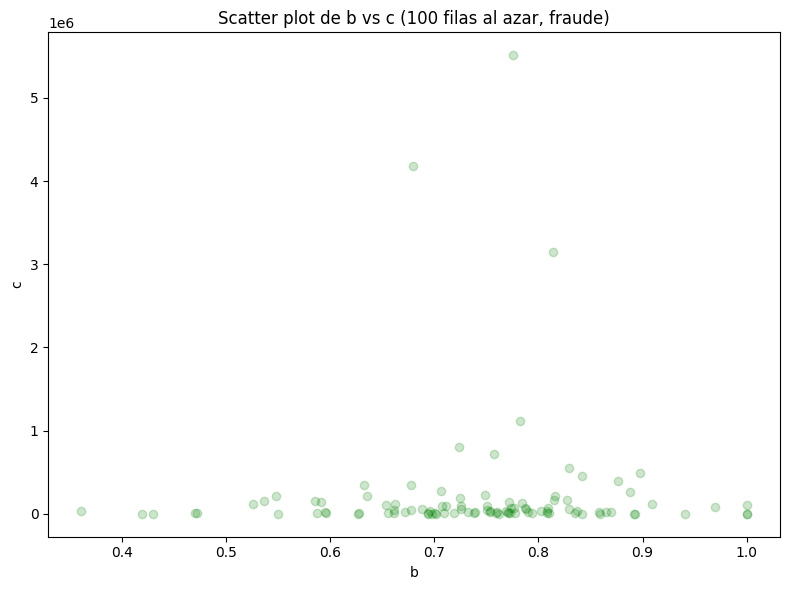

In [52]:
import random

# Seleccionar 100 filas al azar de fraud_df donde b y c no sean NaN
sample_df = fraud_df.dropna(subset=['b', 'c']).sample(n=100, random_state=42)

# Imprimir tabla de los que superan c = 3 dentro del sample seleccionado
display(sample_df[sample_df['c'] > 3])

plt.figure(figsize=(8,6))
plt.scatter(sample_df['b'], sample_df['c'], alpha=0.2, color='green')
plt.xlabel('b')
plt.ylabel('c')
plt.title('Scatter plot de b vs c (100 filas al azar, fraude)')
plt.tight_layout()
plt.show()

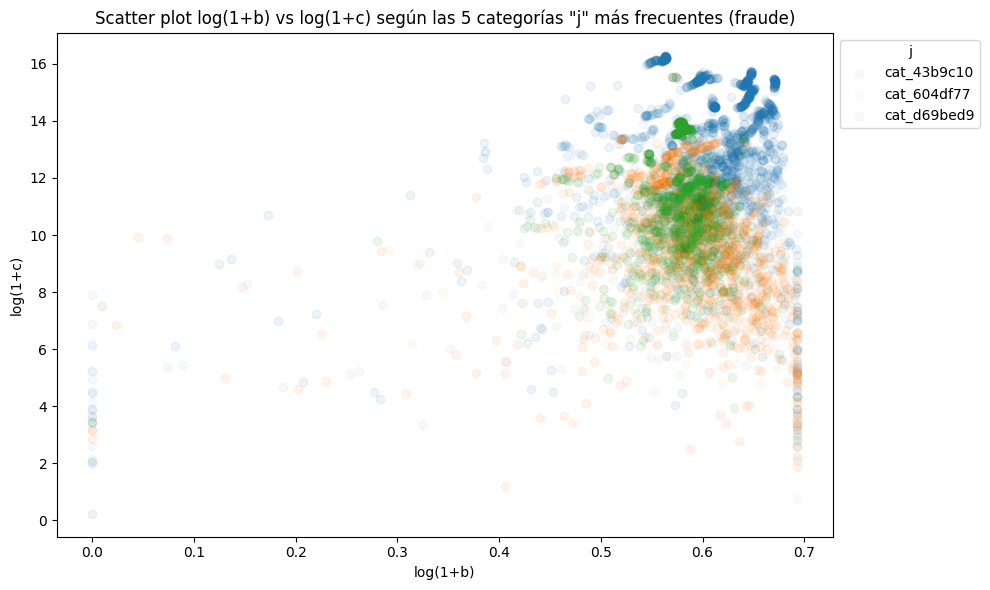

In [73]:
# Mostrar para las 5 categorías 'j' más frecuentes

# Filtrar filas donde 'b' y 'c' no sean NaN
df_bc_notna = fraud_df.dropna(subset=['b', 'c'])

# Seleccionar las 5 categorías más frecuentes en 'j'
categorias_mas_frecuentes = (
    df_bc_notna['j']
    .value_counts()
    .head(3)
    .index
    .tolist()
)

# Filtrar solo esas categorías
df_subset = df_bc_notna[df_bc_notna['j'].isin(categorias_mas_frecuentes)]

plt.figure(figsize=(10,6))
for cat in categorias_mas_frecuentes:
    df_cat = df_subset[df_subset['j'] == cat]
    plt.scatter(
        np.log1p(df_cat['b']), 
        np.log1p(df_cat['c']), 
        label=str(cat), 
        alpha=0.04
    )
plt.xlabel('log(1+b)')
plt.ylabel('log(1+c)')
plt.title('Scatter plot log(1+b) vs log(1+c) según las 5 categorías "j" más frecuentes (fraude)')
plt.legend(title='j', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

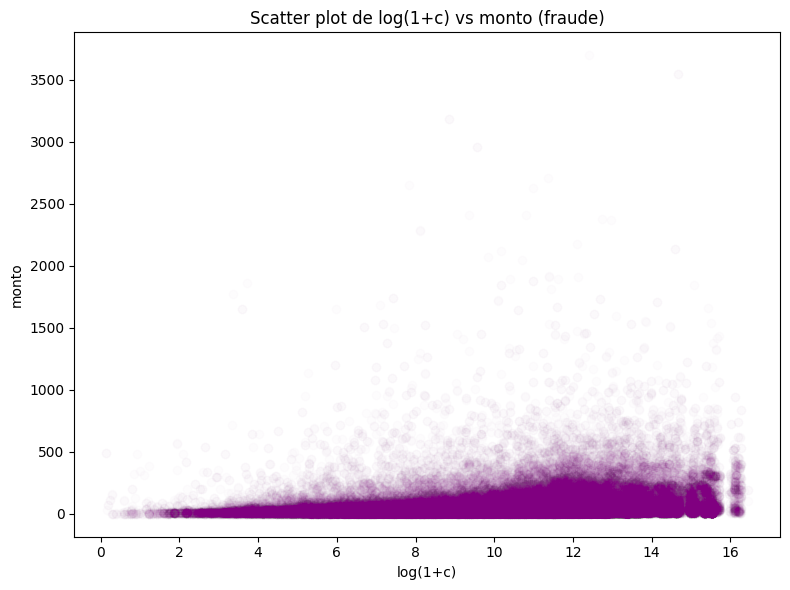

In [79]:
plt.figure(figsize=(8,6))
plt.scatter(
    np.log1p(fraud_df['c']), 
    fraud_df['monto'],
    alpha=0.01,
    color='purple'
)
plt.xlabel('log(1+c)')
plt.ylabel('monto')
plt.title('Scatter plot de log(1+c) vs monto (fraude)')
plt.tight_layout()
plt.show()


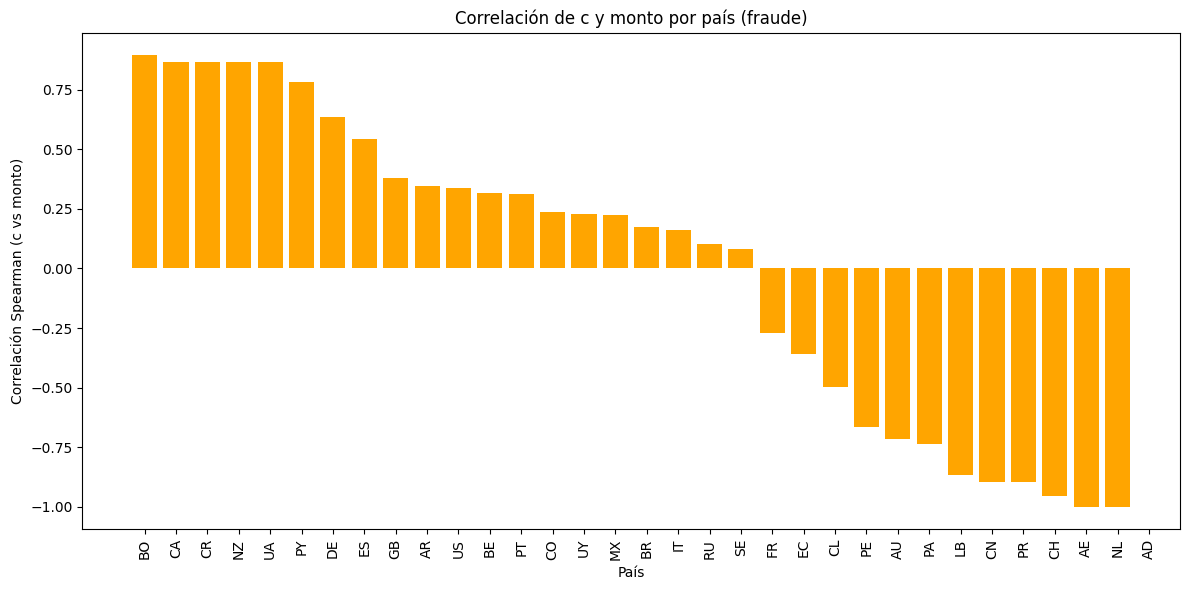

pais  correlacion_spearman_c_monto
0    BO                      0.894427
1    CA                      0.866025
2    CR                      0.866025
3    NZ                      0.866025
4    UA                      0.866025
5    PY                      0.780720
6    DE                      0.636171
7    ES                      0.543113
8    GB                      0.380246
9    AR                      0.344675
10   US                      0.337776
11   BE                      0.316228
12   PT                      0.310604
13   CO                      0.235785
14   UY                      0.229671
15   MX                      0.222359
16   BR                      0.173015
17   IT                      0.160725
18   RU                      0.103084
19   SE                      0.082875
20   FR                     -0.270135
21   EC                     -0.359092
22   CL                     -0.499455
23   PE                     -0.666886
24   AU                     -0.717137
25   PA                     -0.737865
26   LB                     -0.866025
27   CN                     -0.894427
28   PR                     -0.894427
29   CH                     -0.956183
30   AE                     -1.000000
31   NL                     -1.000000
32   AD                           NaN
33   BS                           NaN
34   GE                           NaN
35   GH                           NaN
36   GR                           NaN
37   HN                           NaN
38   JP                           NaN
39   NI                           NaN
40   NO                           NaN
41   PH                           NaN
42   TW                           NaN

In [82]:
# Correlación de c y monto por "i" (pais)

# Filtrar filas donde c y monto no sean NaN
df_cmonto_notna = fraud_df.dropna(subset=['c', 'monto', 'g'])

# Agrupar por país, calcular correlación para cada país
correlaciones = {}
for pais, grupo in df_cmonto_notna.groupby('g'):
    if len(grupo) > 1:
        corr = grupo[['c', 'monto']].corr(method='spearman').loc['c', 'monto']
        correlaciones[pais] = corr

correlaciones_df = (
    pd.DataFrame(list(correlaciones.items()), columns=['pais', 'correlacion_spearman_c_monto'])
    .sort_values(by='correlacion_spearman_c_monto', ascending=False)
    .reset_index(drop=True)
)

# Graficar la correlación
plt.figure(figsize=(12,6))
plt.bar(correlaciones_df['pais'], correlaciones_df['correlacion_spearman_c_monto'], color='orange')
plt.xlabel('País')
plt.ylabel('Correlación Spearman (c vs monto)')
plt.title('Correlación de c y monto por país (fraude)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

display(correlaciones_df)


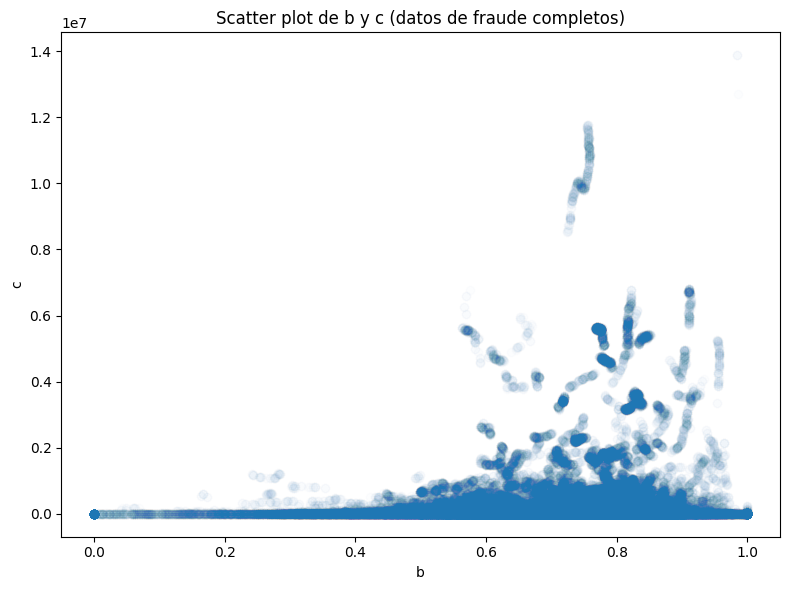

In [71]:
plt.figure(figsize=(8,6))
plt.scatter(
    fraud_df['b'], 
    fraud_df['c'], 
    alpha=0.01
)
plt.xlabel('b')
plt.ylabel('c')
plt.title('Scatter plot de b y c (datos de fraude completos)')
plt.tight_layout()
plt.show()

In [42]:
df[['b','c']].corr(method='spearman')

NameError: name 'df' is not defined

Imputamos columna C

In [155]:
# Vamos a imputar la columna 'c' usando un algoritmo de imputación.
# Como no conocemos la variable de 'c', utilizamos otras variables numéricas relacionadas.
# Usamos SimpleImputer con la estrategia 'median' como ejemplo práctico.
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

# Seleccionamos variables numéricas que podrían estar relacionadas, evitando 'c' y 'b' en features
variables_para_imputar = ['b', 'd', 'e', 'f', 'h', 'monto']  # agregar/quitar según el dataset

# Aseguramos que las columnas existen en el dataframe
features = [col for col in variables_para_imputar if col in fraud_df.columns and col not in ['c', 'b']]
cols_for_imputation = features + ['b', 'c']  # Ahora imputamos tanto 'b' como 'c'

# Creamos una copia para evitar modificar el dataframe original directamente
df_imputar = fraud_df[cols_for_imputation].copy()

# Definimos el imputador MICE (IterativeImputer)
imputer = IterativeImputer(
    max_iter=10, 
    random_state=42, 
    sample_posterior=False, 
    initial_strategy="median"
)

# Aplicamos el imputador sobre las columnas seleccionadas
imputed_data = imputer.fit_transform(df_imputar)

# Reasignamos las columnas imputadas al dataframe original
fraud_df['b_imputada'] = imputed_data[:, -2]
fraud_df['c_imputada'] = imputed_data[:, -1]

In [156]:
# Filtramos las filas donde 'c' es NaN (originalmente nulas)
df_c_na = fraud_df[fraud_df['c'].isna()]

# Mostramos comparación entre 'c_imputada' y 'r' para estos registros
comparacion = df_c_na[['c_imputada', 'r']]
print(comparacion.head(20))

        c_imputada       r
16   155643.990906  260445
21   328771.016165  260445
40   401783.042277  260445
42   369001.702394  260445
57   258217.157036  260445
70   588048.248275  260445
108  453889.965760  260445
132  282683.790630  260445
150  256751.928646  260445
151  277155.166997  260445
154  221078.399882  260445
160  271252.047147  260445
166  273286.921191  260445
180  178603.366076  260445
188  285136.577441  260445
193  399029.724867  260445
205  306085.835585  260445
214  569361.714663  260445
224  180606.886449  260445
225  184099.008262  260445


In [152]:
media_c = fraud_df['c'].mean()
print("Media de la columna 'c':", media_c)


Media de la columna 'c': 257801.06092392112


In [ ]:
promedio_c_imputada = fraud_df['c_imputada'].mean()
print("Promedio de 'c_imputada':", promedio_c_imputada)

Promedio de 'c_imputada': 259557.5475617581


In [ ]:
promedio_r = fraud_df['r'].mean()
print("Promedio de 'r':", promedio_r)

Promedio de 'r': 258027.713156


In [ ]:
promedio_b_original = fraud_df['b'].mean()
promedio_b_imputada = fraud_df['b_imputada'].mean()
print("Promedio de 'b':", promedio_b_original)
print("Promedio de 'b_imputada':", promedio_b_imputada)

Promedio de 'b': 0.7276467255367003
Promedio de 'b_imputada': 0.7277912854779502


In [5]:
# Calculamos el porcentaje de NA en la columna 'g' (paises) en el dataframe fraud_df
# Calculamos el porcentaje de fraude en el dataframe fraud_df
total_filas = len(fraud_df)
num_fraude = fraud_df['fraude'].sum()
porcentaje_fraude = (num_fraude / total_filas) * 100
print(f"Porcentaje de fraude: {porcentaje_fraude:.2f}%")


Porcentaje de fraude: 3.00%


In [9]:
# Listar nombre de productos donde el país es NA
productos_pais_na = fraud_df[fraud_df['g'].isna()]['i']
print("Productos con país NA:")
print(productos_pais_na.unique())


Productos con país NA:
['Máscara Descartável Tnt Tripla C/ 20 Unid. Envio Imediato'
 'Skin Atheris Csgo Ww Com Etiqueta De Nome E Adesivos'
 'Mascara N95 Não Descartável Pff2 Pff3 Risco Biológico Air S.'
 'Aquecedor Lavatório Cabeleireiro Wm 110v + Mangueira E Ducha'
 'Cd Laura Pausini - La Mia Risposta'
 'Meias Para Bebê Tipo Pantufa - Kit Com 12 Pares 3d'
 'Saw Palmetto Extract 160mg 120 Softgels Now Importado Eua!'
 'Carretel Para Aparador De Grama Gl600n Black Decker A6001-la'
 'Parafuso Suporte Tv Sansung Linha Ru7100'
 'Cortina Voil Com Forro Blackout 3,00m X 2,80m Corta Luz'
 'Kit Smok Vape Pen 22, Capa, Vidro E Vapeband'
 'Xiaomi Redmi 8 Dual Sim 32 Gb Preto-ônix 3 Gb Ram'
 'Jarra Elétrica 1.8l Em Inox 110v Vendedor Reputação 100%'
 'Frente Farol Vermelha Titan Fan 160 Ex 2016 2017 2018 2019'
 'Corrector Juanete 2 En 1 Separador De Dedos Agnovedades'
 'Nutritional Yeast Flocos 120g Levedura Nutricional'
 'Lixadeira Motor Unha Elétrica Profissional Mercedez Oferta'
 'Chave De Ra